# Default (not grid search) RF models: RF, RF_BCW, BRFC, BRFC_BCW

In [56]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score, confusion_matrix
import sys 
sys.path.append('../../')
from RF_atomver import *
import pandas as pd
import numpy as np

In [57]:
# metric_cols = ['prediction', 'accuracy', 'precision', 'recall', 'specificity',
#        'prob_class0', 'prob_class1', 'y', 'TN', 'FN', 'FP', 'TP', 'subset',
#        'model', 'cm', 'prediction_type', 'NEK', 'feat_type', 'strategy',
#        'RF_type']
metric_cols = ['accuracy', 'precision', 'recall', 'specificity',
               'y', 'TN', 'FN', 'FP', 'TP',
       'model', 'cm', 'prediction_type', 'NEK', 'feat_type', 'strategy',
       'RF_type']

In [58]:
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_results/'
pickle_path  = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/RF/RF_pickles/'
rf_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']
nek_nums = [2,3,5,9]
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN'] 
features = ['moe', 'mfp']
NEK= 'NEK'

train_results = [] 
test_results = [] 
for i, n in enumerate(nek_nums):
    nek = str(n)
    for k, feat in enumerate(features): 
        print()
        for j, samp in enumerate(samplings): 
            for rf in rf_types: 
        
                print(f'NEK{nek} binding {feat} {samp} {rf}')
                file_root = f'NEK{nek}_binding_{feat}_{samp}_{rf}'
           
                train = pd.read_csv(f'{result_path}{file_root}_train.csv') 
                test = pd.read_csv(f'{result_path}{file_root}_test.csv') 

                train_results.append(train.iloc[[0]][metric_cols].values.flatten())
                test_results.append(test.iloc[[0]][metric_cols].values.flatten())
                
            
                
                
        # print()
        
        if n == 2 or n == 9:
            for k, feat in enumerate(features): 
                print()
                for j, samp in enumerate(samplings): 
                    for rf in rf_types: 
        
                        print(f'NEK{nek} inhibition {feat} {samp} {rf}')
                        file_root = f'NEK{nek}_inhibition_{feat}_{samp}_{rf}'
                   
                        train = pd.read_csv(f'{result_path}{file_root}_train.csv') 
                        test = pd.read_csv(f'{result_path}{file_root}_test.csv') 
        
                        train_results.append(train.iloc[[0]][metric_cols].values.flatten())
                        test_results.append(test.iloc[[0]][metric_cols].values.flatten())
            
        print()


NEK2 binding moe scaled RF
NEK2 binding moe scaled RF_BCW
NEK2 binding moe scaled BRFC
NEK2 binding moe scaled BRFC_BCW
NEK2 binding moe UNDER RF
NEK2 binding moe UNDER RF_BCW
NEK2 binding moe UNDER BRFC
NEK2 binding moe UNDER BRFC_BCW
NEK2 binding moe SMOTE RF
NEK2 binding moe SMOTE RF_BCW
NEK2 binding moe SMOTE BRFC
NEK2 binding moe SMOTE BRFC_BCW
NEK2 binding moe ADASYN RF
NEK2 binding moe ADASYN RF_BCW
NEK2 binding moe ADASYN BRFC
NEK2 binding moe ADASYN BRFC_BCW

NEK2 inhibition moe scaled RF
NEK2 inhibition moe scaled RF_BCW
NEK2 inhibition moe scaled BRFC
NEK2 inhibition moe scaled BRFC_BCW
NEK2 inhibition moe UNDER RF
NEK2 inhibition moe UNDER RF_BCW
NEK2 inhibition moe UNDER BRFC
NEK2 inhibition moe UNDER BRFC_BCW
NEK2 inhibition moe SMOTE RF
NEK2 inhibition moe SMOTE RF_BCW
NEK2 inhibition moe SMOTE BRFC
NEK2 inhibition moe SMOTE BRFC_BCW
NEK2 inhibition moe ADASYN RF
NEK2 inhibition moe ADASYN RF_BCW
NEK2 inhibition moe ADASYN BRFC
NEK2 inhibition moe ADASYN BRFC_BCW

NEK2 

In [66]:
train_df =  pd.DataFrame(train_results,columns=metric_cols)
train_df['NEK'] =train_df['model'].str[0:4]+'_'+train_df['model'].str.extract(r'_(.*?)_', expand=False)
train_df
test_df =  pd.DataFrame(test_results,columns=metric_cols)
test_df['NEK'] =test_df['model'].str[0:4]+'_'+test_df['model'].str.extract(r'_(.*?)_', expand=False)
test_df
train_df.to_csv(result_path+'RF_train_results_all_NEK.csv', index=False) 
test_df.to_csv(result_path+'RF_test_results_all_NEK.csv', index=False) 

In [69]:
df_all = pd.read_csv(result_path+'RF_test_results_all_NEK.csv')
df_all['dataset_category'] = df_all['feat_type'].astype(str)+'_'+df_all['strategy']
drop_cols = ['prediction', 'subset','prediction_type']
df_all.columns

Index(['accuracy', 'precision', 'recall', 'specificity', 'y', 'TN', 'FN', 'FP',
       'TP', 'model', 'cm', 'prediction_type', 'NEK', 'feat_type', 'strategy',
       'RF_type', 'dataset_category'],
      dtype='object')

# Plot recall scores, with rf type on x, for each NEK

In [71]:
p1 = sns.catplot(data=df_all, x='RF_type', y='recall', hue='dataset_category', row='NEK', col=None, kind='bar',legend_out=False)
plt.savefig('figures/RF_plots/all_RF_recall.png')
nek_values = df_all['NEK'].unique()
dataset_categories = df_all['dataset_category'].unique()
for ax_row in p1.axes:
    for ax in ax_row:
        ax.legend(loc='upper right')  

for i, nek_value in enumerate(df_all['NEK'].unique()):
    fig = p1.fig
    # fig.savefig(f'figures/RF_plots/{nek_value}_recall.png', bbox_inches='tight')
    plt.close(fig)  # Close the figure to release memory


/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_82362/326541772.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


# Same as above, but individual plots for each NEK and separated by feaet_Type


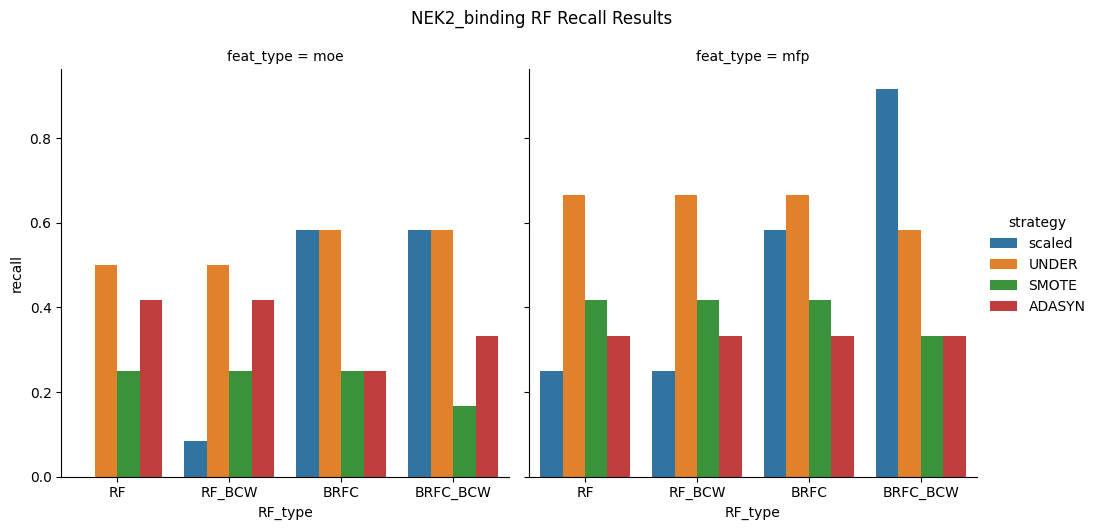

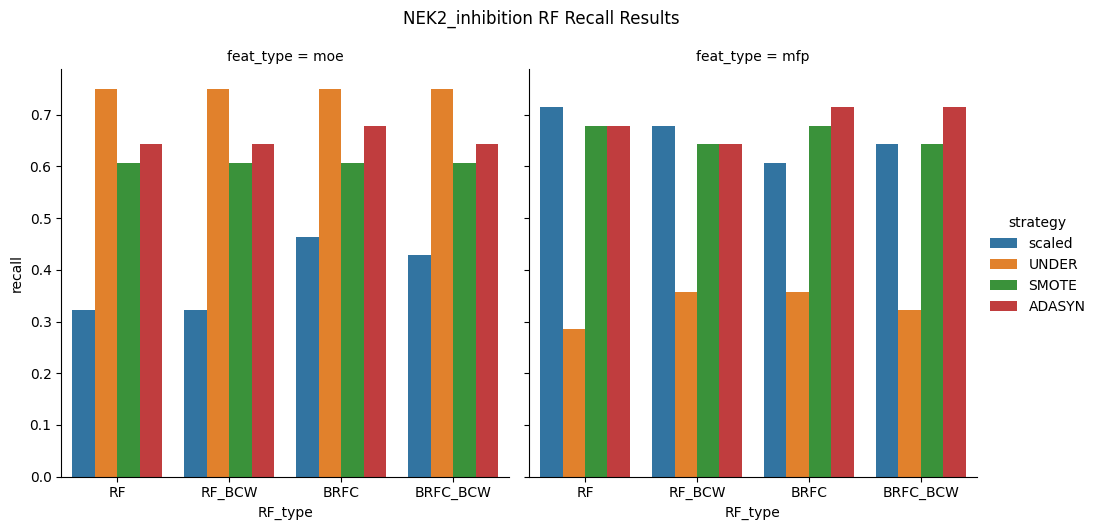

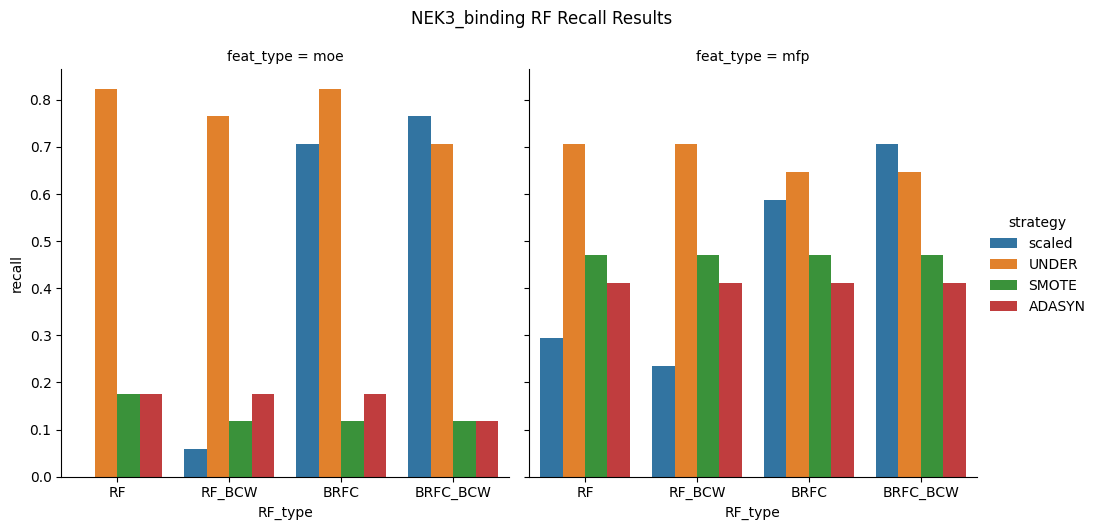

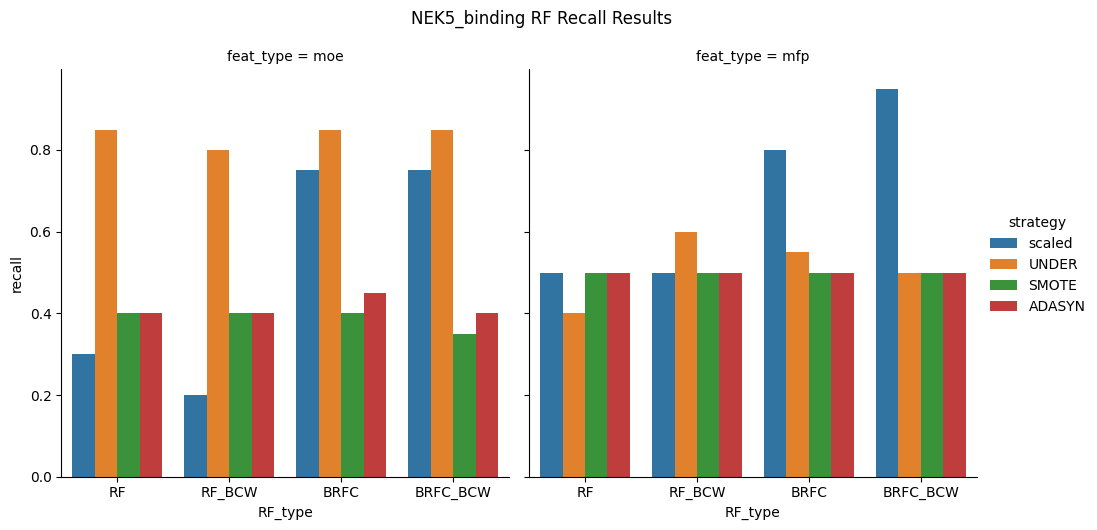

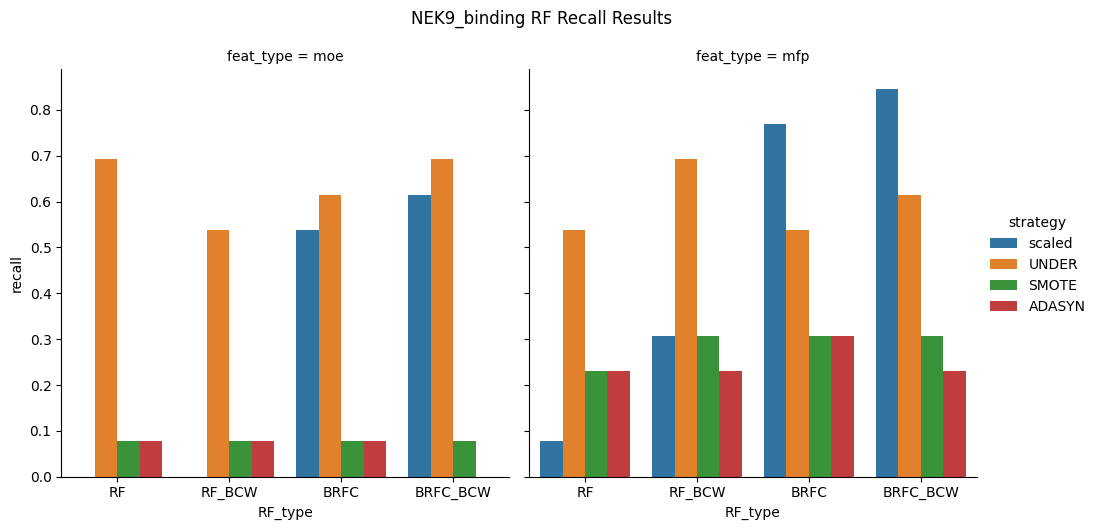

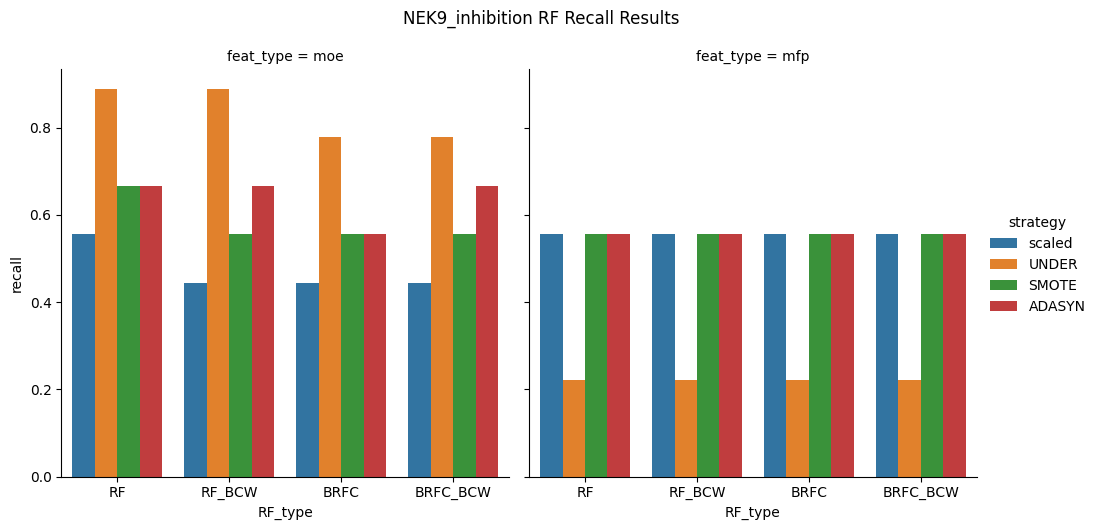

In [73]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']

for nek in neks: 
    nek_df = df_all[df_all['NEK']==nek]
    nek_df.sort_values('strategy')
    p1_individ = sns.catplot(data=nek_df, x='RF_type', y='recall', hue='strategy',col='feat_type', kind='bar')
    # p1_individ = sns.catplot(data=nek_df, x='RF_type', y='recall', hue='dataset_category', kind='bar')
    # plt.suptitle(f'{nek} RF Recall Results')
    plt.ylabel('Recall Score')
    p1_individ .fig.suptitle(f'{nek} RF Recall Results', y=1.05) 
    plt.savefig(f'figures/RF_plots/{nek}_4rftype_4colorsamp_2feat.png', bbox_inches='tight')

    plt.show()
    
    print()

# same, but don't separate moe and mfp on diff plots, just use dataset_category 

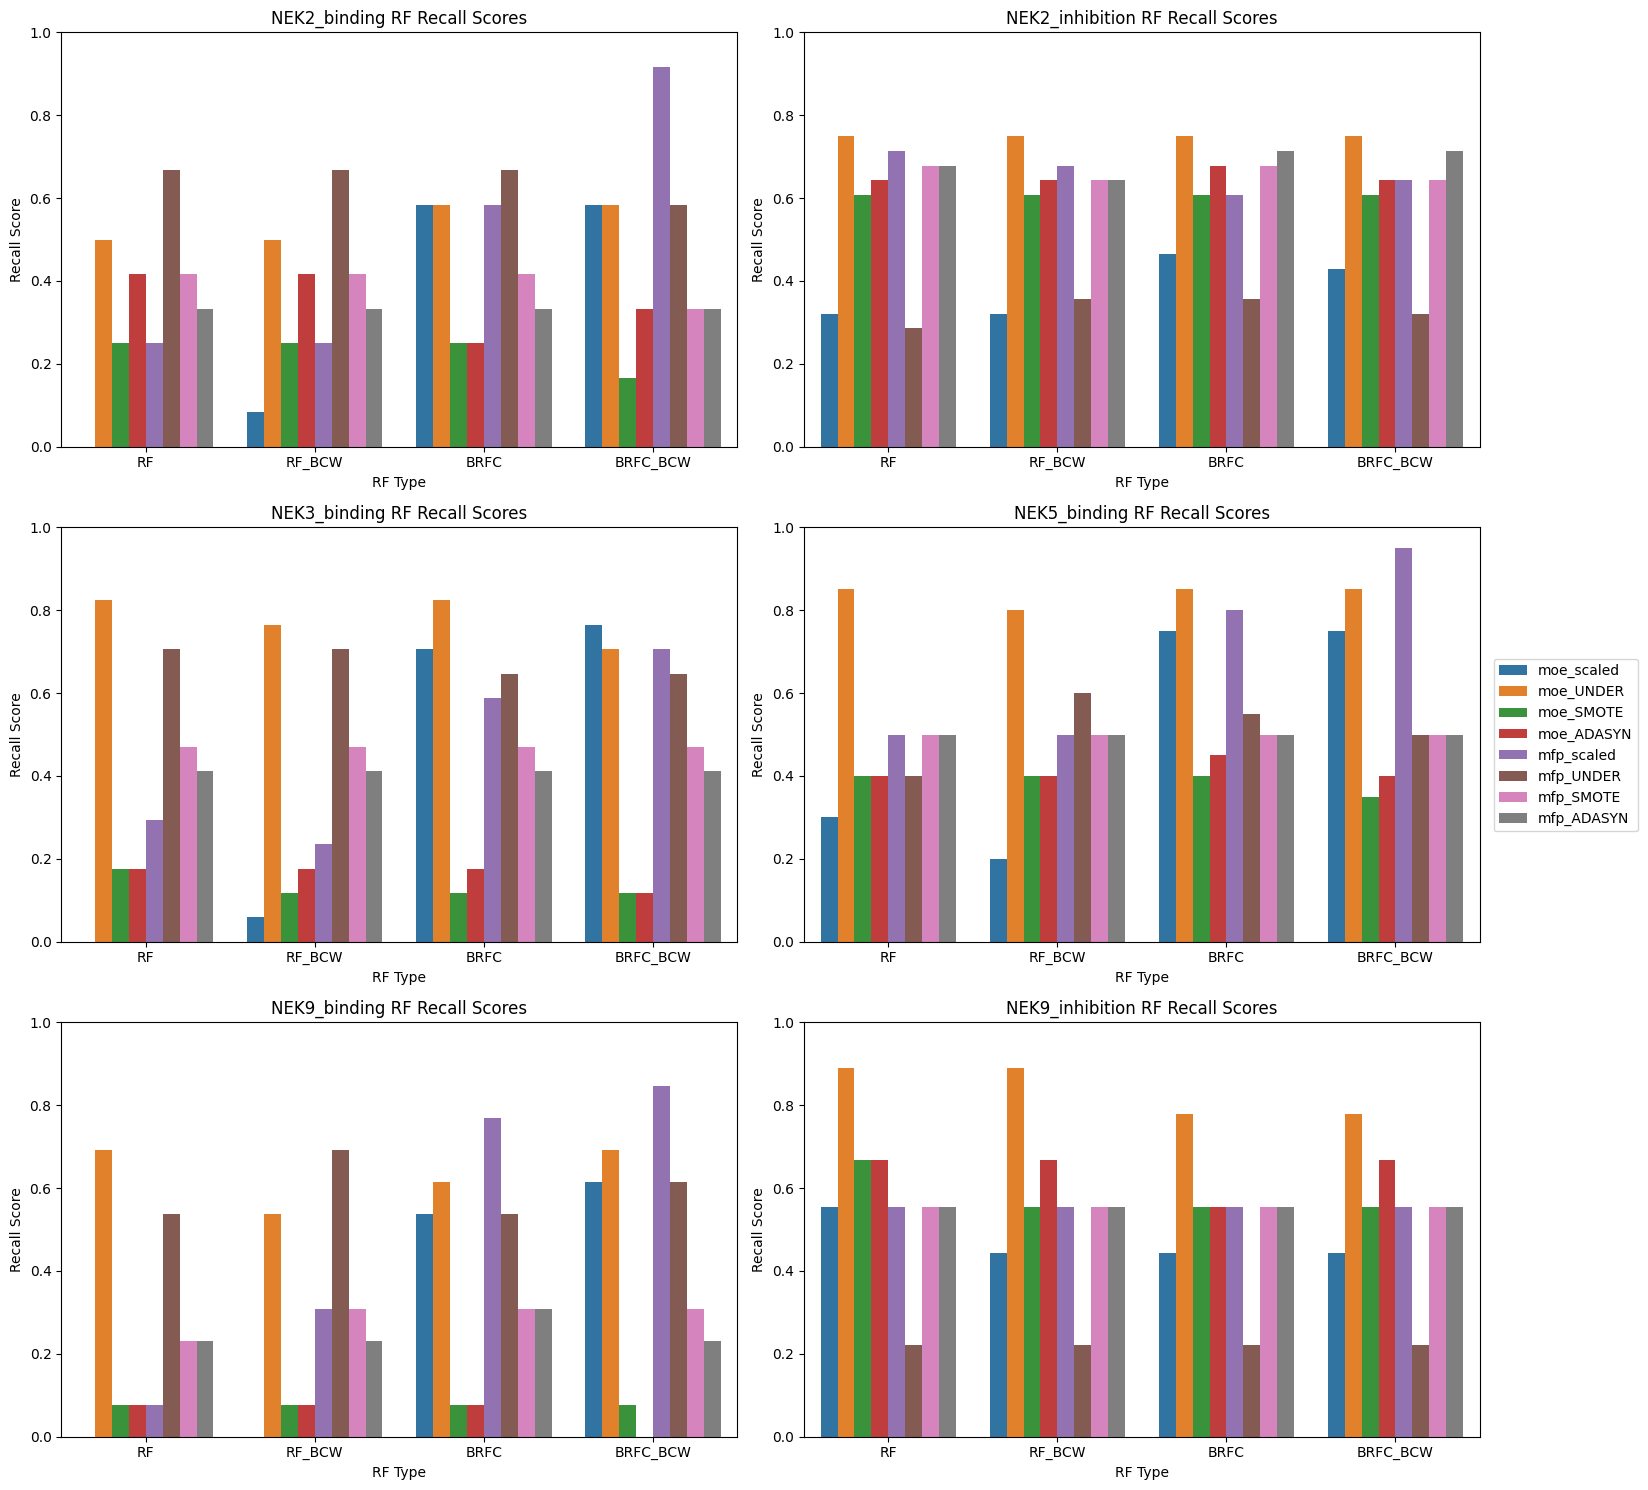

In [109]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, nek in enumerate(neks):
    nek_df = df_all[df_all['NEK'] == nek]
    # nek_df = nek_df.sort_values('RF_type')
    g = sns.barplot(data=nek_df, x='RF_type', y='recall', hue='dataset_category', ax=axes[i])
    axes[i].set_title(f'{nek} RF Recall Scores')
    axes[i].set_ylabel('Recall Score')
    axes[i].set_xlabel('RF Type')
    axes[i].set_ylim(0, 1)
    axes[i].get_legend().remove()

# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',bbox_to_anchor=(1.1,0.5))
plt.savefig(f'figures/RF_plots/NEK_RF_recall_byRF_type.png', bbox_inches='tight')
plt.tight_layout()
plt.show();

# Blue and gold feat type and sampling strategy on x, plot for each RF model type

['RF' 'RF_BCW' 'BRFC' 'BRFC_BCW']


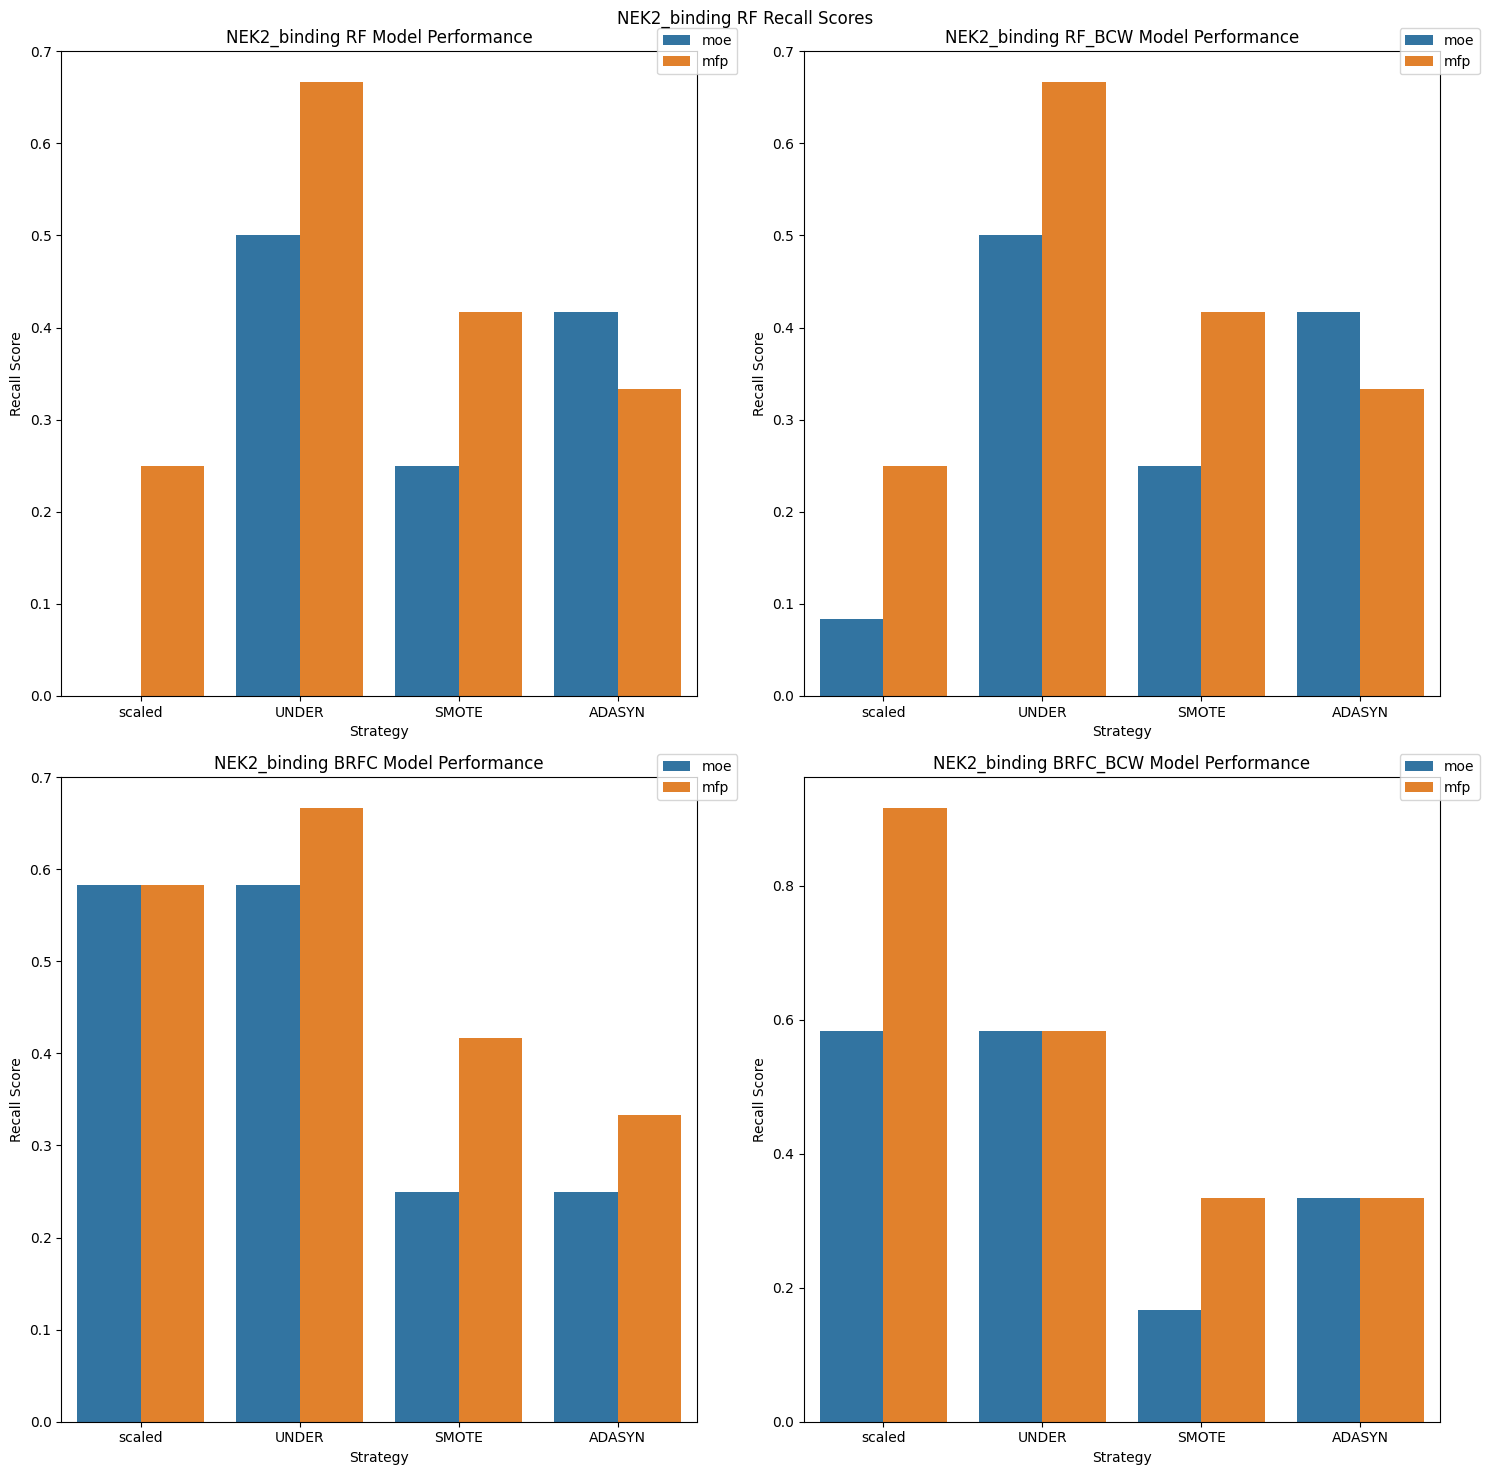

['RF' 'RF_BCW' 'BRFC' 'BRFC_BCW']


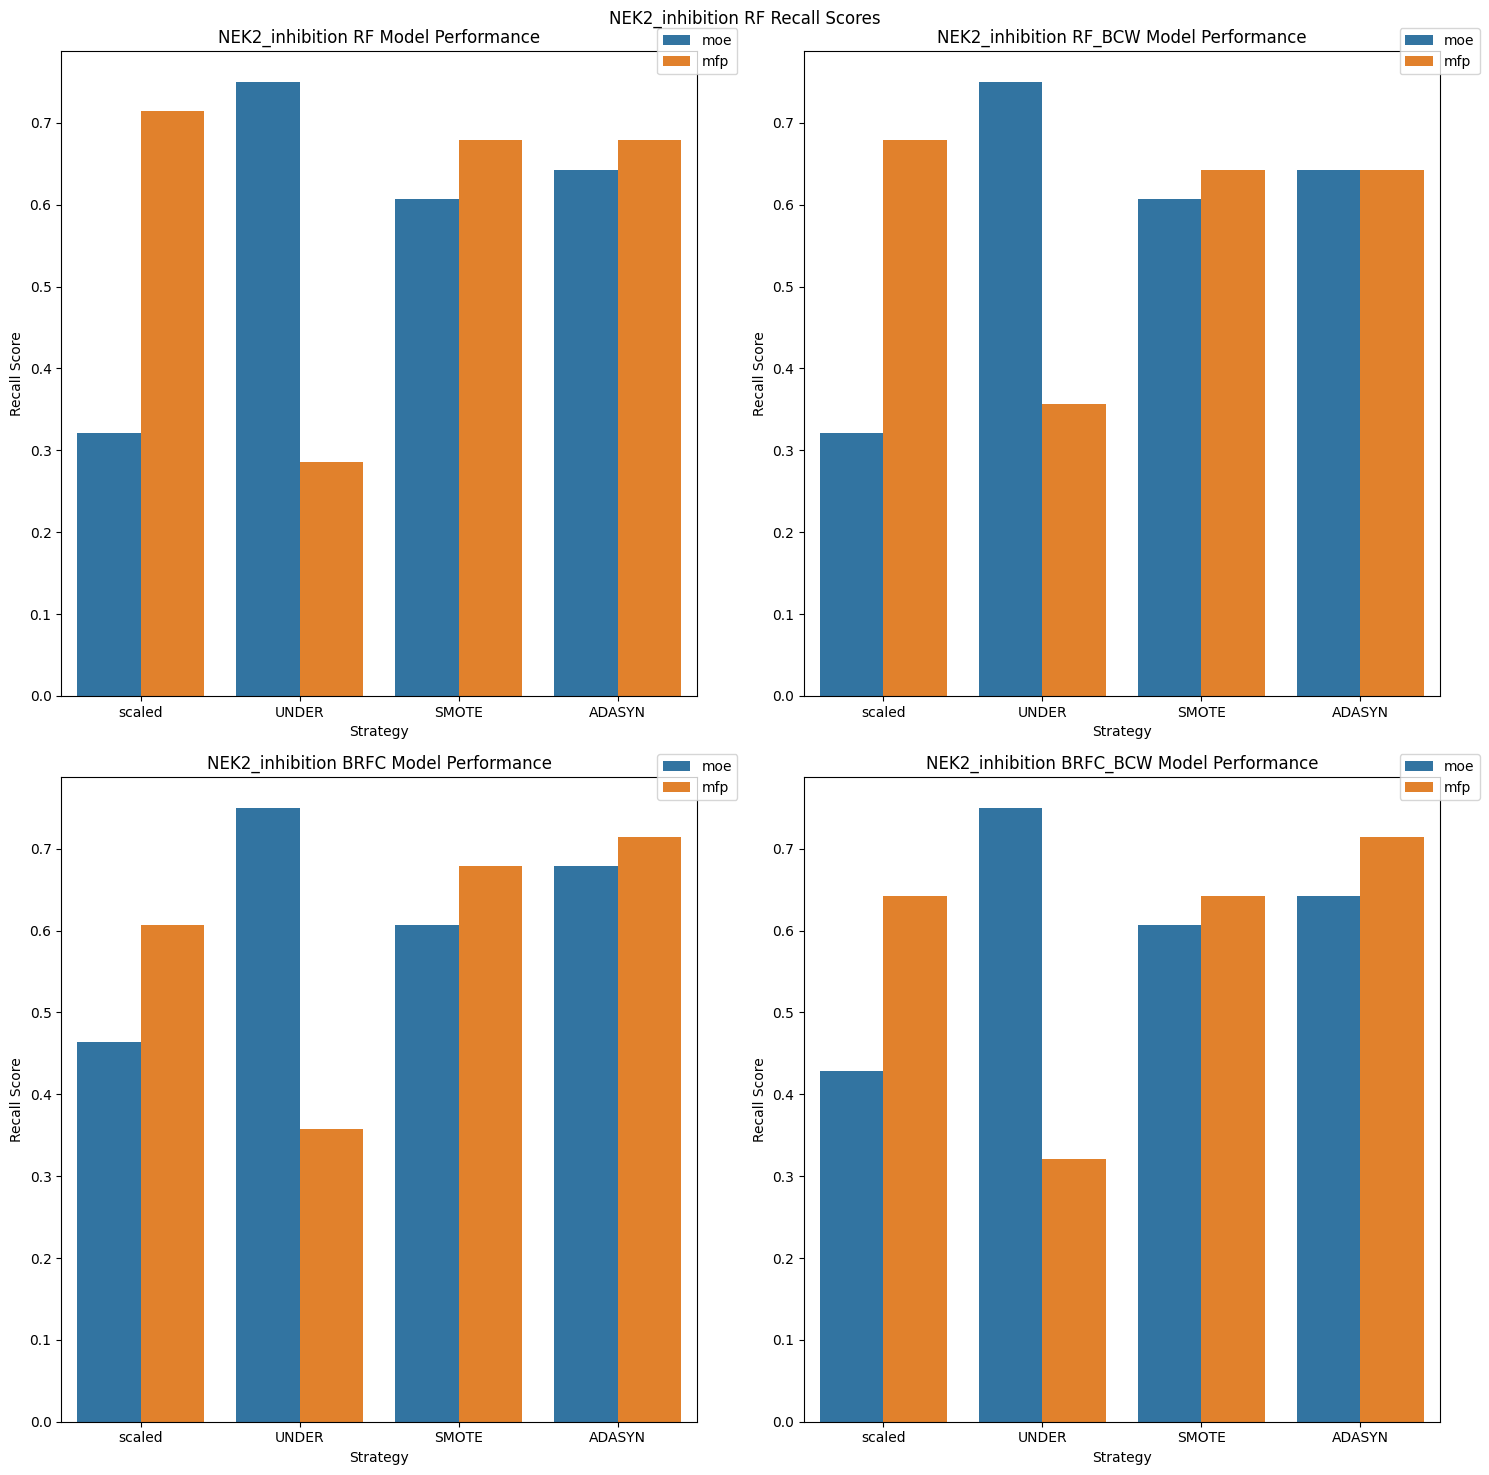

['RF' 'RF_BCW' 'BRFC' 'BRFC_BCW']


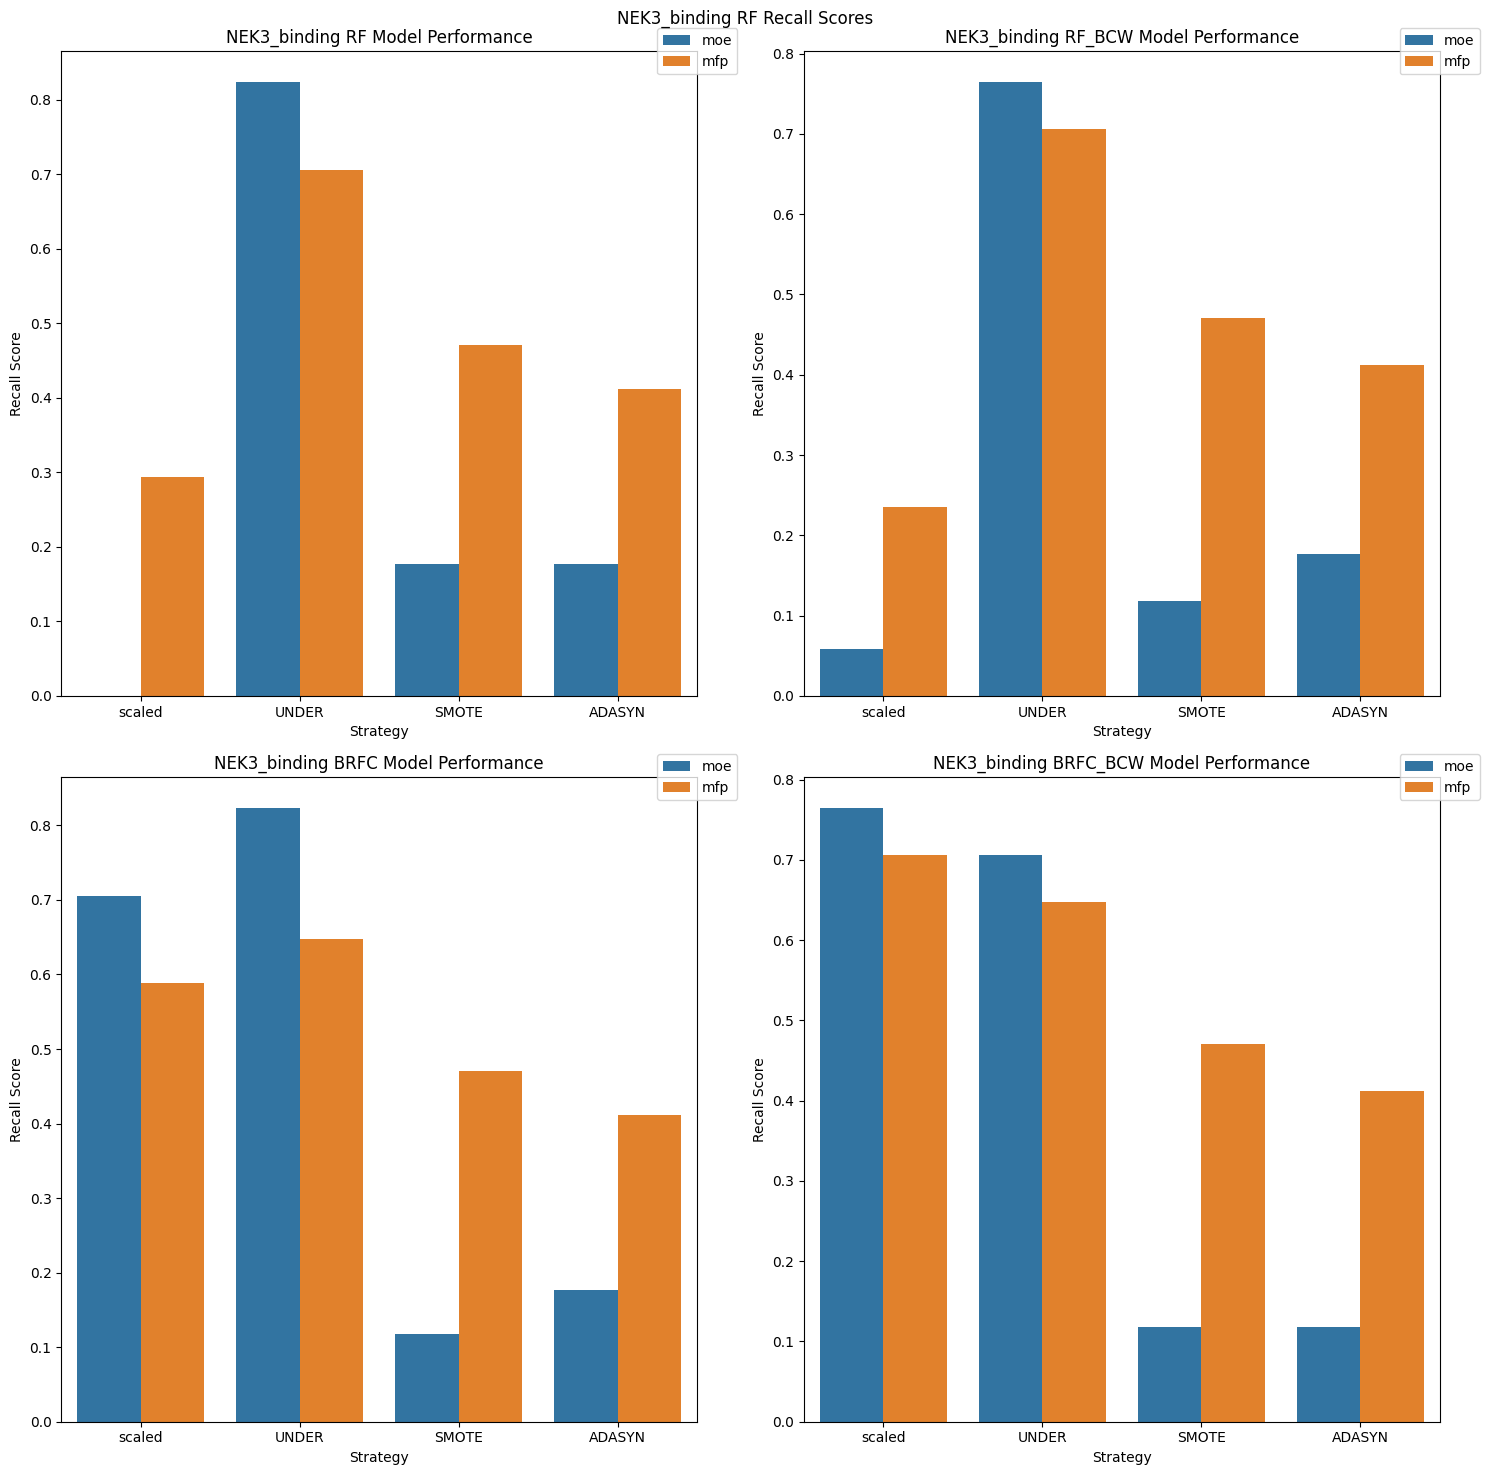

['RF' 'RF_BCW' 'BRFC' 'BRFC_BCW']


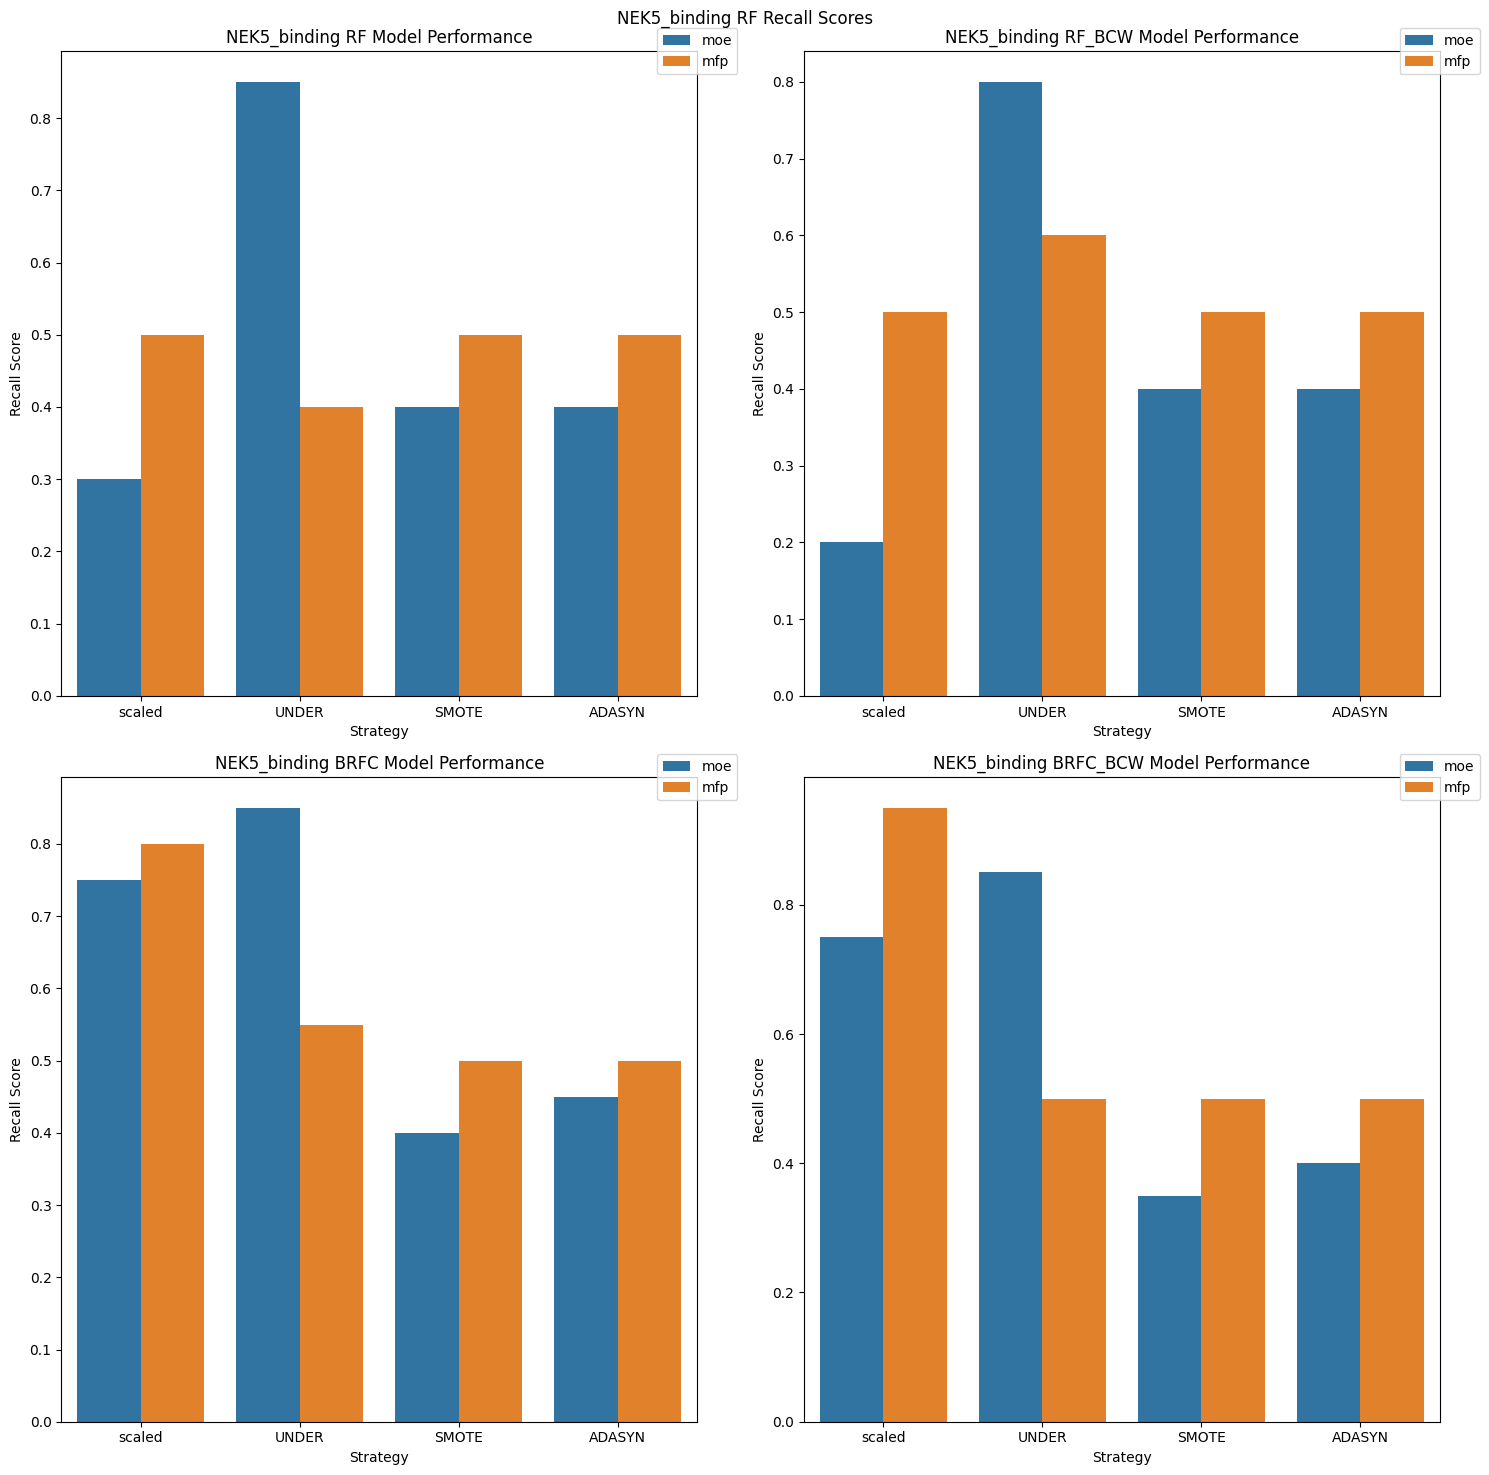

['RF' 'RF_BCW' 'BRFC' 'BRFC_BCW']


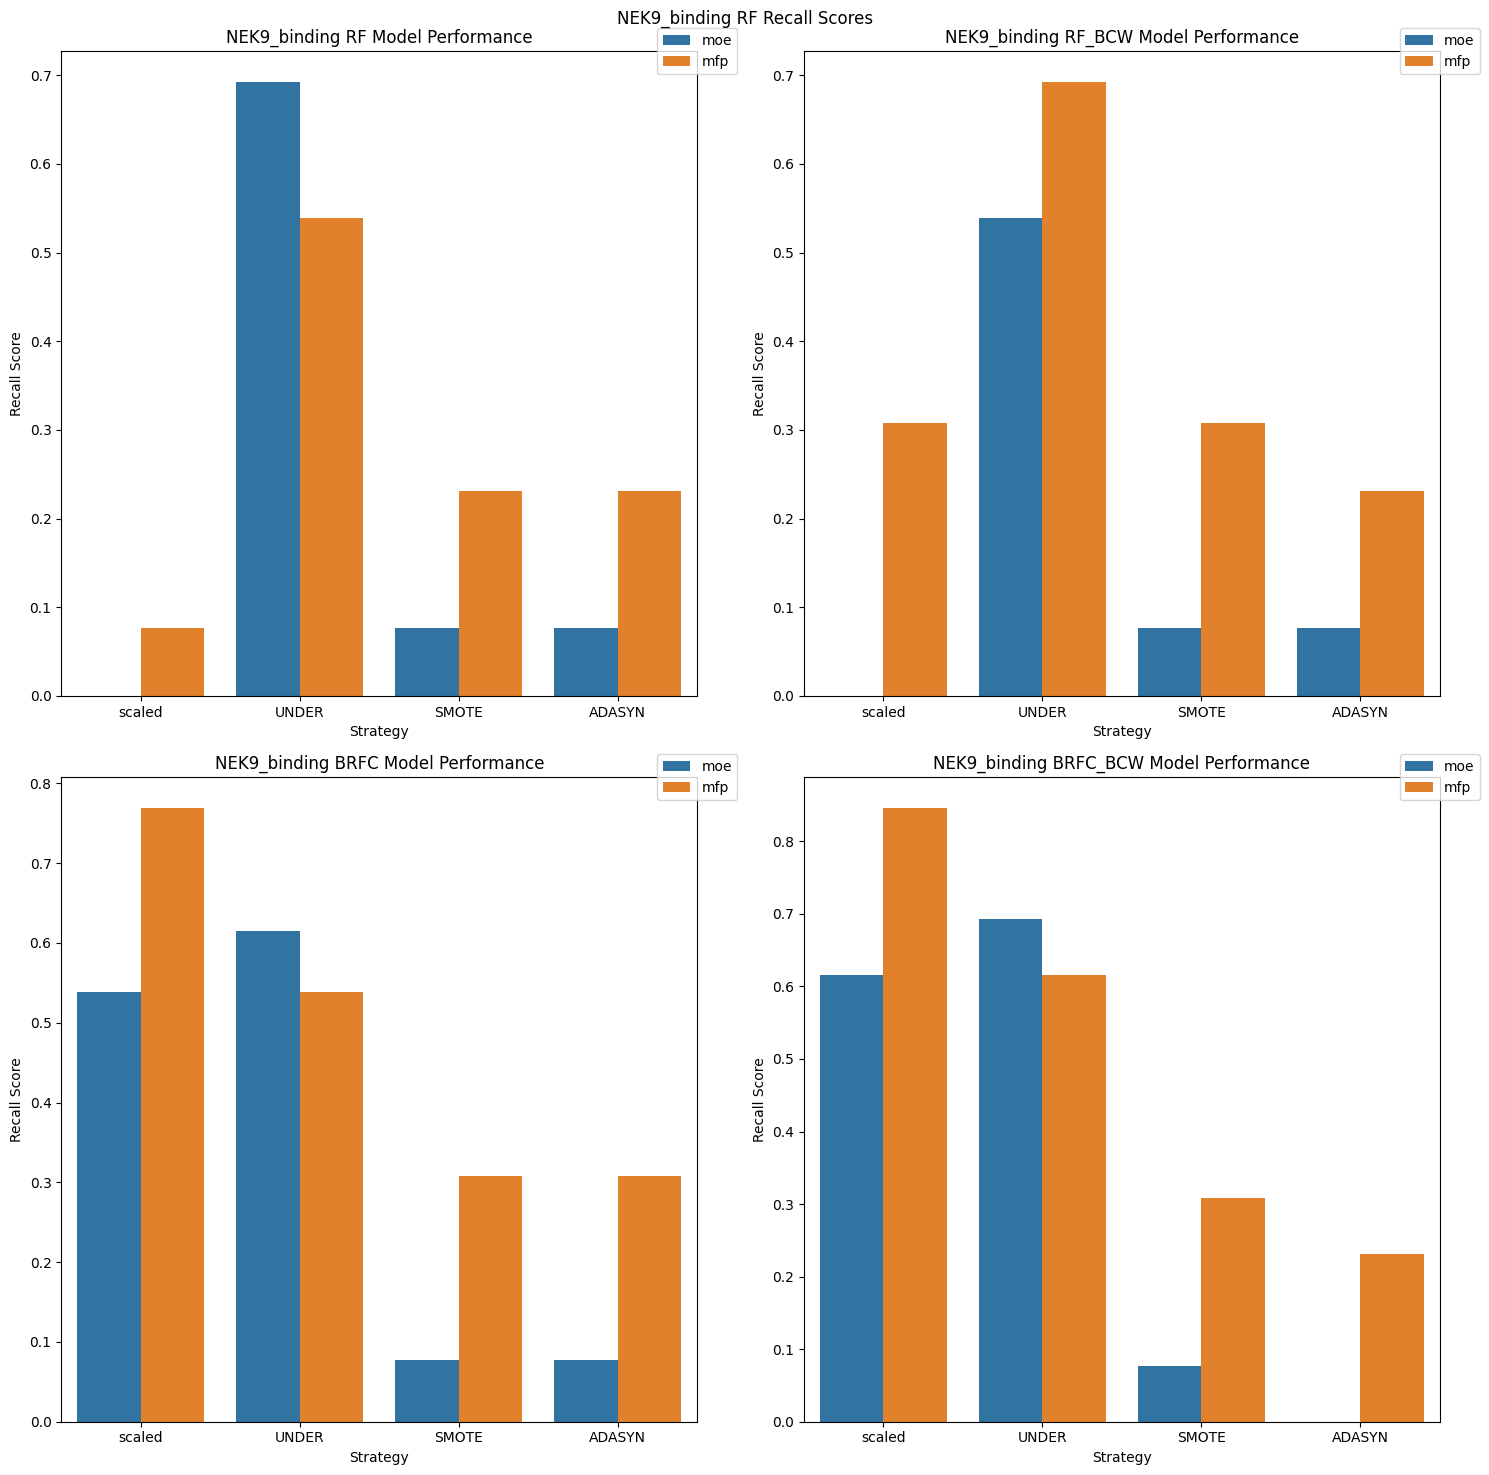

['RF' 'RF_BCW' 'BRFC' 'BRFC_BCW']


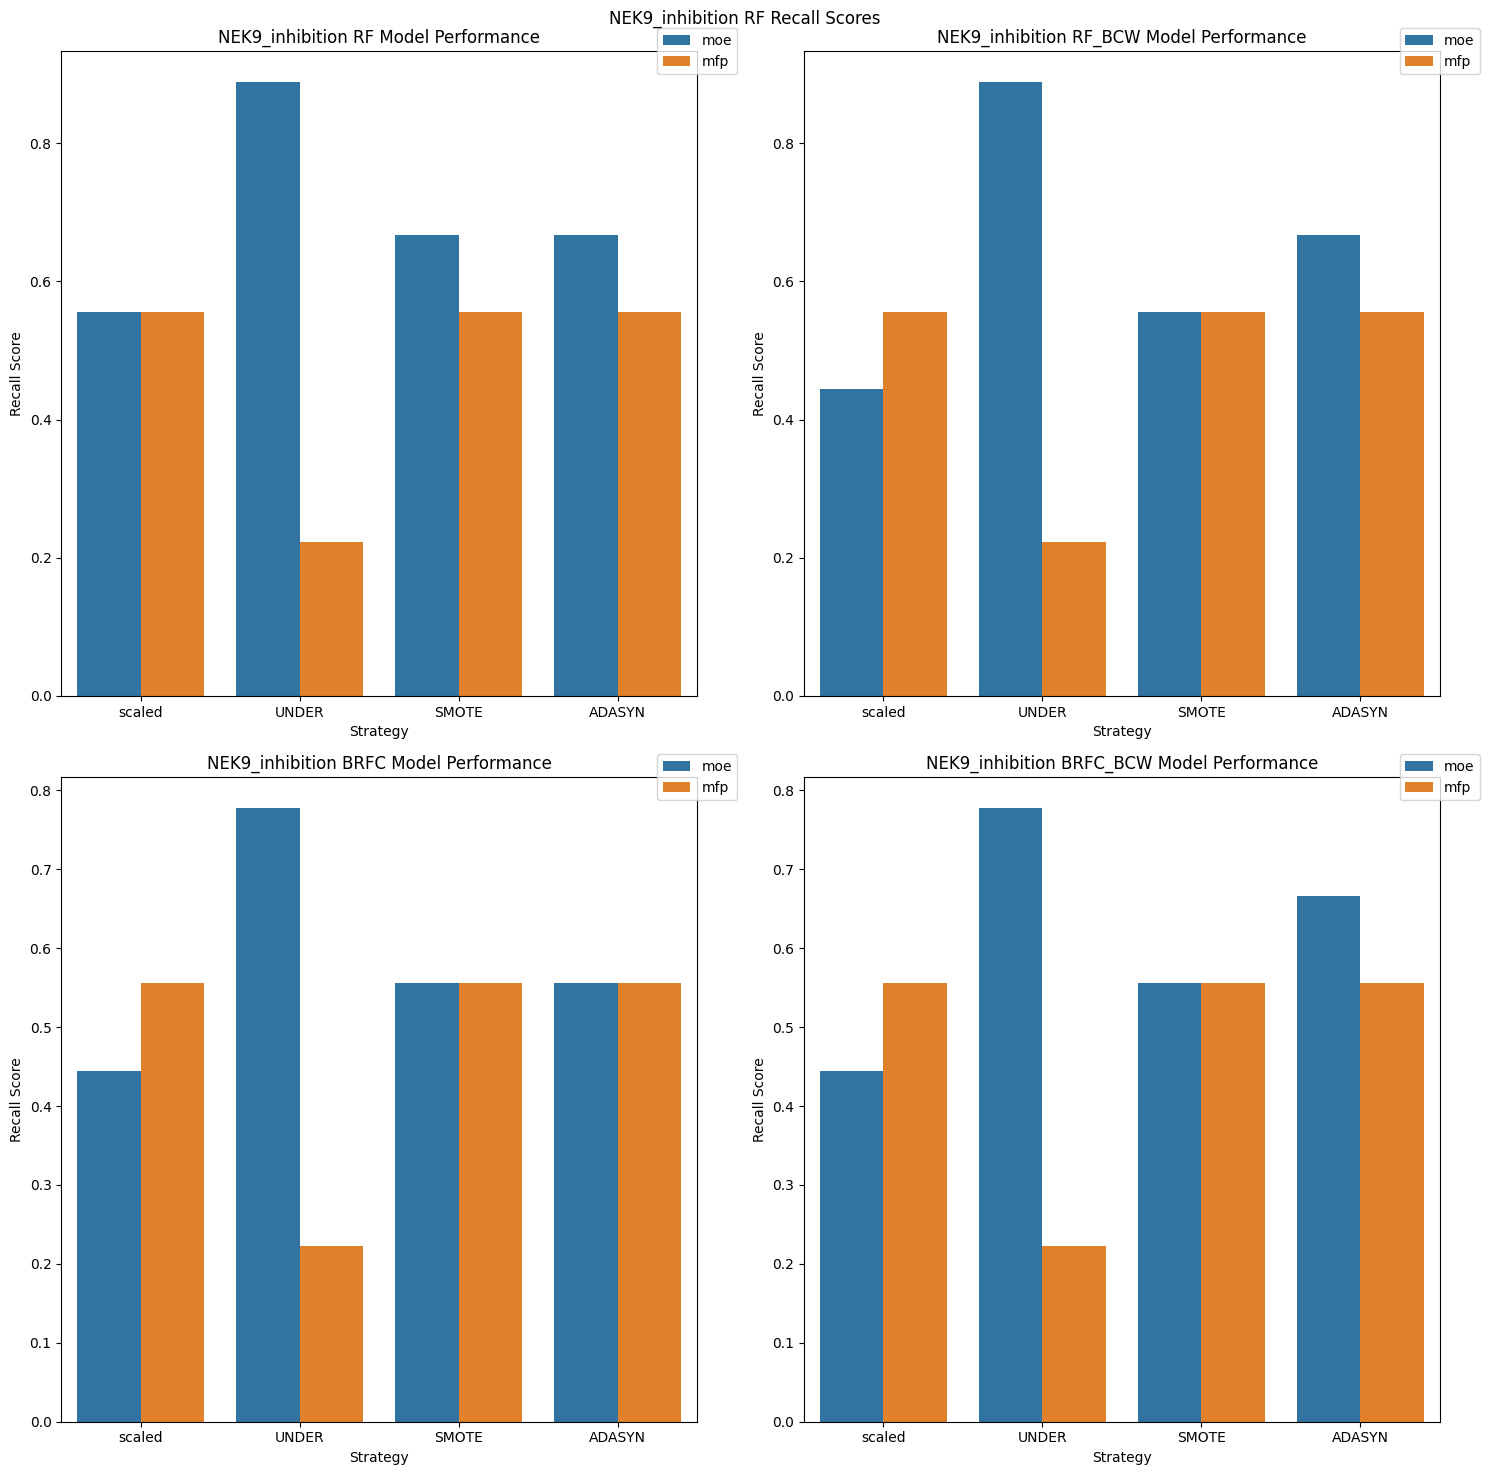

In [63]:
tptnfpfn = ['TN', 'TP', 'FP', 'FN']
for nek in neks: 
    df = df_all[df_all['NEK'] == nek]
    df = df.drop(columns = tptnfpfn)
    # ax = df.plot(x='dataset_category',kind='bar', figsize=(10,10))
    # p_all_metrics = sns.catplot(data=df, x='RF_type', y='recall', hue='strategy',col='feat_type', kind='bar')
    # for rf in df['RF_type'].unique(): 
    rf_types = df['RF_type'].unique()
    nrows = (len(rf_types)+2-1)//2
    fig, axes = plt.subplots(nrows, ncols=2, figsize=(15, 15))
    axes = axes.flatten()
    for ax, rf in zip(axes, rf_types):
        rf_df = df[df['RF_type'] == rf]
        sns.barplot(data=rf_df, x='strategy', y='recall', hue='feat_type', ax=ax)
        ax.set_xlabel('Strategy')
        ax.set_ylabel('Recall Score')
        ax.set_title(f'{nek} {rf} Model Performance')
        # ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
        ax.legend(loc='center',bbox_to_anchor=(1,1))
        
        # p_all_metrics = sns.catplot(data=rf_df, x='strategy', y='recall', hue='feat_type', kind='bar')
        # plt.xlabel('Model name')
        # plt.ylabel('Metric Score')
        # plt.title(f'{nek} {rf} Model Performance')
        # plt.xticks(rotation=80)  
        # ax.legend(loc='upper left', bbox_to_anchor=(1,1))
        plt.suptitle(f'{nek} RF Recall Scores')
        plt.savefig(f'figures/RF_plots/{nek}_{rf}_recall.png',bbox_inches='tight')
        
    plt.tight_layout()
    plt.show();    

# Recall and Precision Only for each model

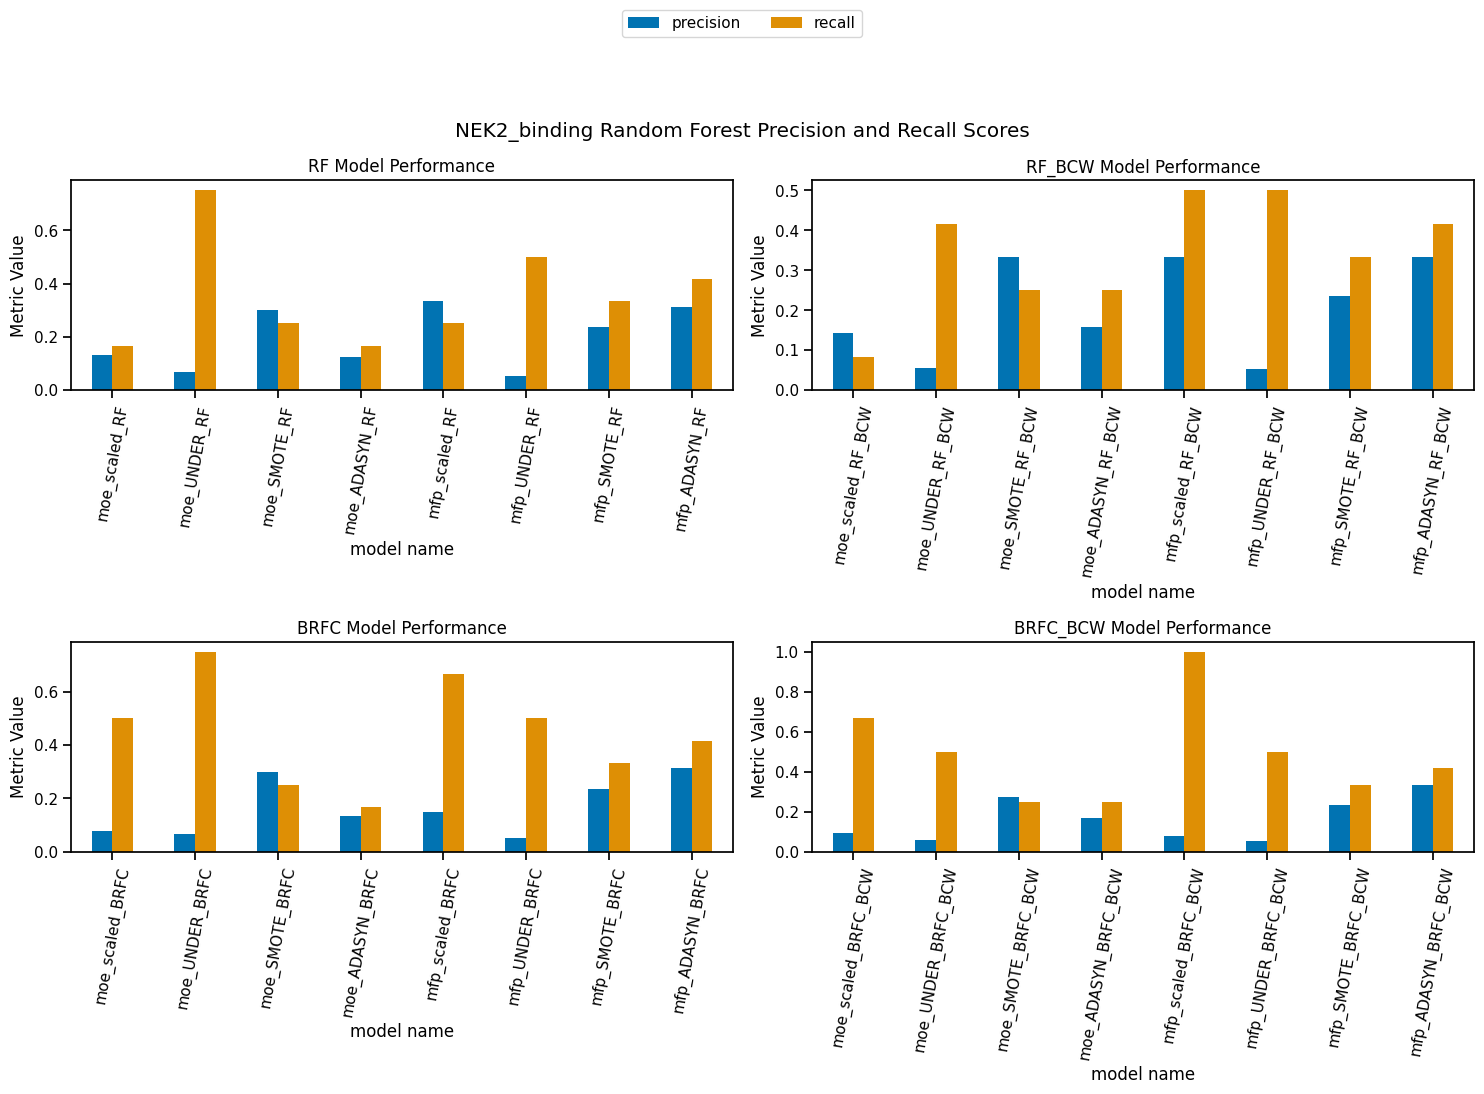

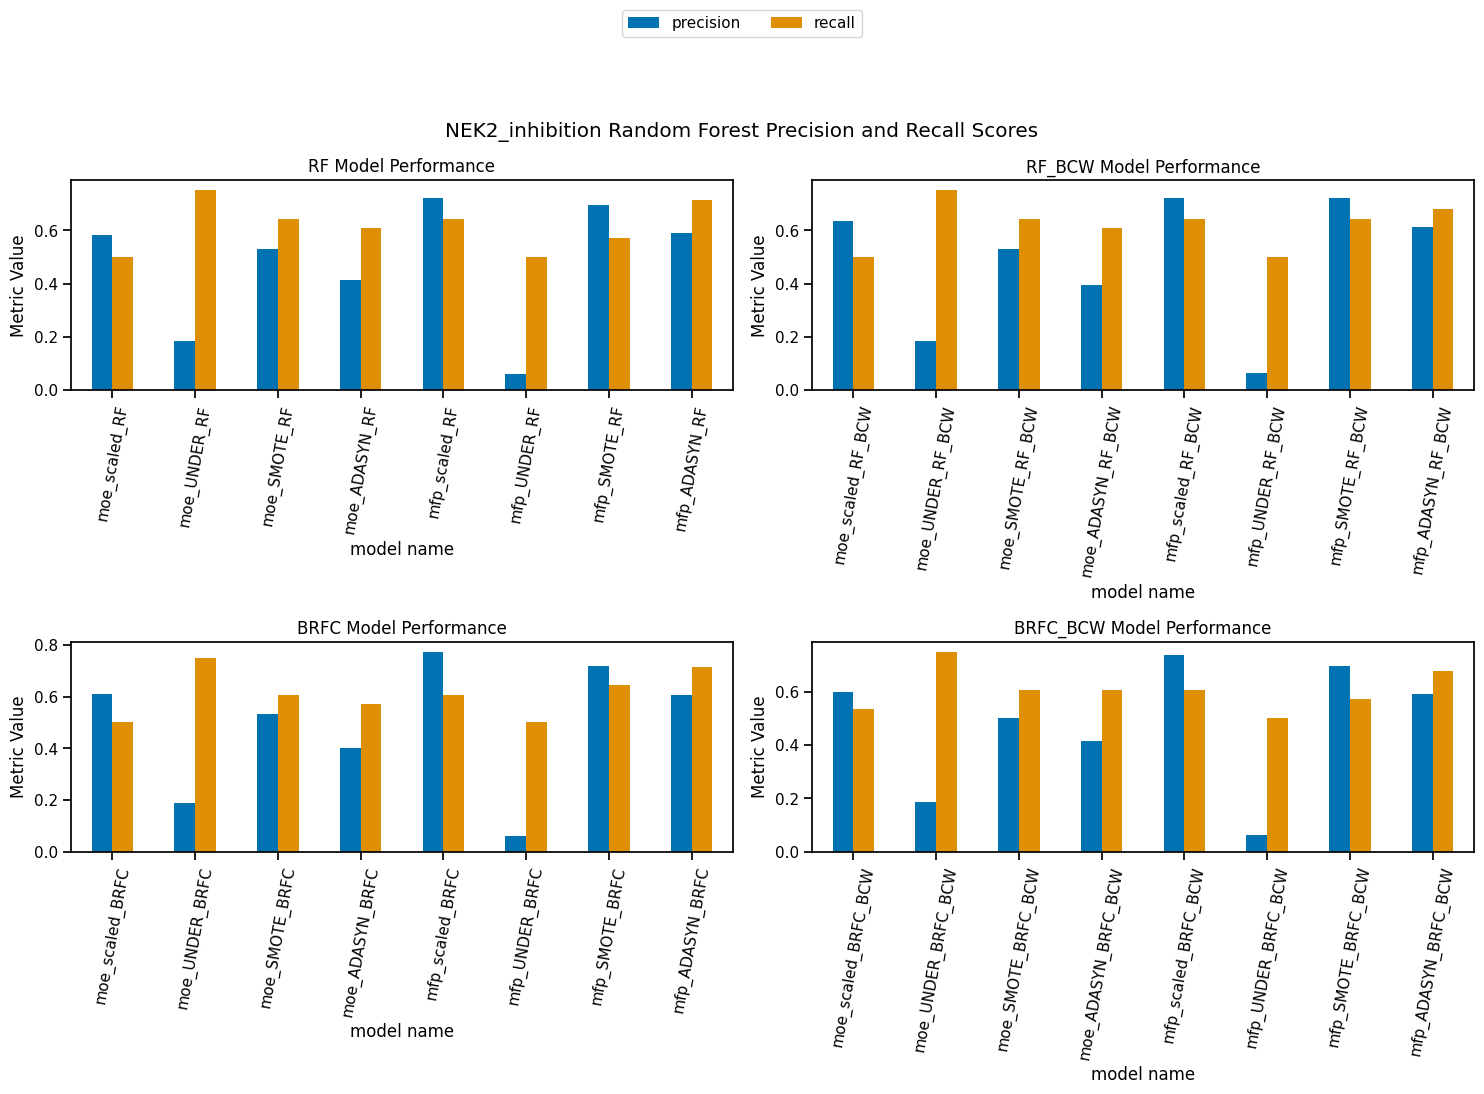

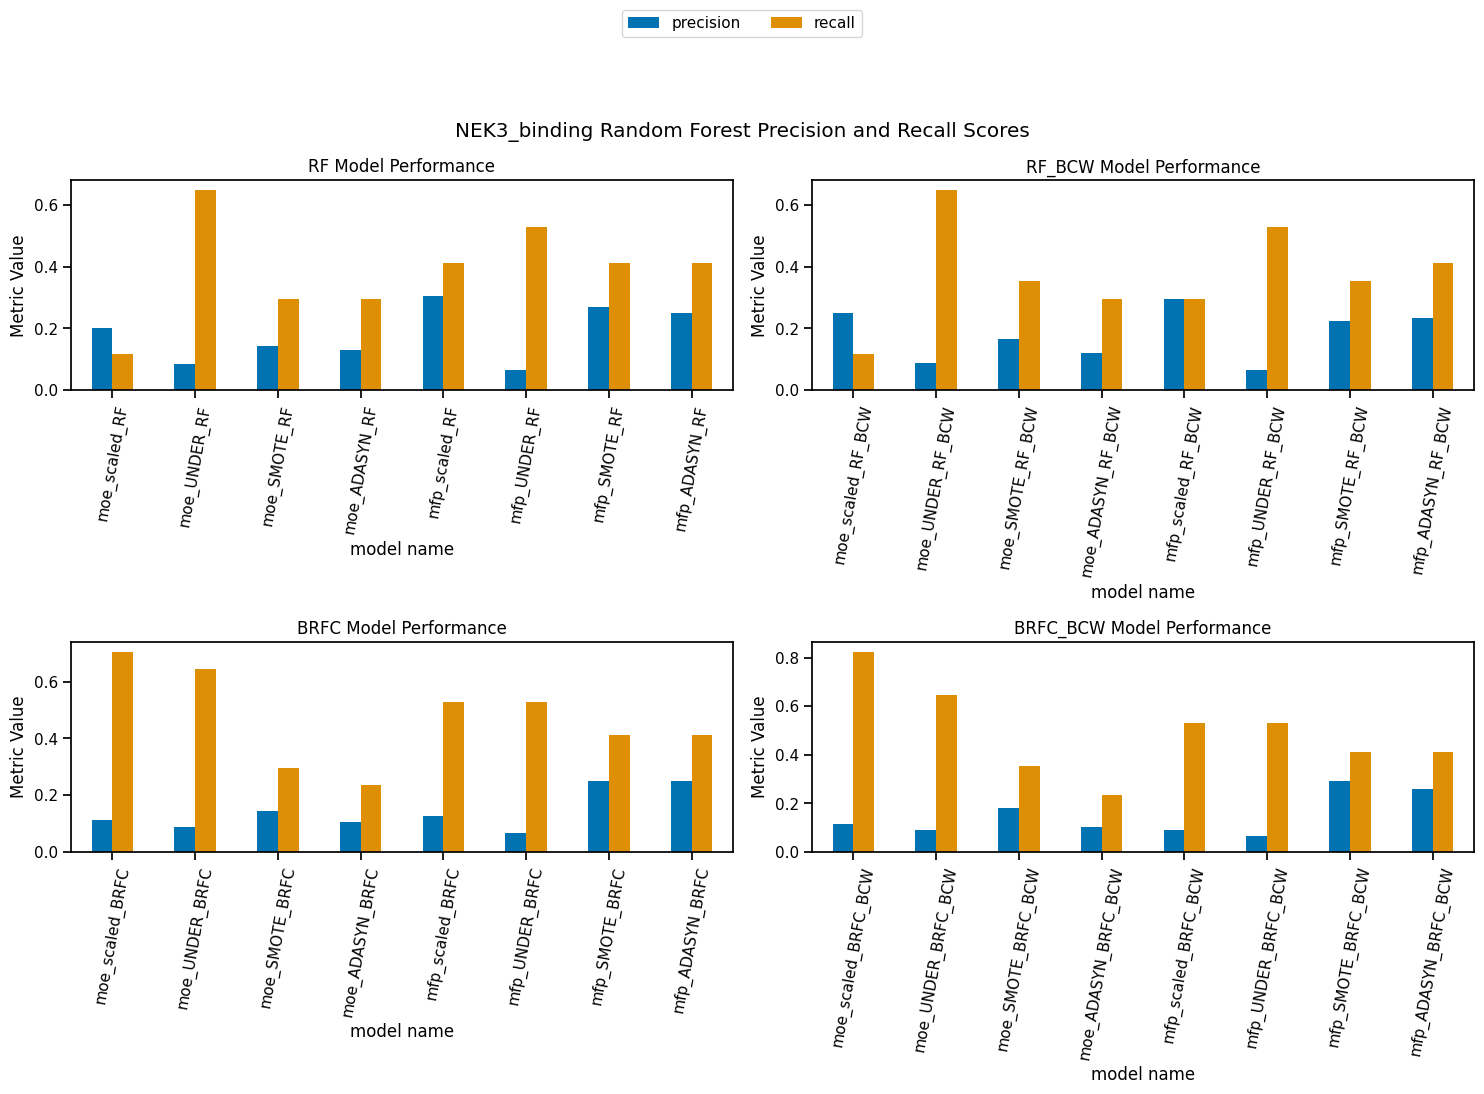

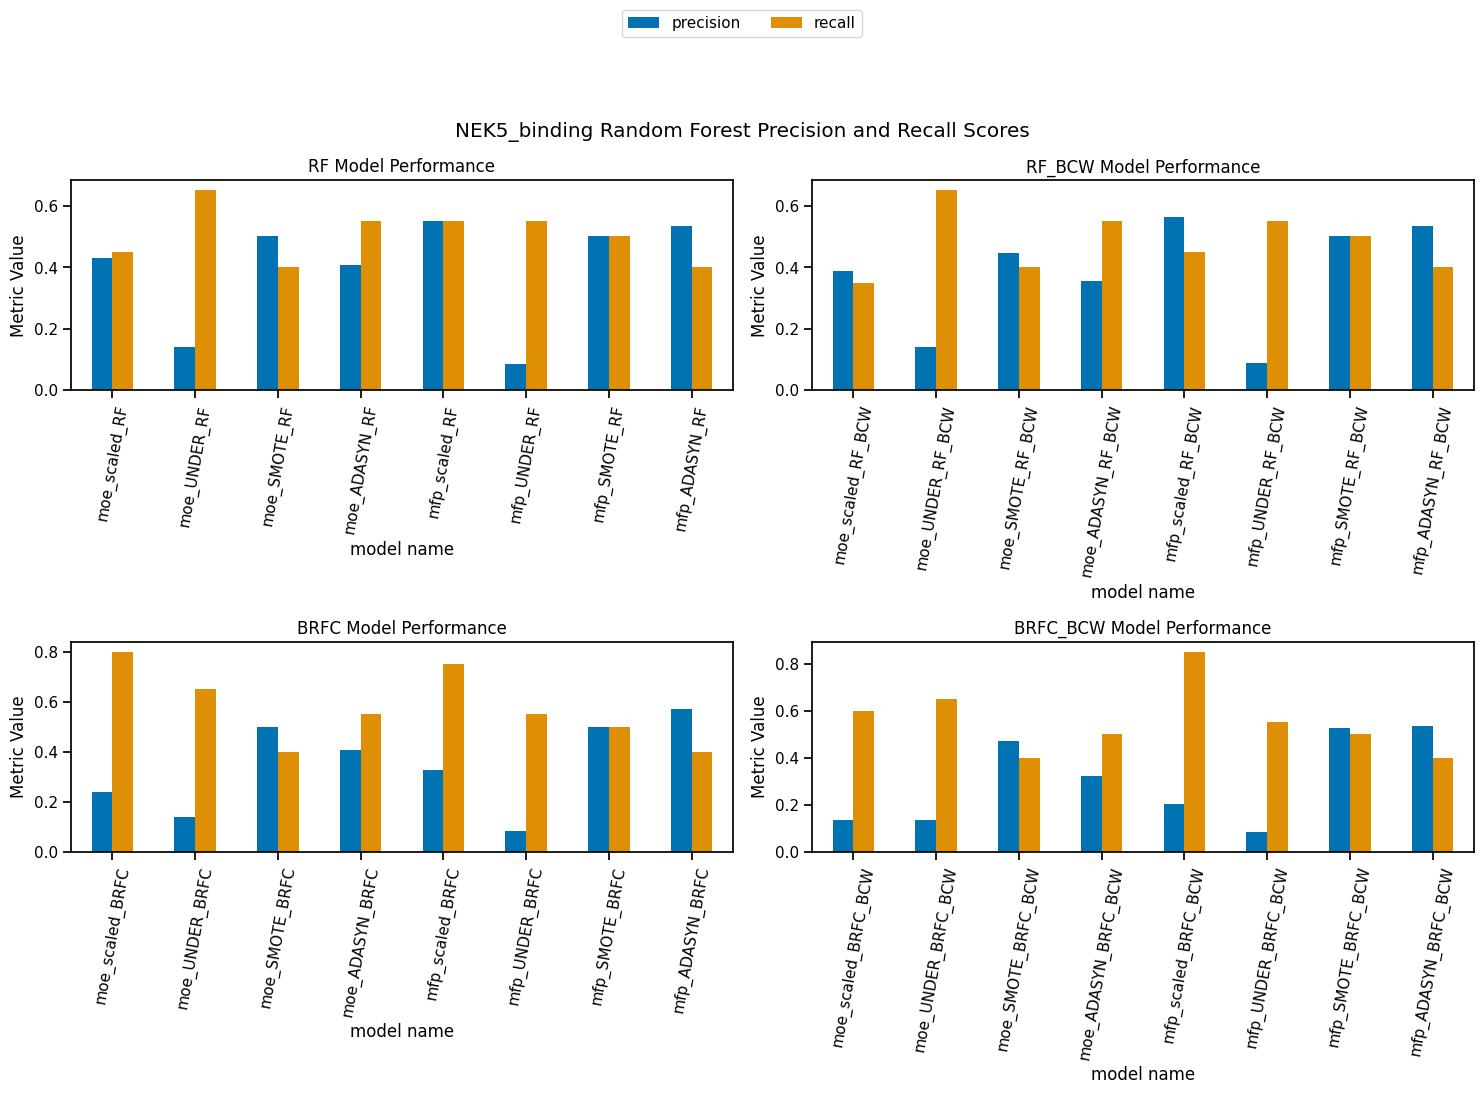

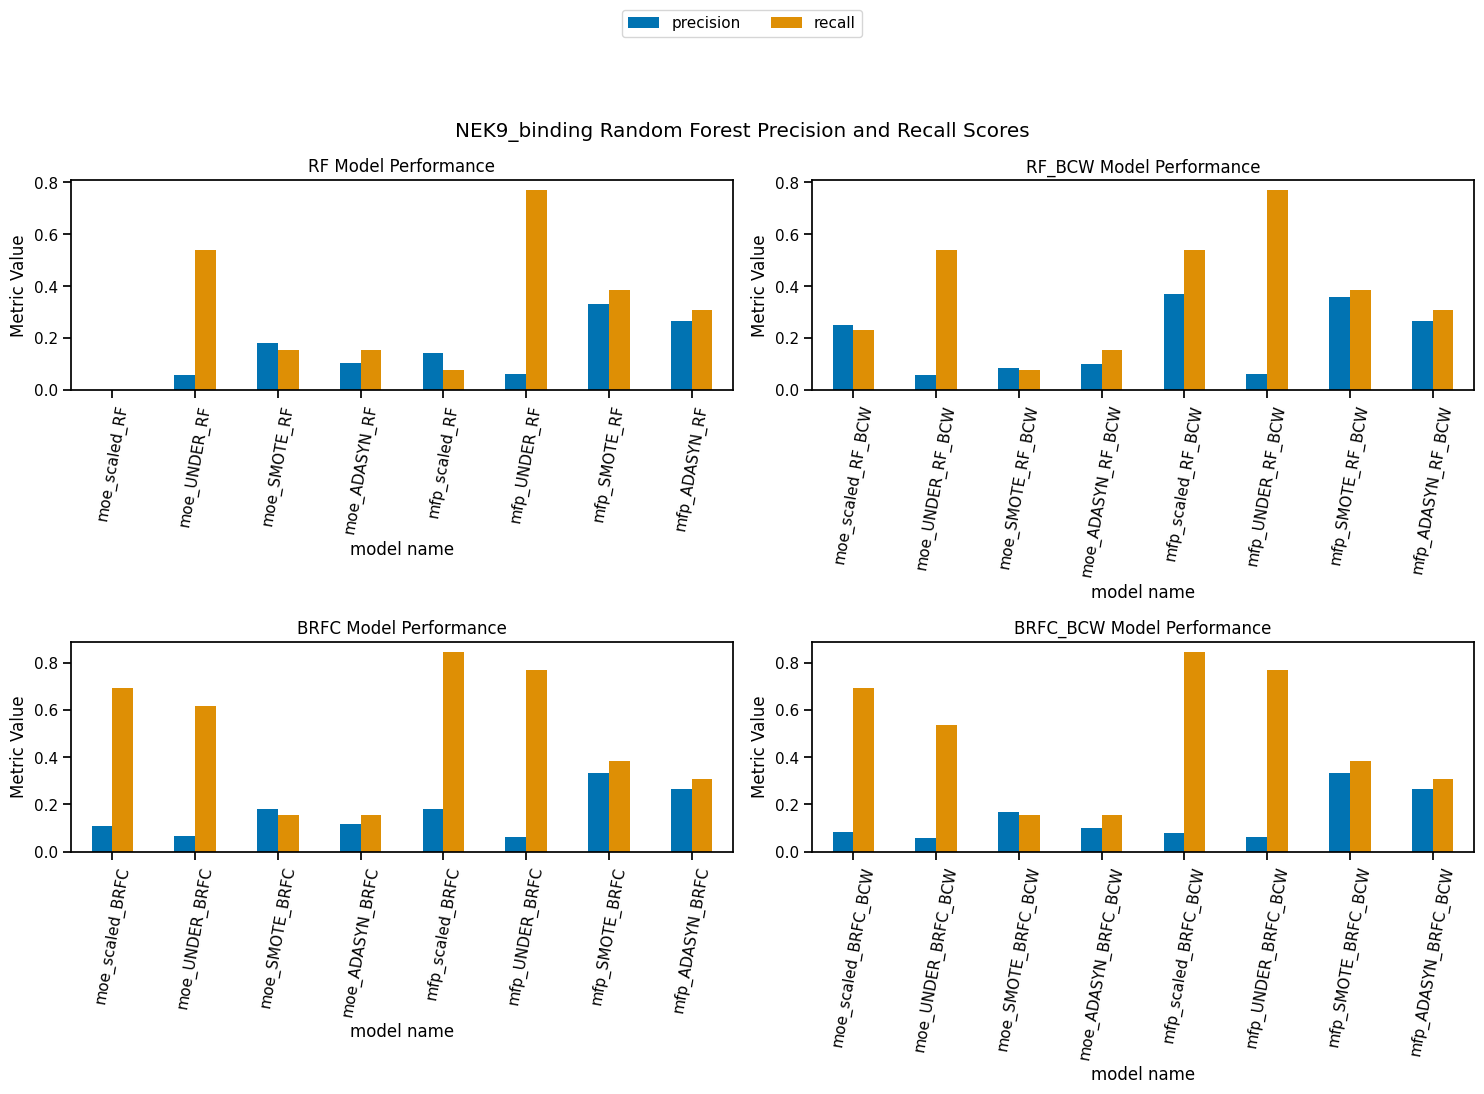

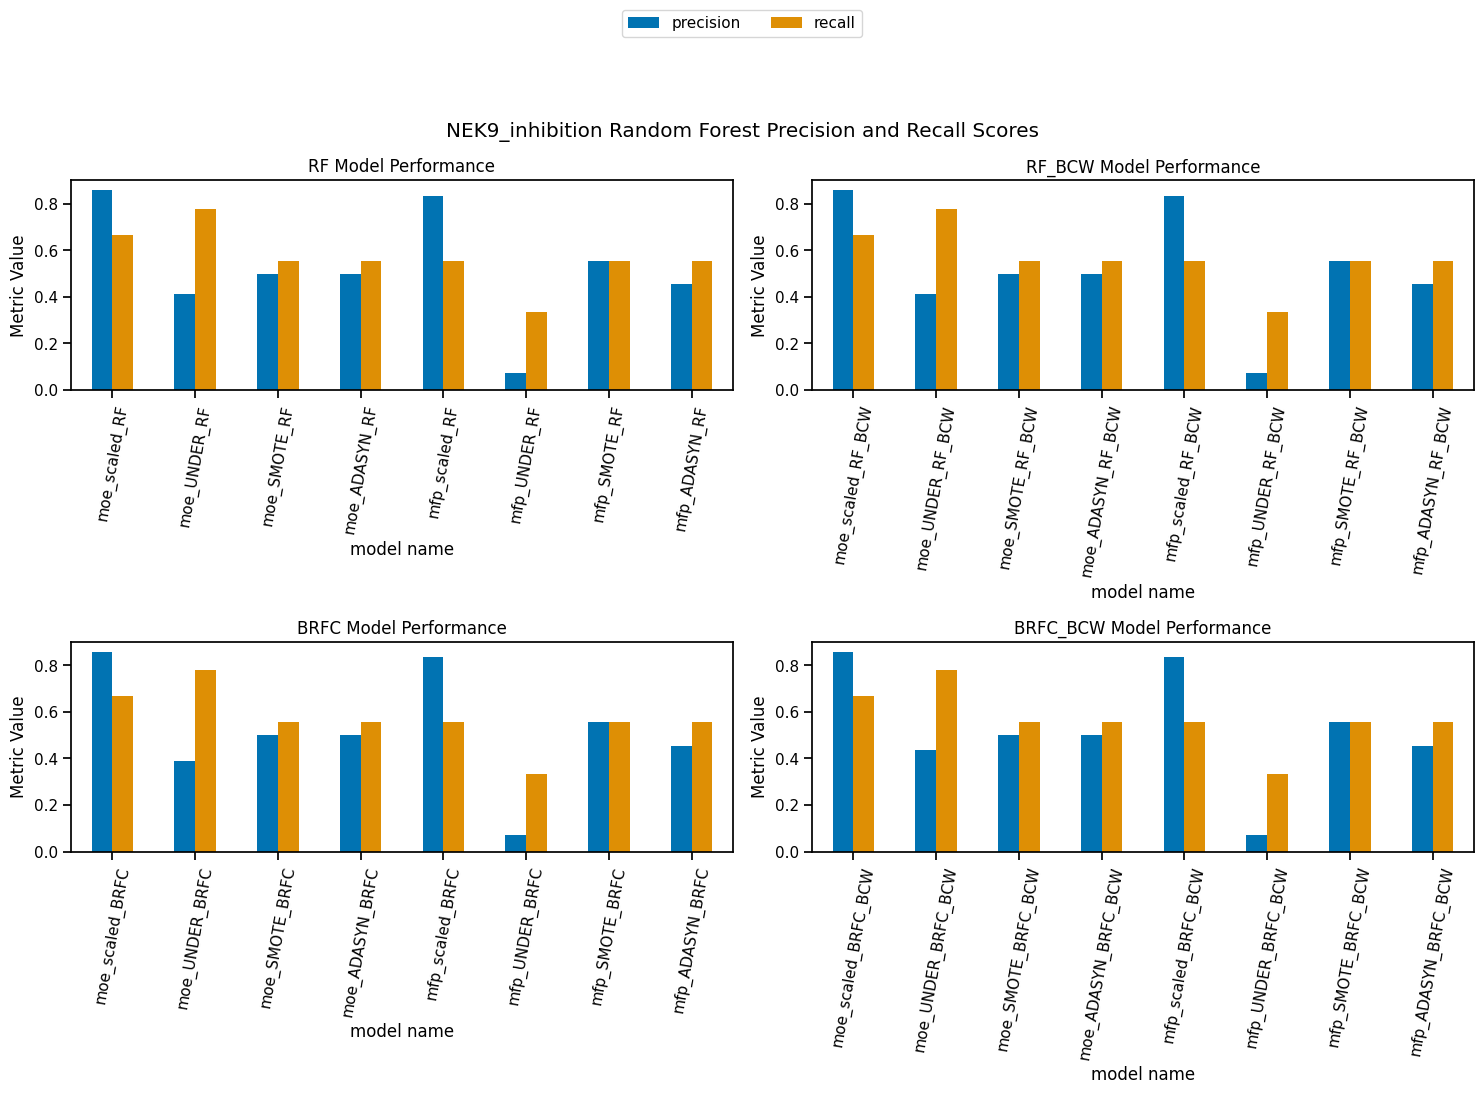

In [215]:
tptnfpfn = ['TN', 'TP', 'FP', 'FN']
for nek in neks: 
    df = df_all[df_all['NEK'] == nek]
    df = df.drop(columns = tptnfpfn)
    rf_types = df['RF_type'].unique()
    ncols = 2
    nrows = (len(rf_types)+ncols-1)//ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(15,5 * nrows))
    axes = axes.flatten()
    keep_cols = ['precision', 'recall', 'RF_type', 'model', 'NEK', 'feat_type', 'strategy', 'model name']

    for ax, rf in zip(axes, rf_types):
        rf_df = df[df['RF_type'] == rf]
        pr_df = rf_df[keep_cols]
        pr_df.plot(x='model name',kind='bar', ax=ax, legend=False)
        ax.set_ylabel('Metric Value')
        ax.set_title(f'{rf} Model Performance')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

        plt.suptitle(f'{nek} Random Forest Precision and Recall Scores')
        
    for i in range(len(rf_types), len(axes)):
        fig.delaxes(axes[i])

    handles,labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels))
    plt.tight_layout()
    plt.savefig(f'figures/RF_plots/{nek}_RF_prec_recall.png', bbox_inches='tight')
    plt.show();    

# Same as above, but all metrics 

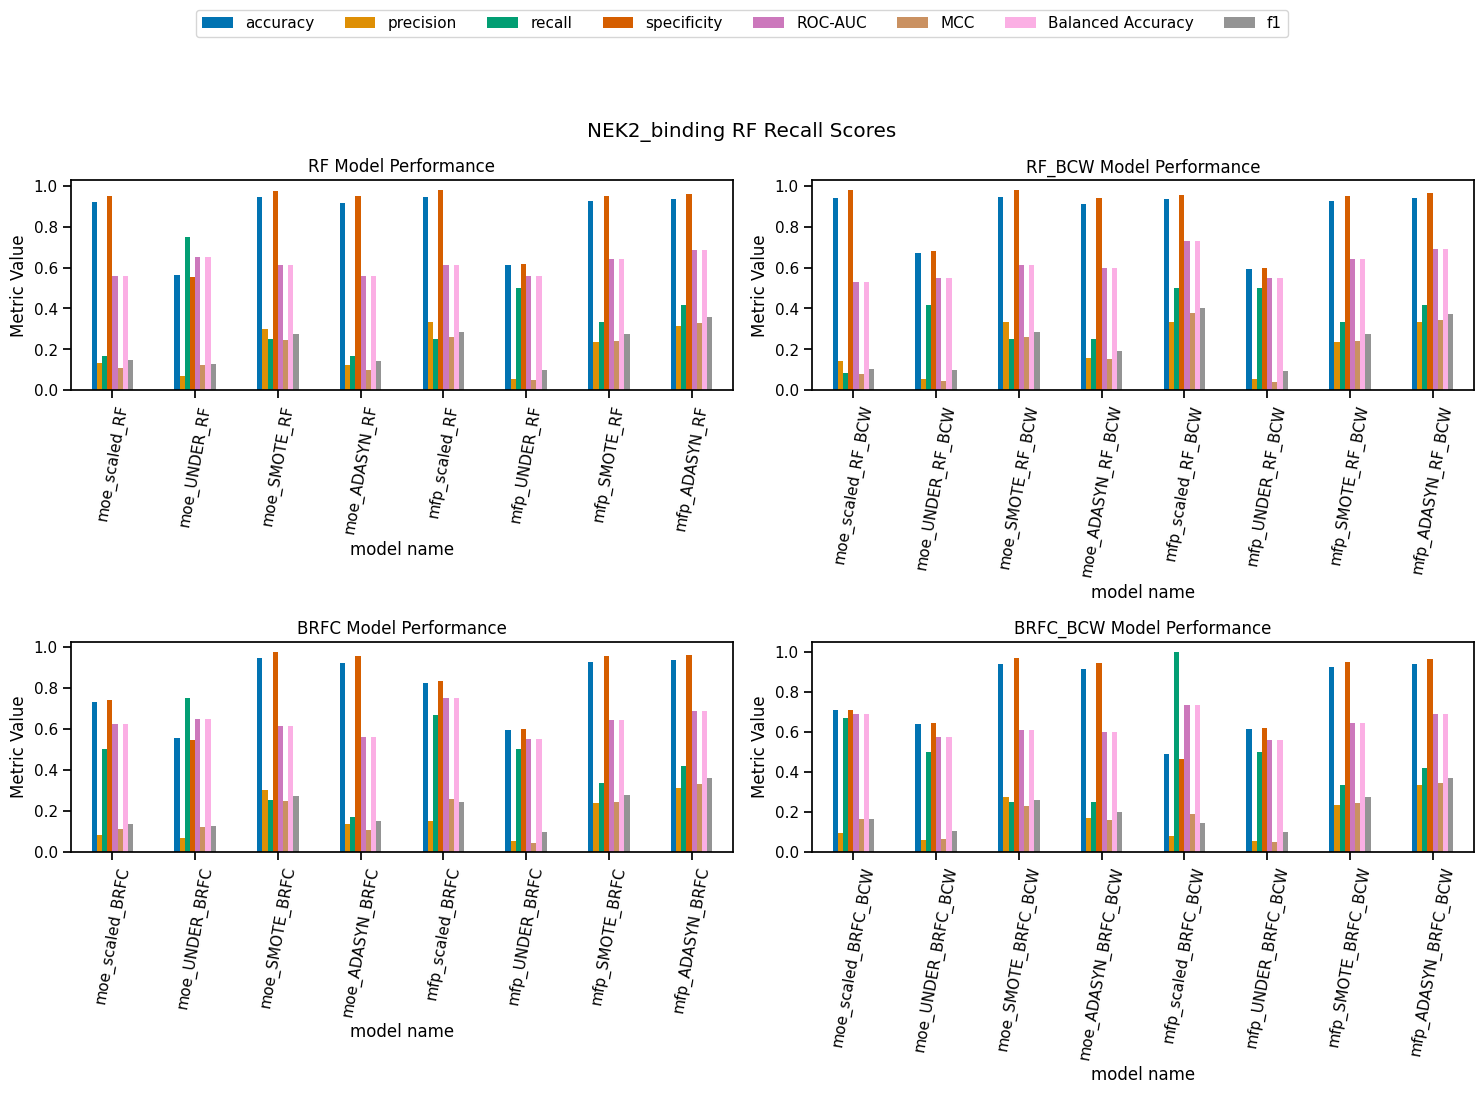

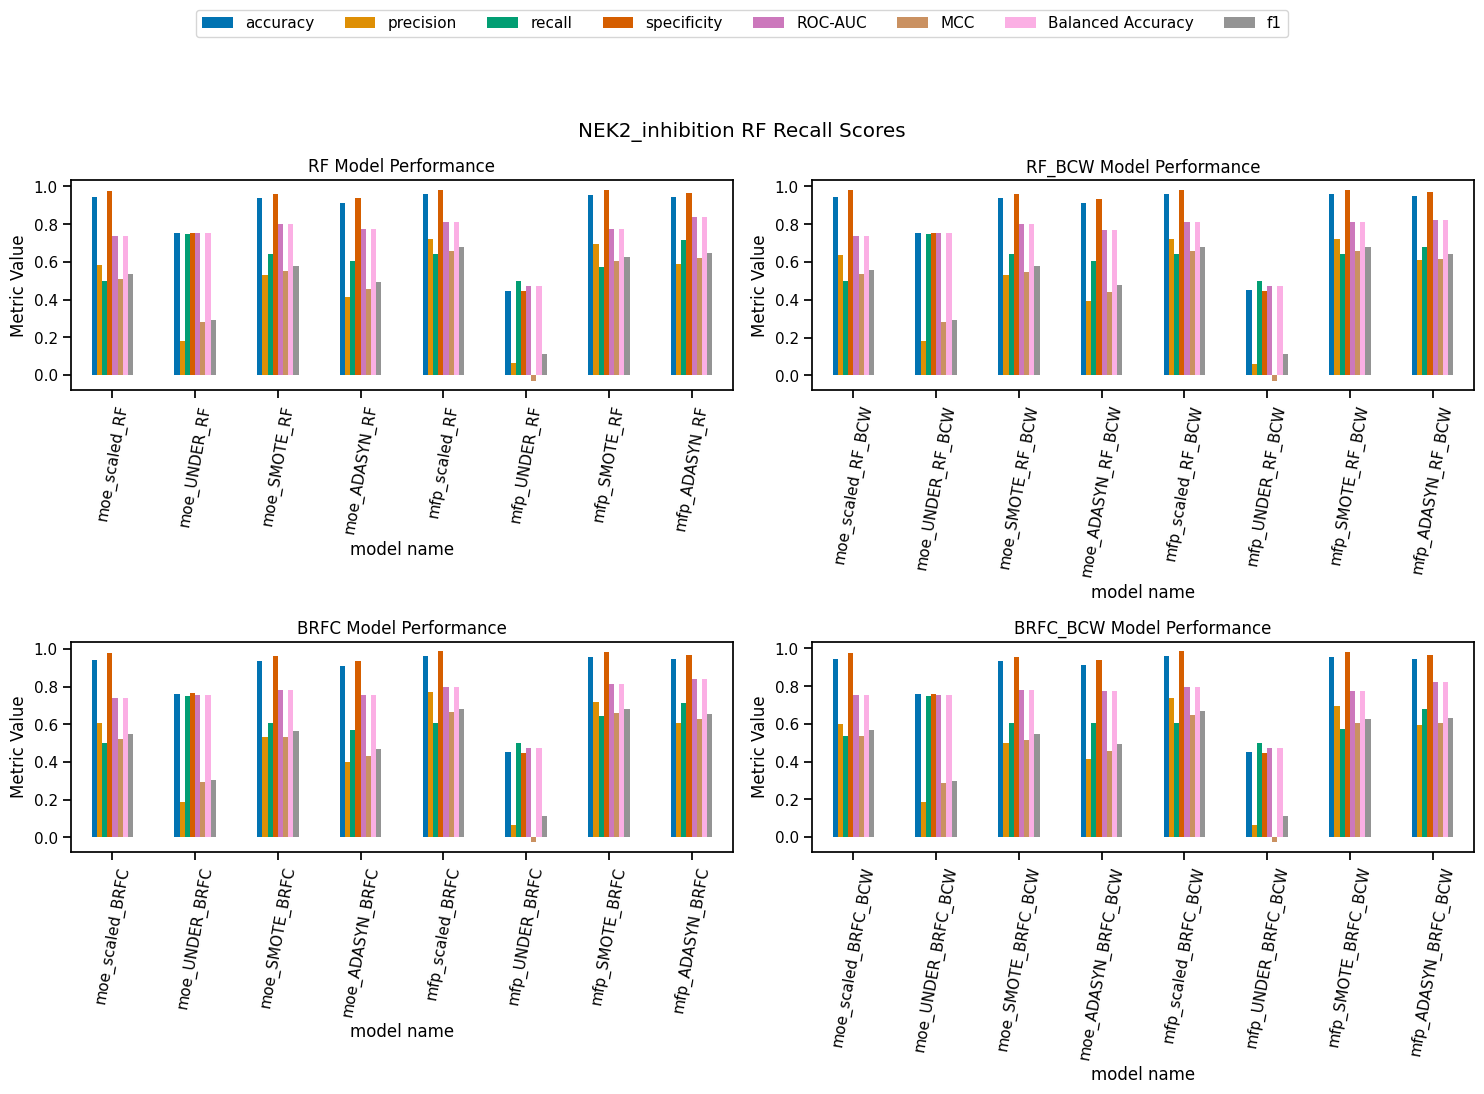

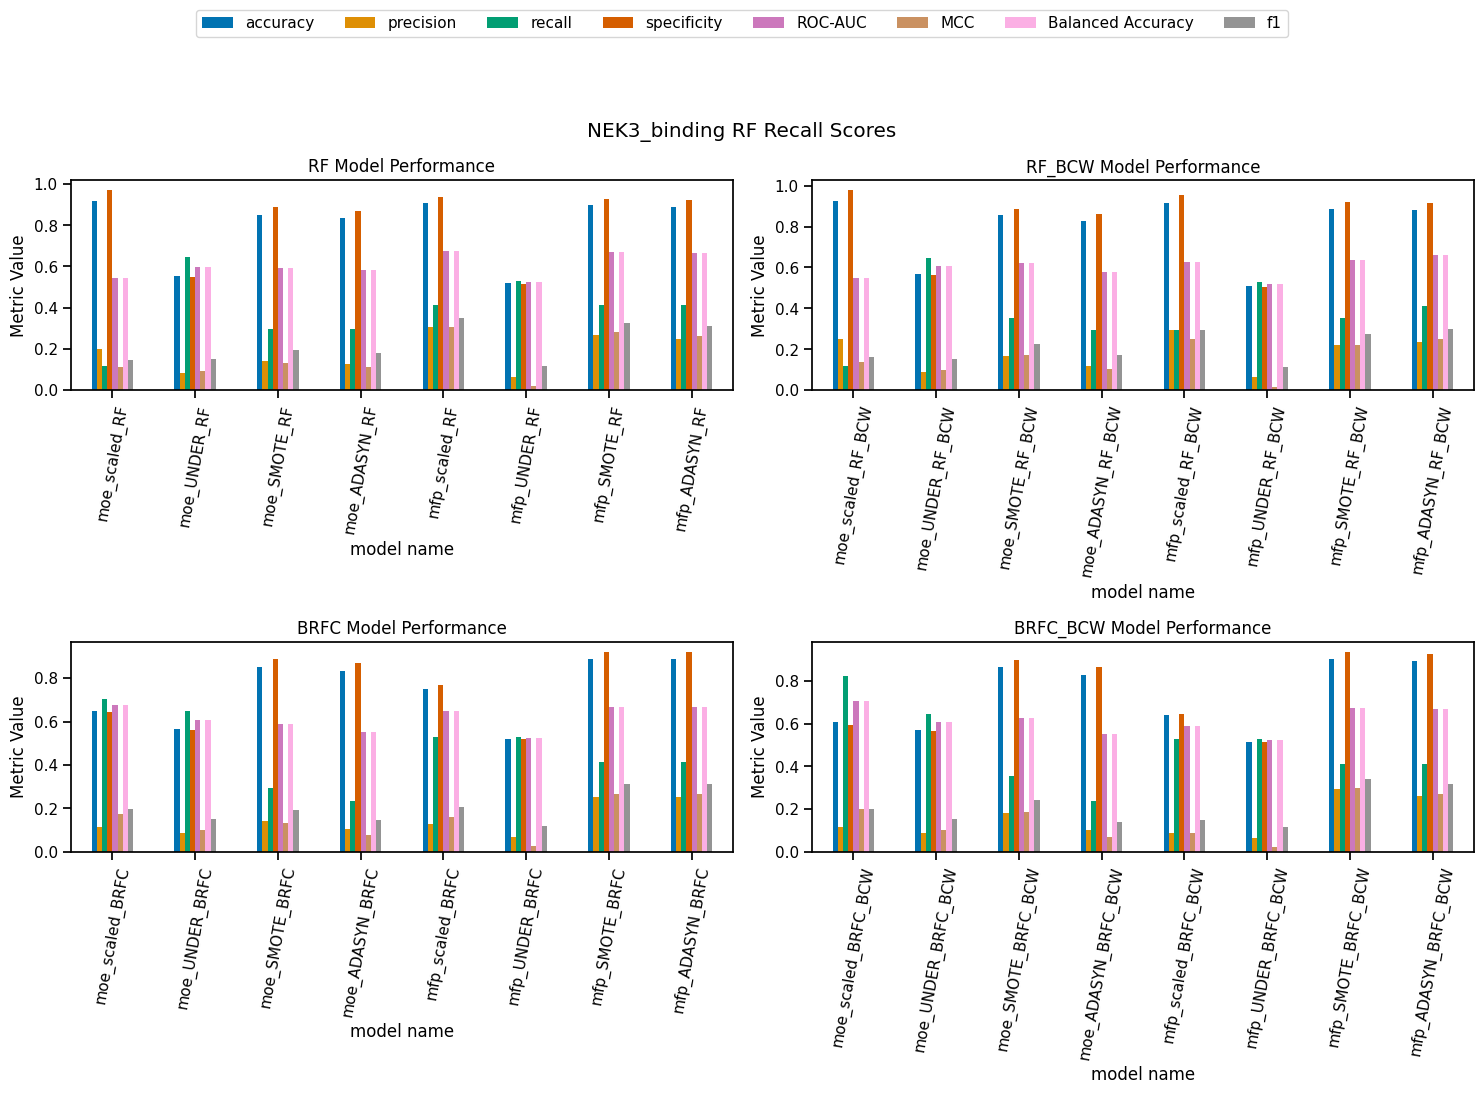

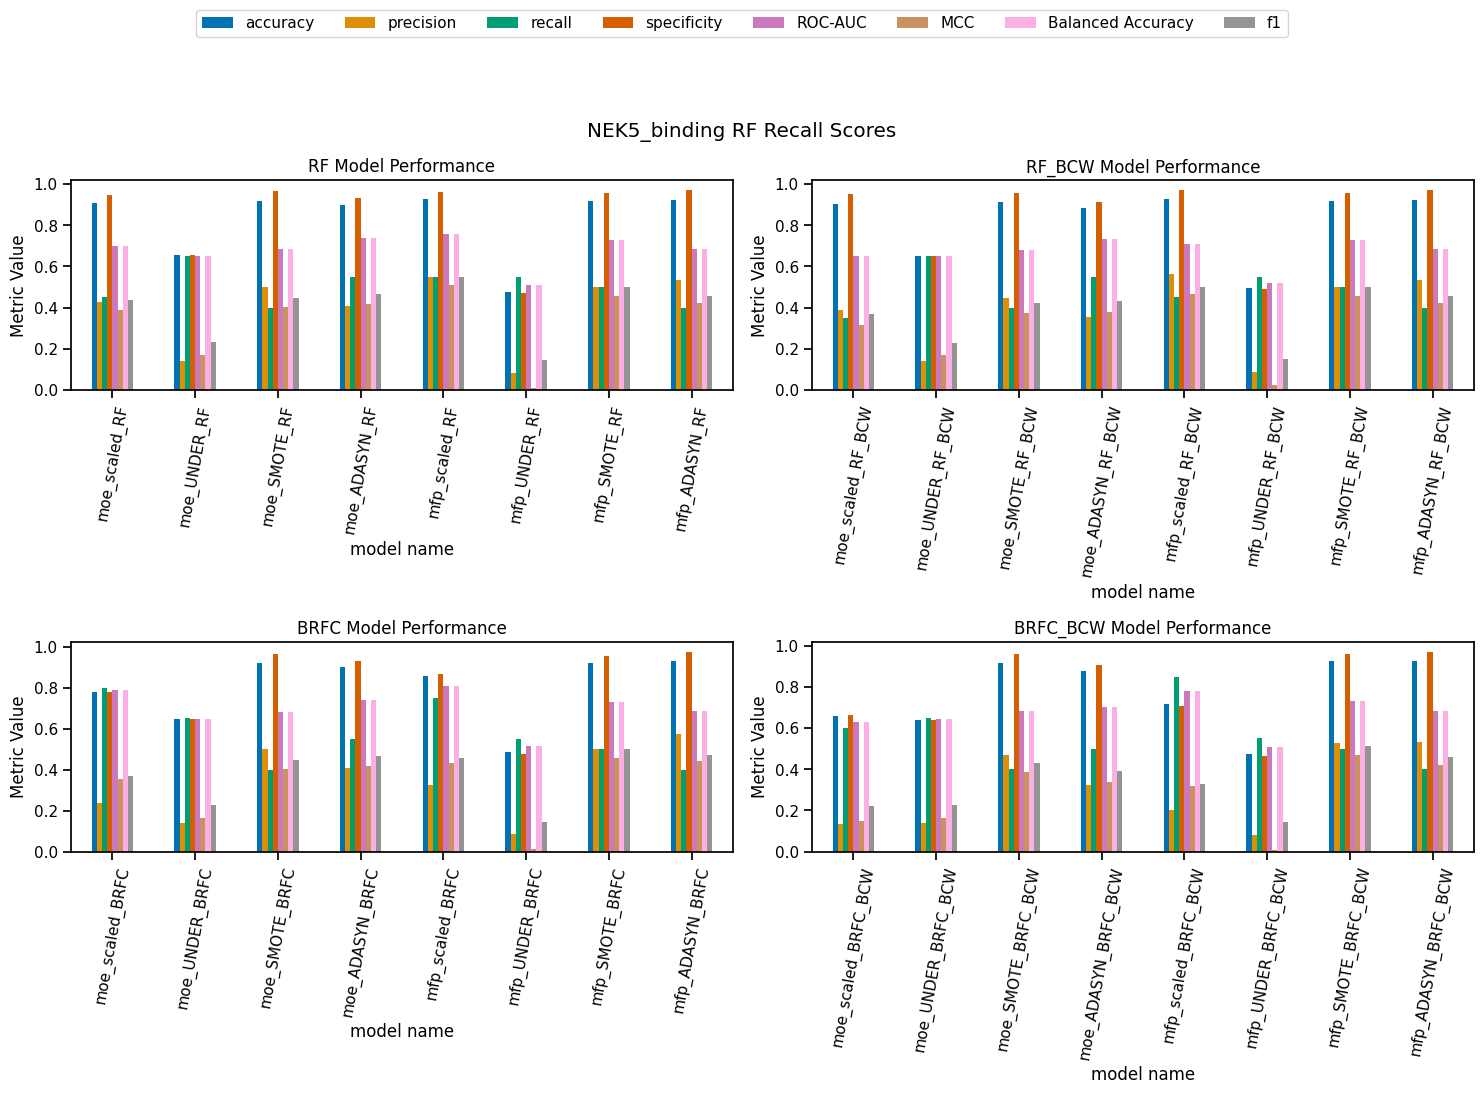

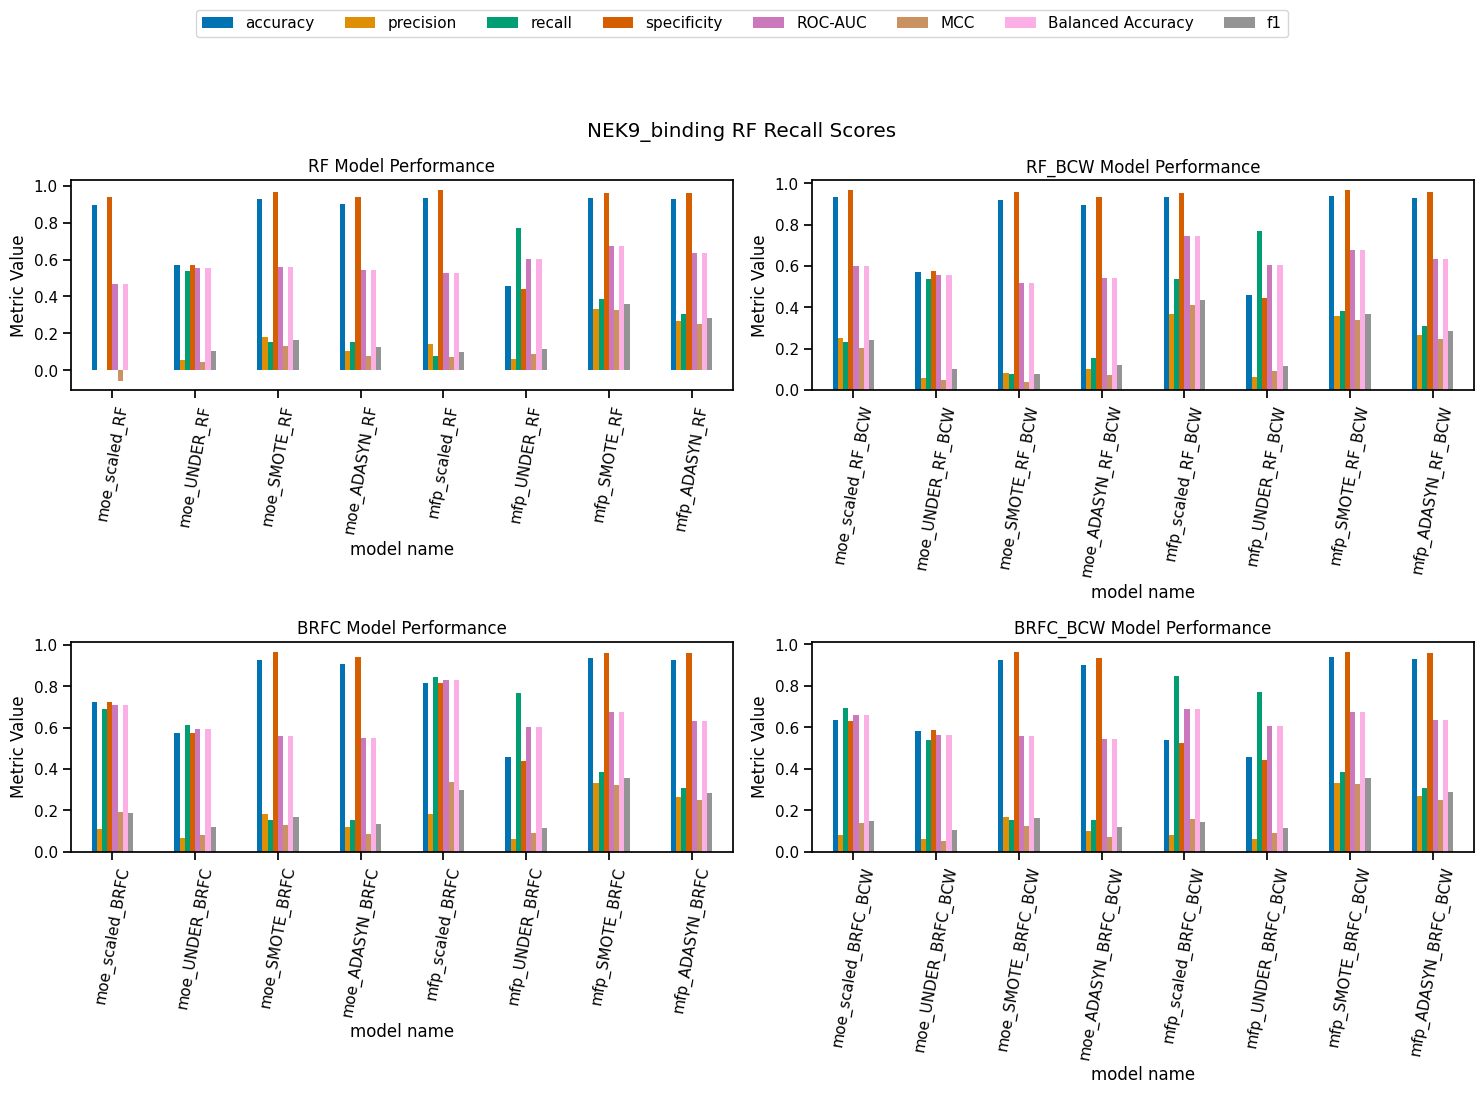

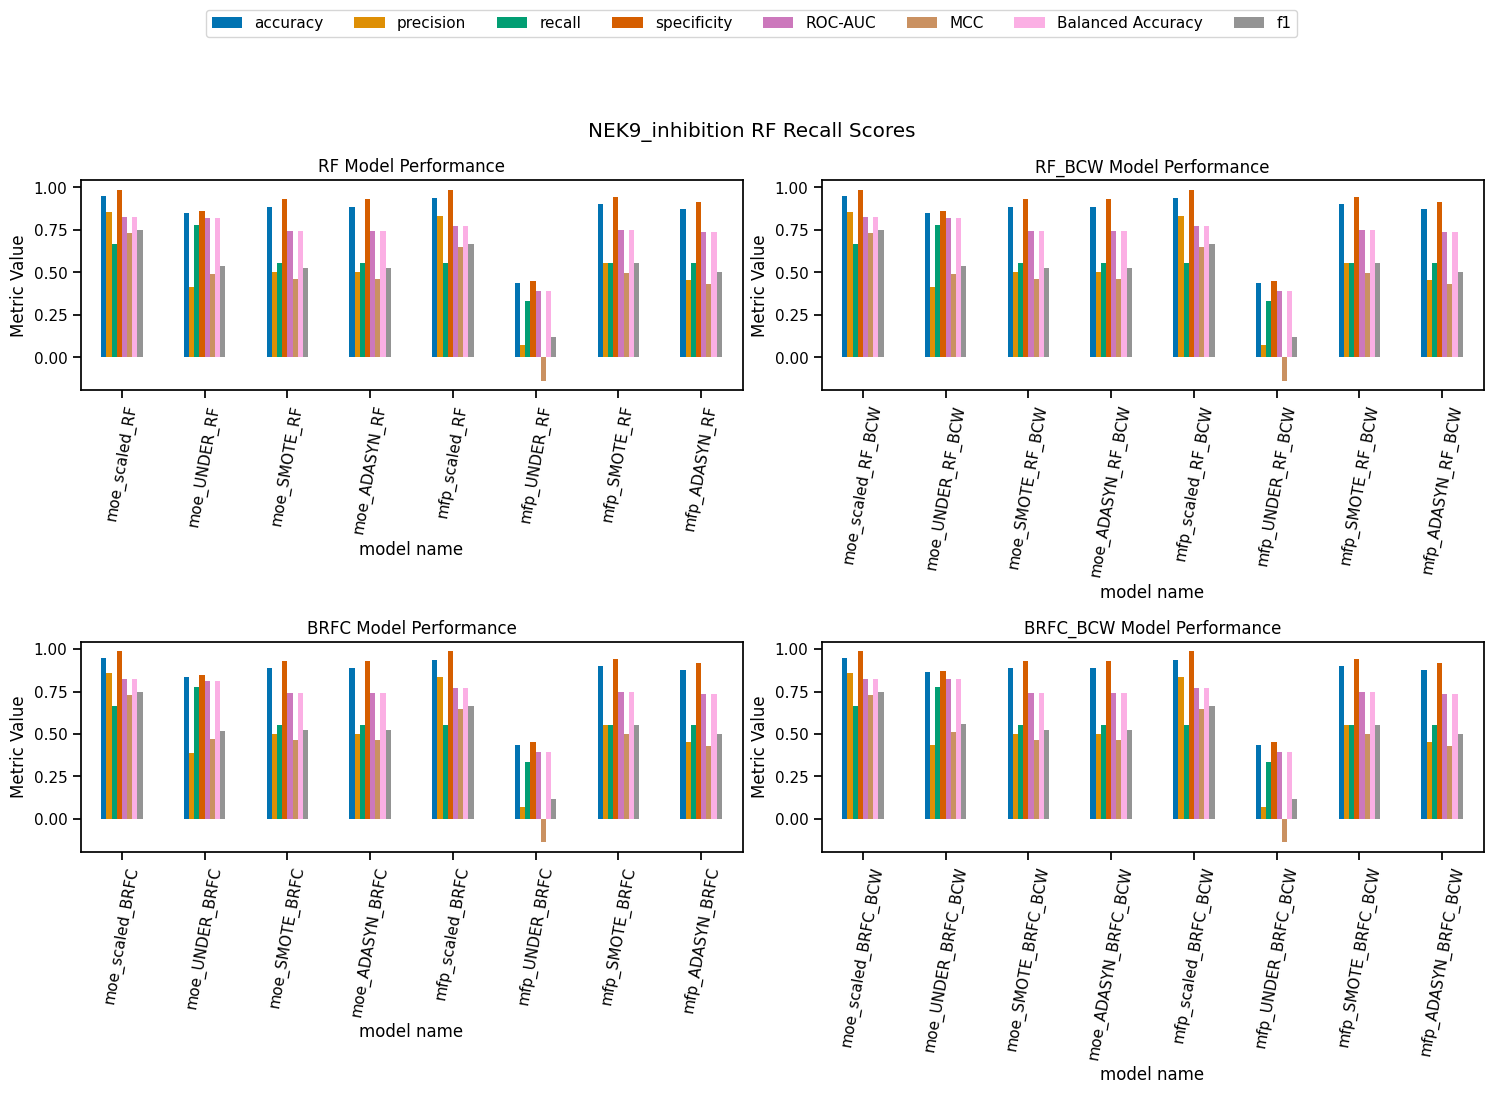

In [214]:
tptnfpfn = ['TN', 'TP', 'FP', 'FN']
for nek in neks: 
    df = df_all[df_all['NEK'] == nek]
    df = df.drop(columns = tptnfpfn)
    rf_types = df['RF_type'].unique()
    ncols = 2
    nrows = (len(rf_types)+ncols-1)//ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(15,5 * nrows))
    axes = axes.flatten()
    for ax, rf in zip(axes, rf_types):
        rf_df = df[df['RF_type'] == rf]
        rf_df.plot(x='model name',kind='bar', ax=ax, legend=False)
        ax.set_ylabel('Metric Value')
        ax.set_title(f'{rf} Model Performance')
        # ax.set_xticklabels(rf['model name'], rotation=45)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
        # print(ax.get_x
        
        

        plt.suptitle(f'{nek} RF Recall Scores')
        
    for i in range(len(rf_types), len(axes)):
        fig.delaxes(axes[i])

    handles,labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(1.1,1))
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(labels))
    # ax.legend(loc='center',bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.savefig(f'figures/RF_plots/{nek}_all_metrics.png', bbox_inches='tight')
    plt.show();    

# subplot for every RF type and loop through each NEK

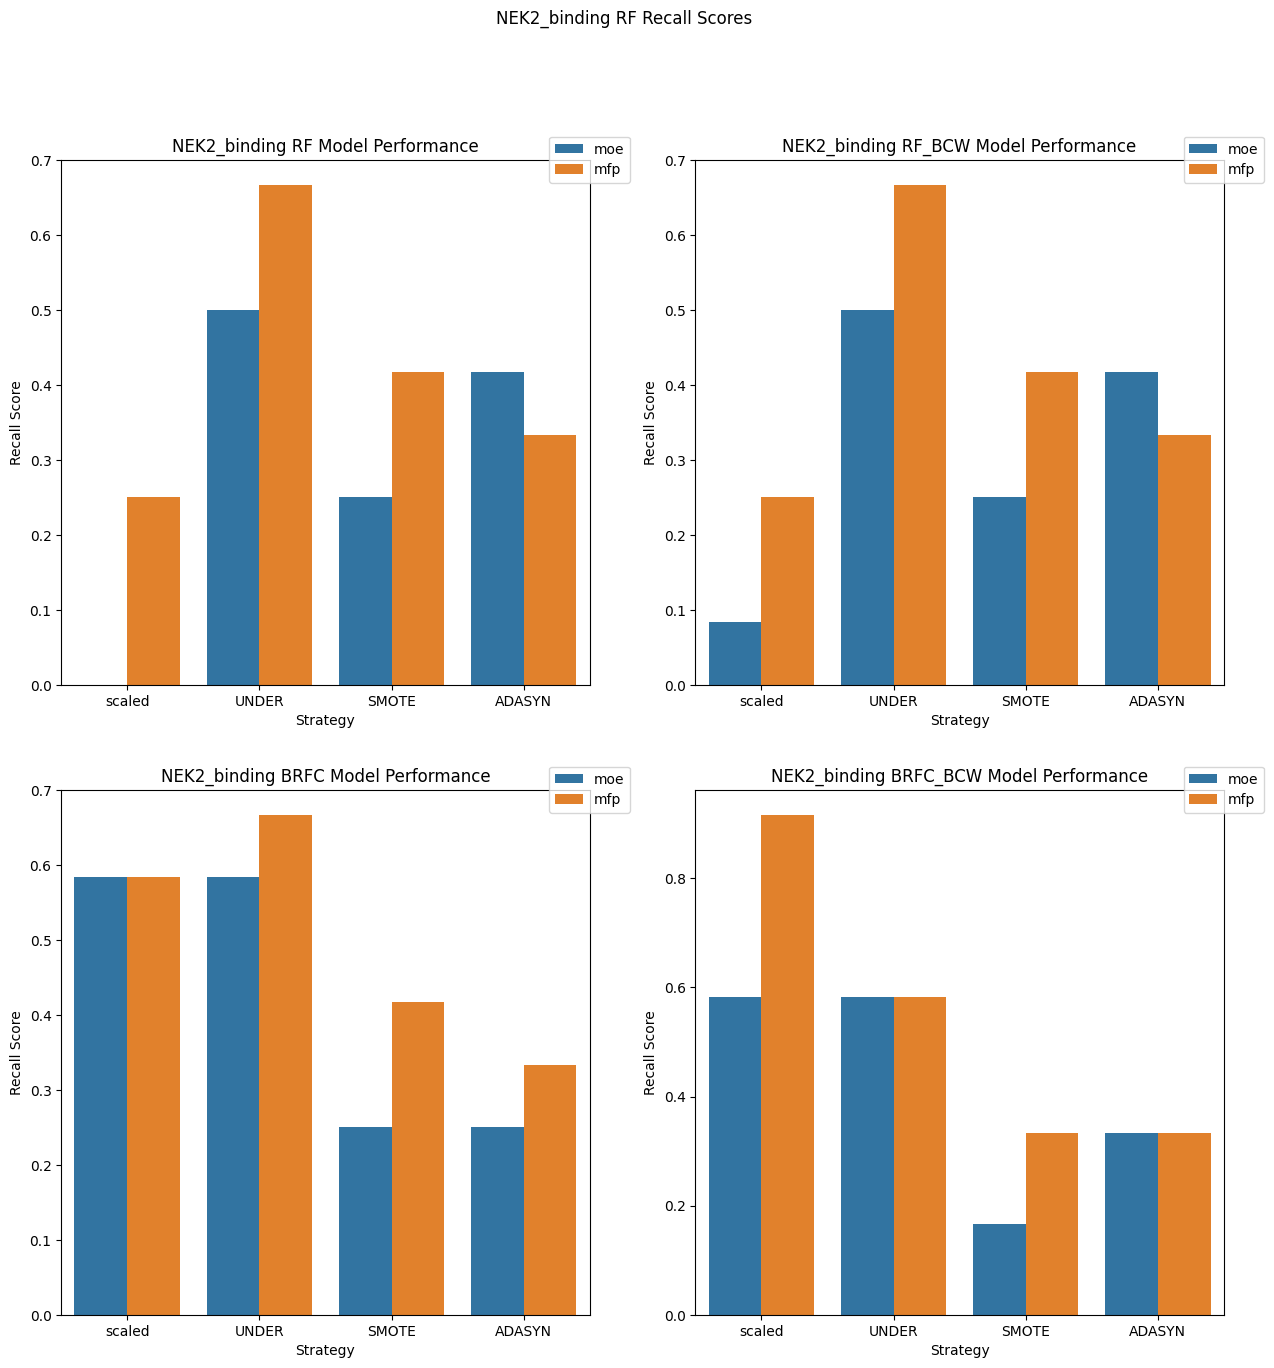

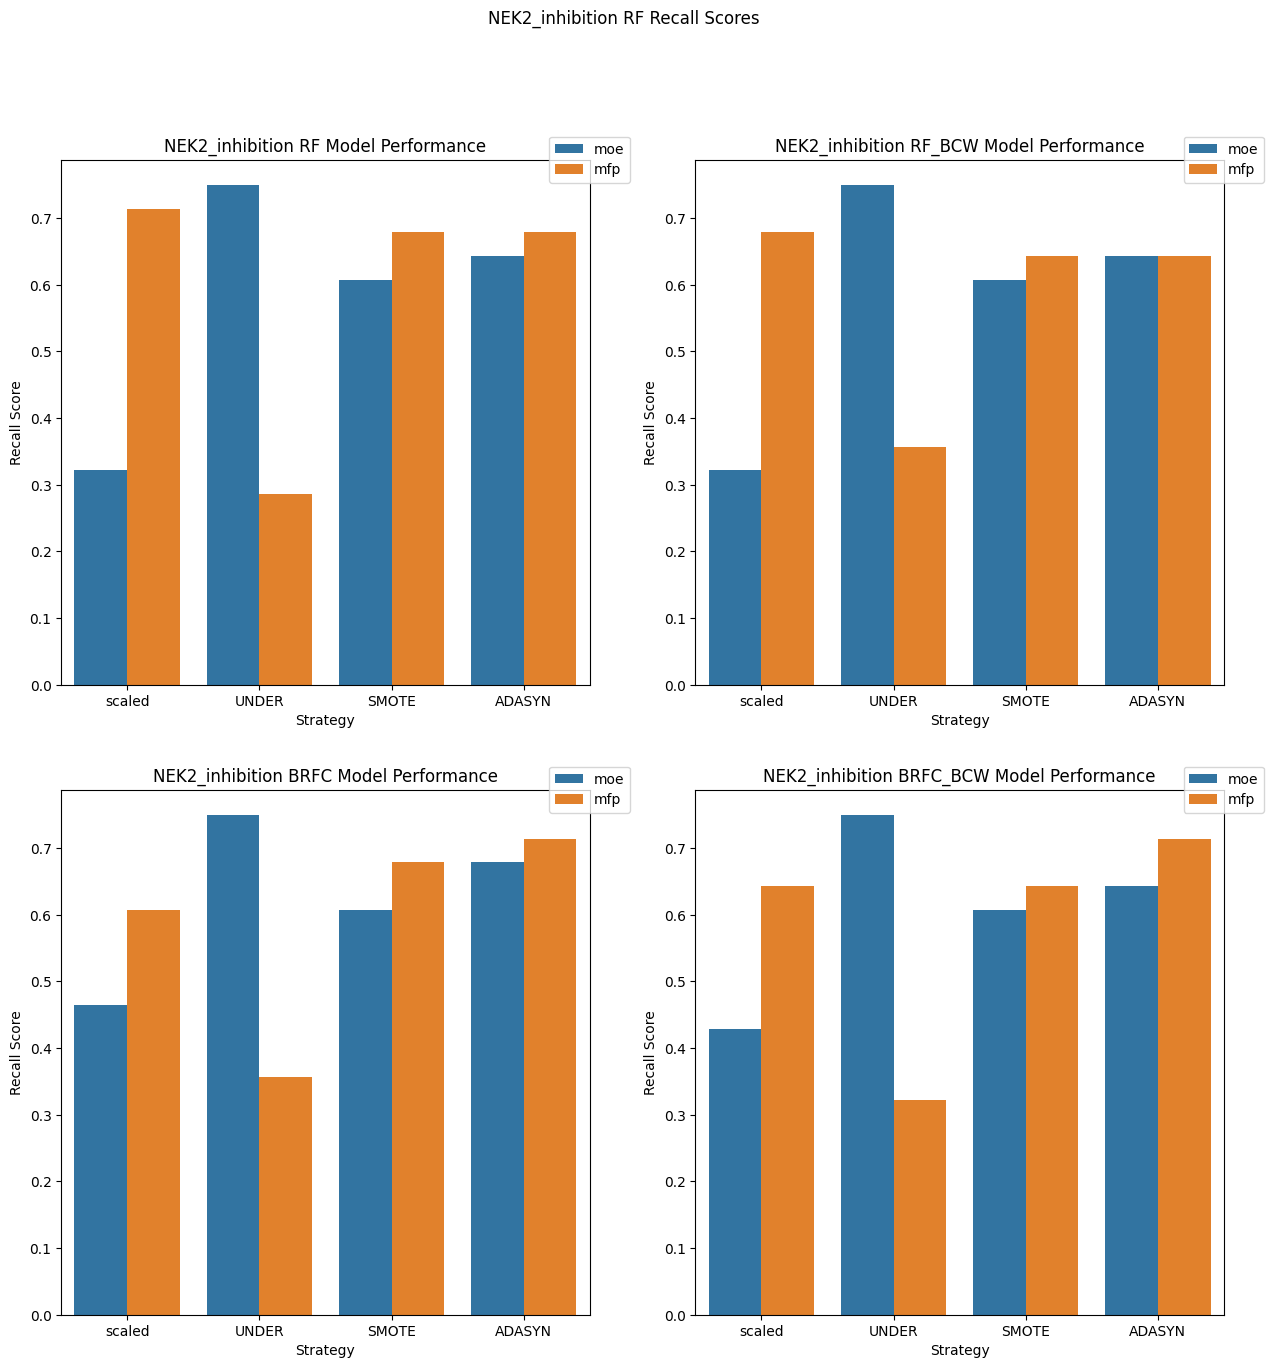

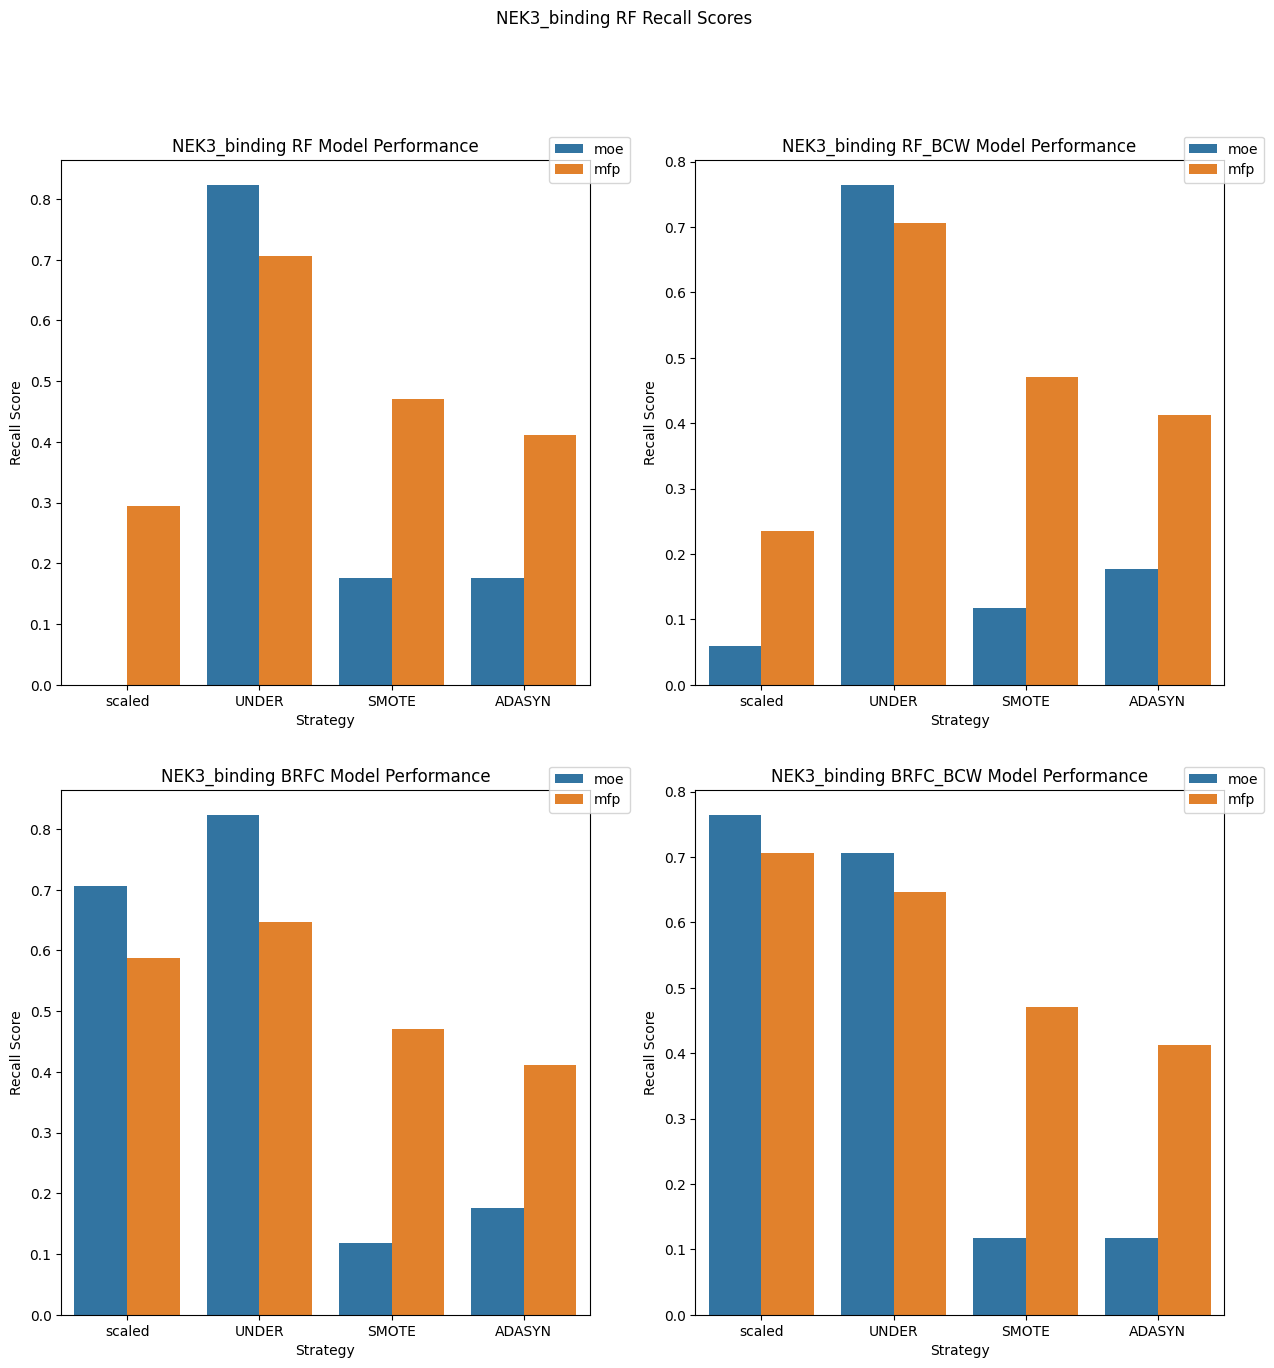

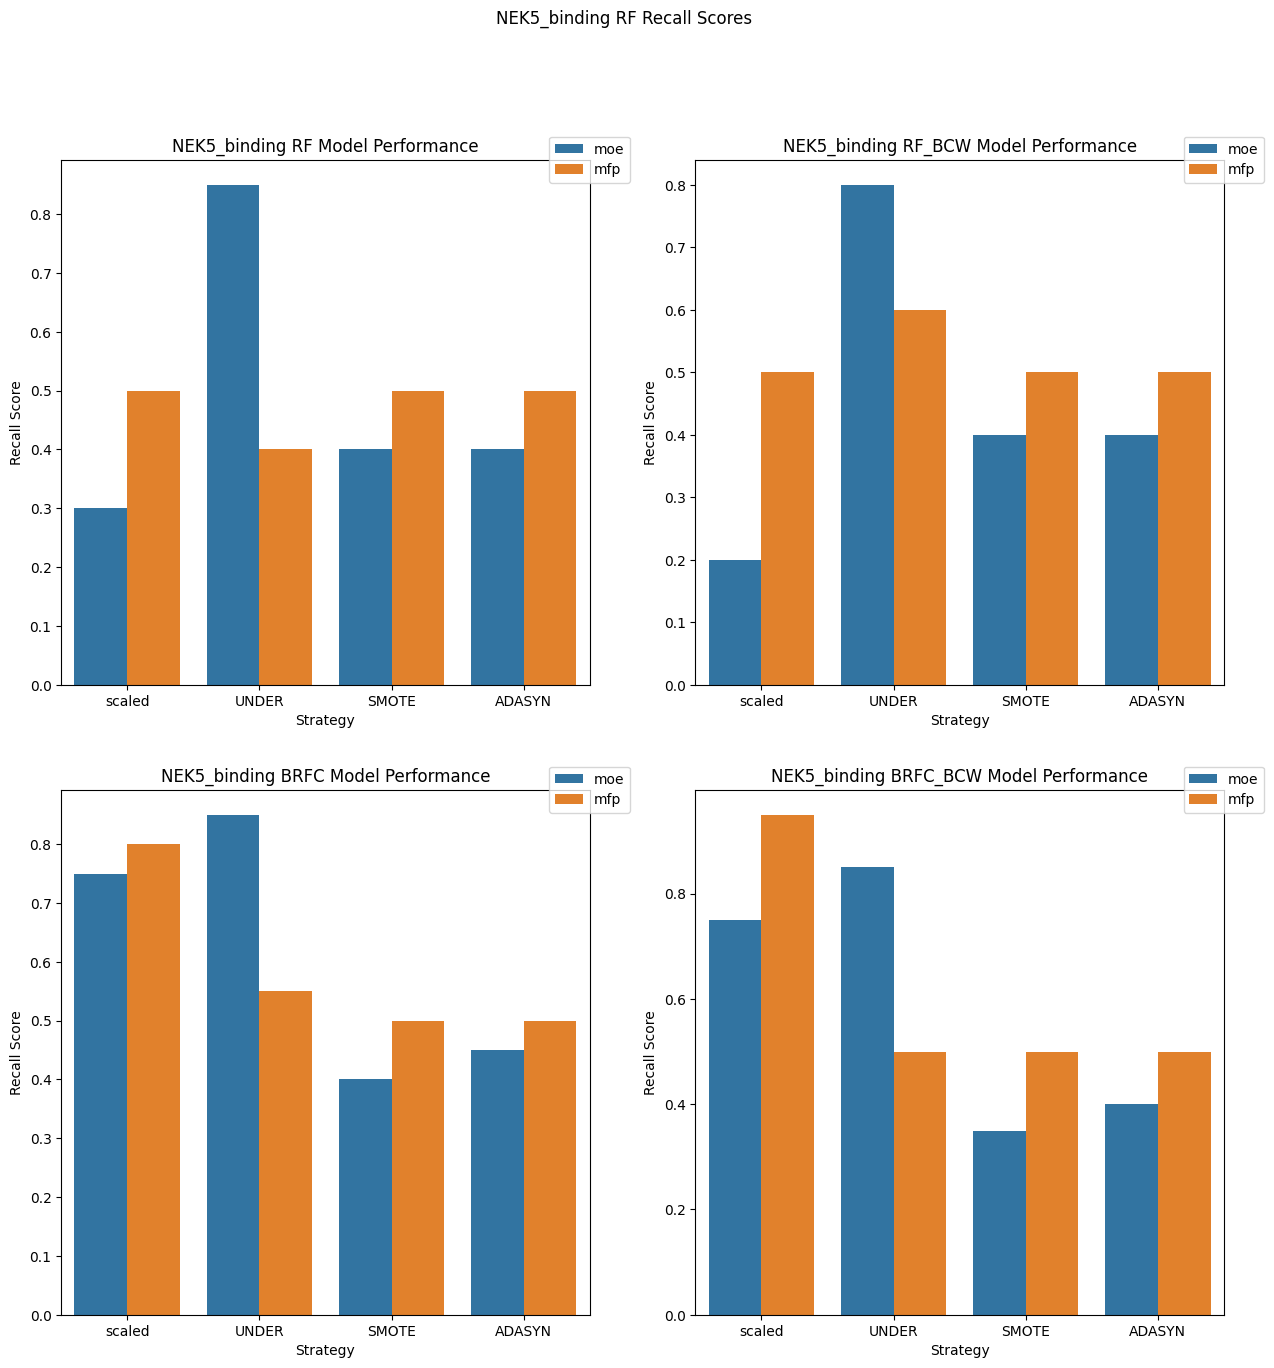

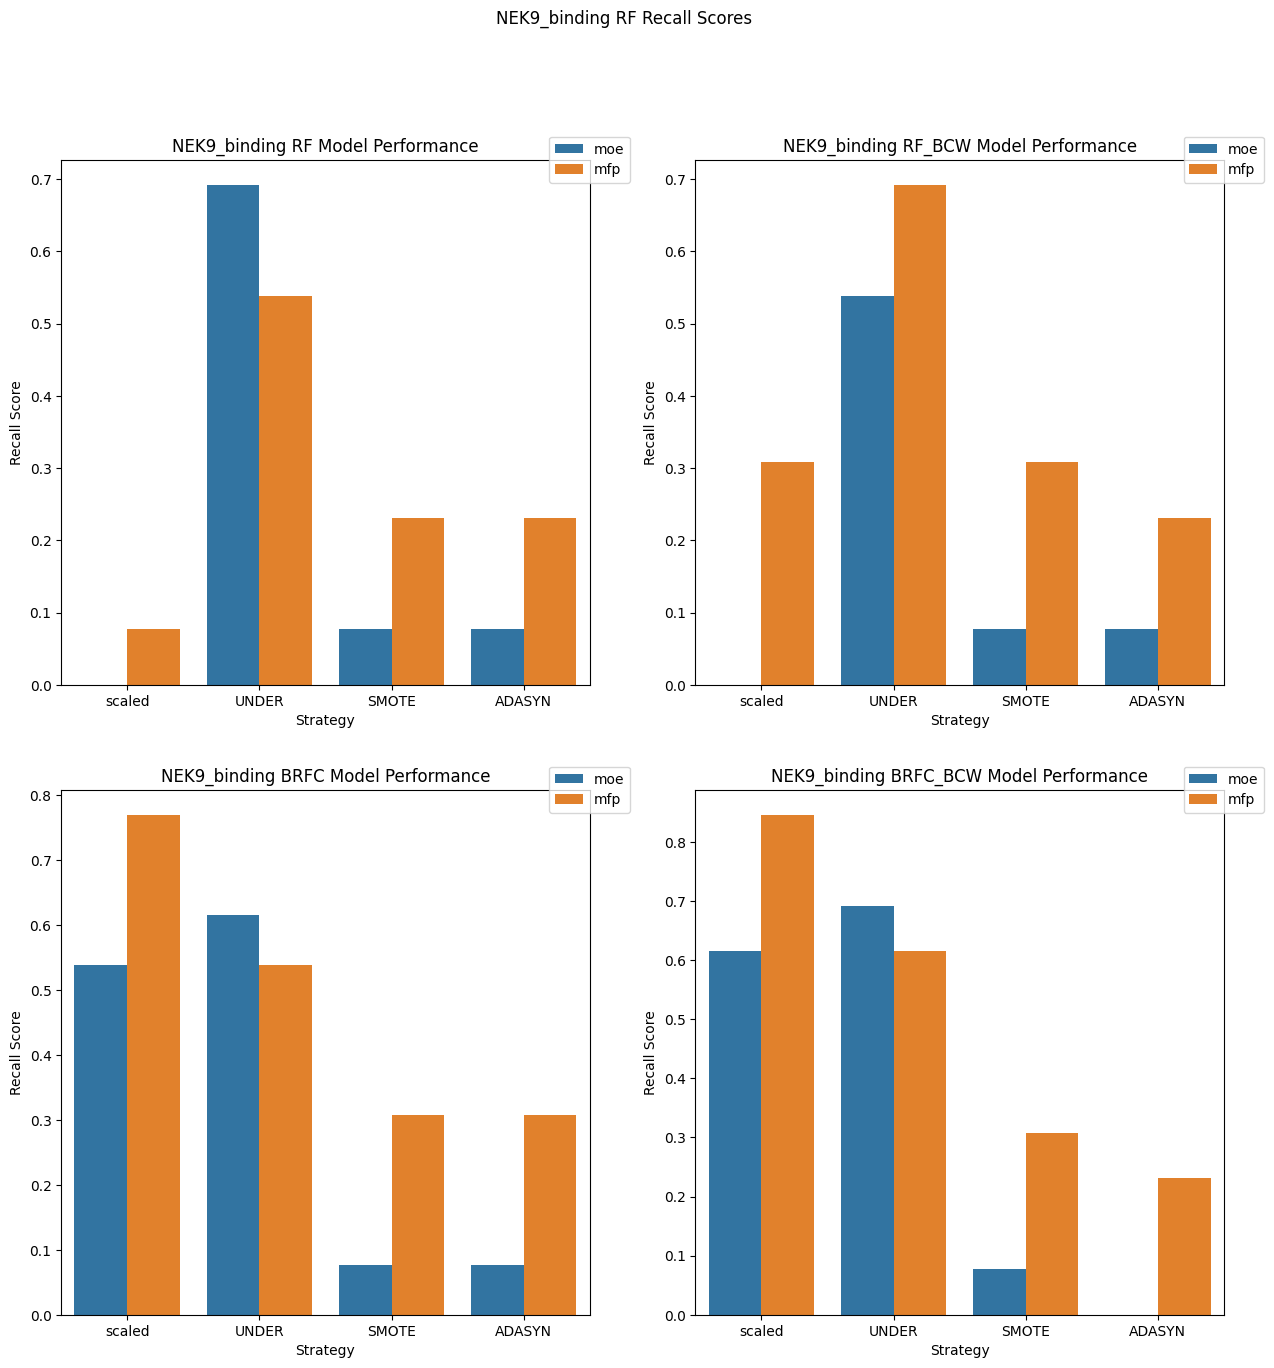

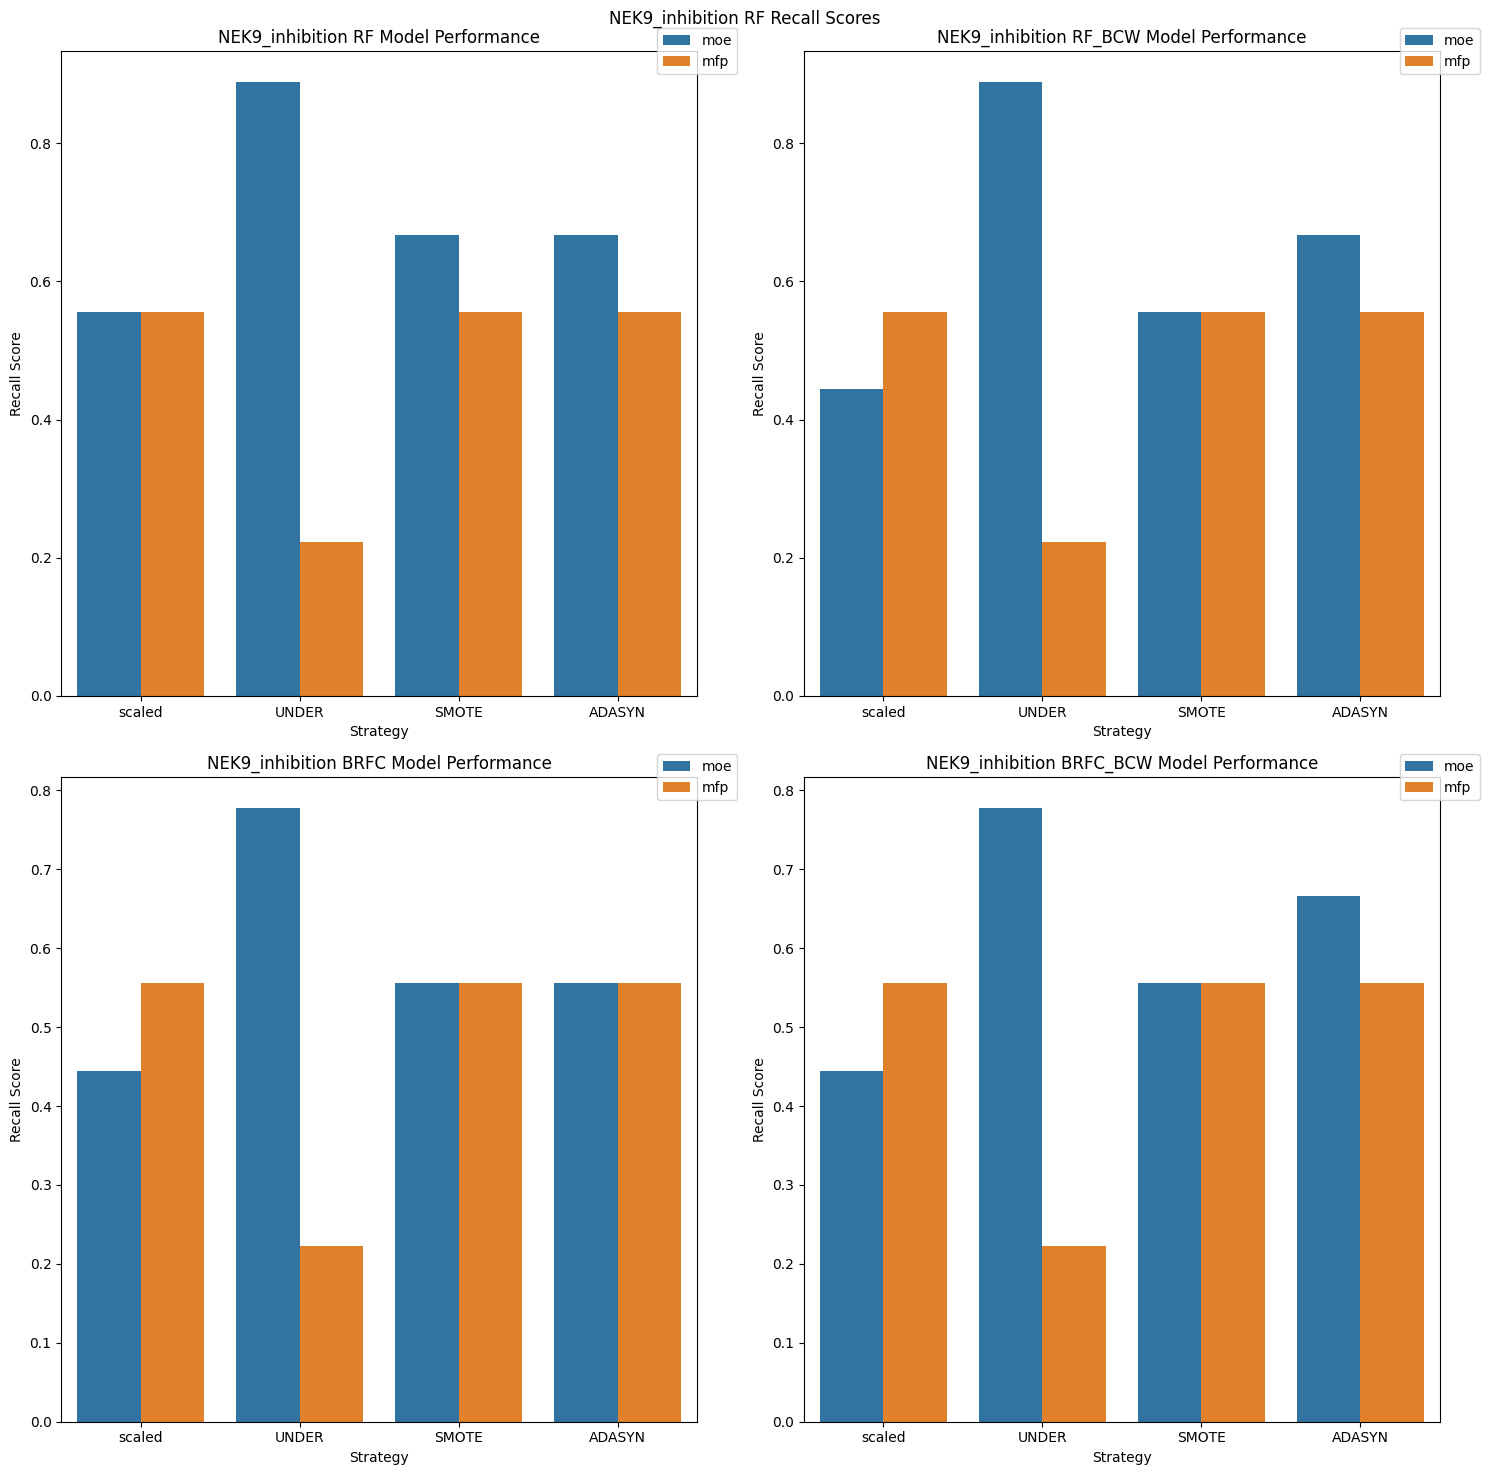

In [111]:
tptnfpfn = ['TN', 'TP', 'FP', 'FN']
for nek in neks: 
    df = df_all[df_all['NEK'] == nek]
    df = df.drop(columns = tptnfpfn)
    rf_types = df['RF_type'].unique()
    nrows = (len(rf_types)+2-1)//2
    fig, axes = plt.subplots(nrows, ncols=2, figsize=(15, 15))
    axes = axes.flatten()
    for ax, rf in zip(axes, rf_types):
        rf_df = df[df['RF_type'] == rf]
        sns.barplot(data=rf_df, x='strategy', y='recall', hue='feat_type', ax=ax)
        ax.set_xlabel('Strategy')
        ax.set_ylabel('Recall Score')
        ax.set_title(f'{nek} {rf} Model Performance')
        ax.legend(loc='center',bbox_to_anchor=(1,1))
        plt.suptitle(f'{nek} RF Recall Scores')
        # plt.savefig(f'figures/RF_plots/.png',bbox_inches='tight')
        
    plt.tight_layout()
    plt.savefig(f'figures/RF_plots/RF_NEK_recall_moe_mfp.png',bbox_inches='tight')
    plt.show();    

# save all subplots in one fig 

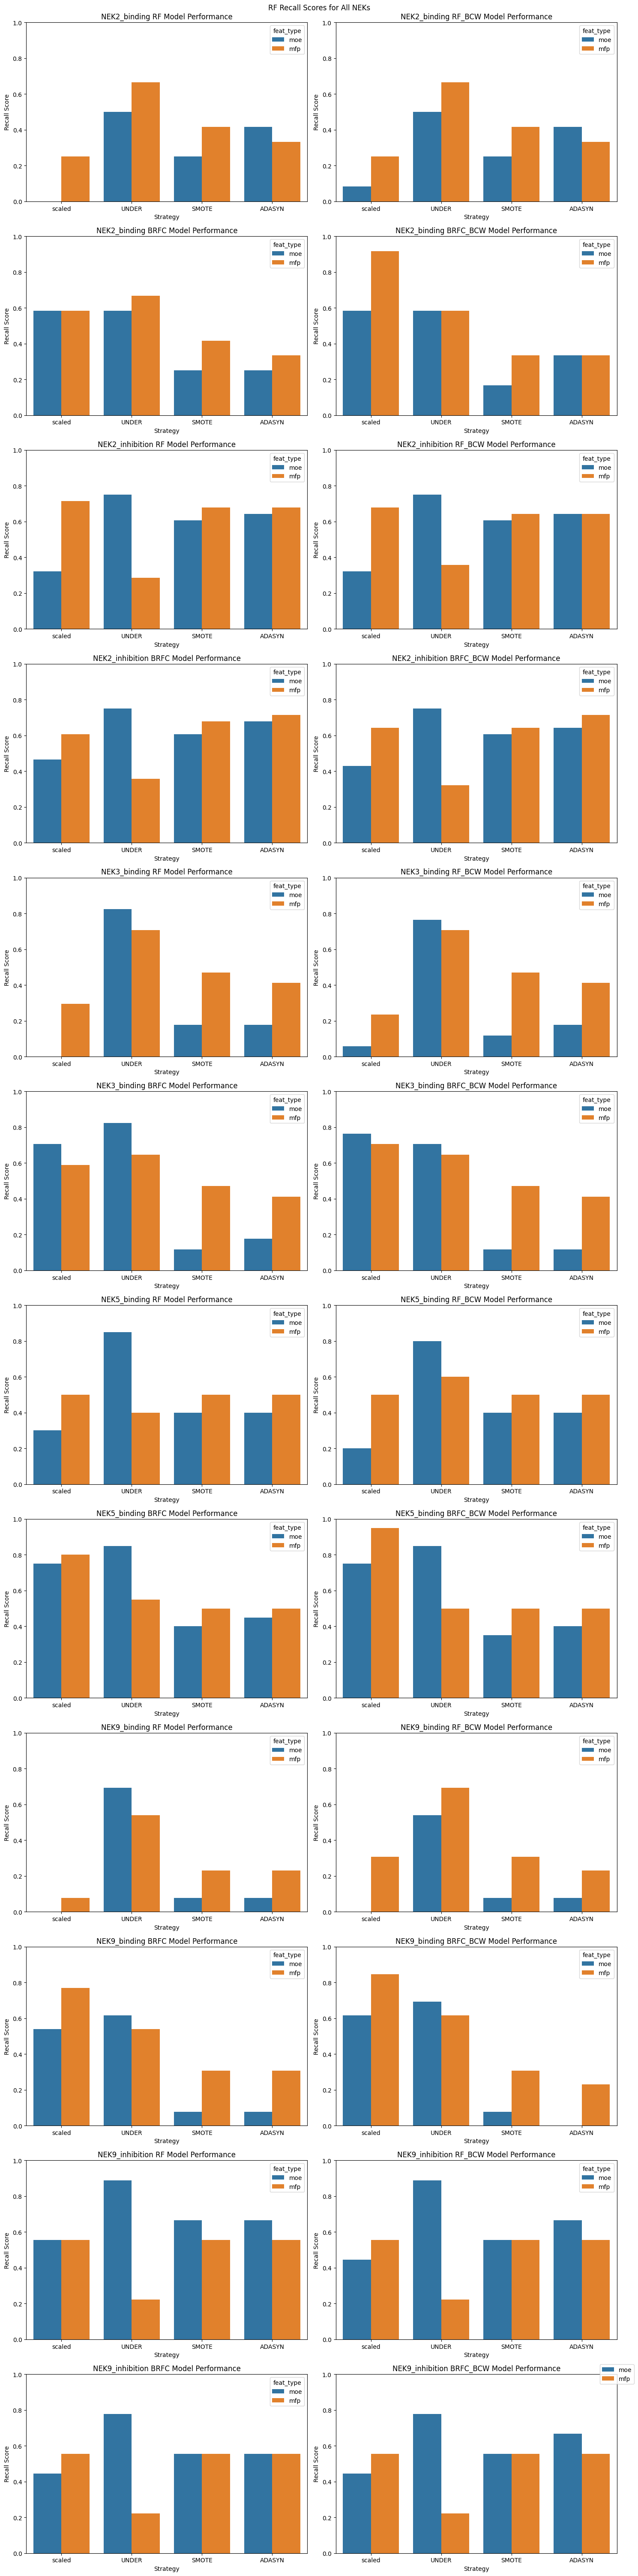

In [126]:
total_rf_types = len(df_all['RF_type'].unique())
total_neks = len(neks)
total_subplots = total_rf_types * total_neks
nrows = (total_subplots + 2 - 1) // 2
fig, axes = plt.subplots(nrows, ncols=2, figsize=(15, nrows * 5))
axes = axes.flatten()
ax_idx = 0
for nek in neks:
    df = df_all[df_all['NEK'] == nek]
    df = df.drop(columns=['TN', 'TP', 'FP', 'FN'])
    rf_types = df['RF_type'].unique()
    
    for rf in rf_types:
        ax = axes[ax_idx]
        rf_df = df[df['RF_type'] == rf]
        sns.barplot(data=rf_df, x='strategy', y='recall', hue='feat_type', ax=ax)
        ax.set_xlabel('Strategy')
        ax.set_ylabel('Recall Score')
        ax.set_title(f'{nek} {rf} Model Performance')
        ax.set_ylim(0,1)
        ax_idx += 1
ax.legend(loc='center',bbox_to_anchor=(1,1))
handles, labels = ax.get_legend_handles_labels()

plt.tight_layout();
plt.suptitle('RF Recall Scores for All NEKs',y=1.001)
plt.savefig('figures/RF_plots/RF_NEK_recall_moe_mfp.png', bbox_inches='tight')
plt.show();

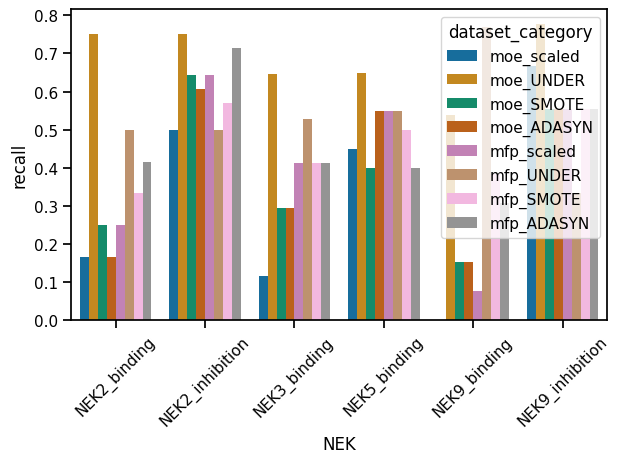

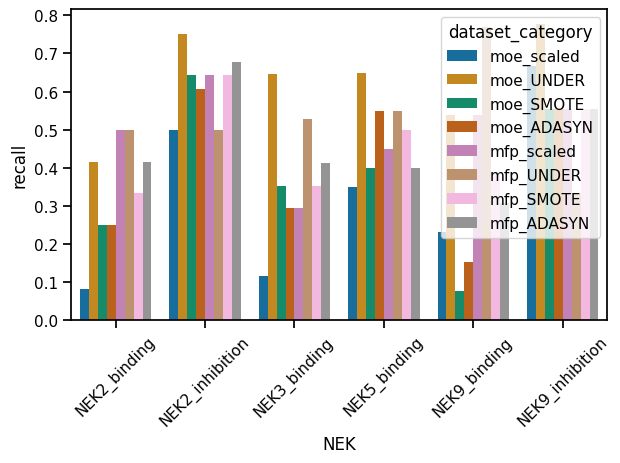

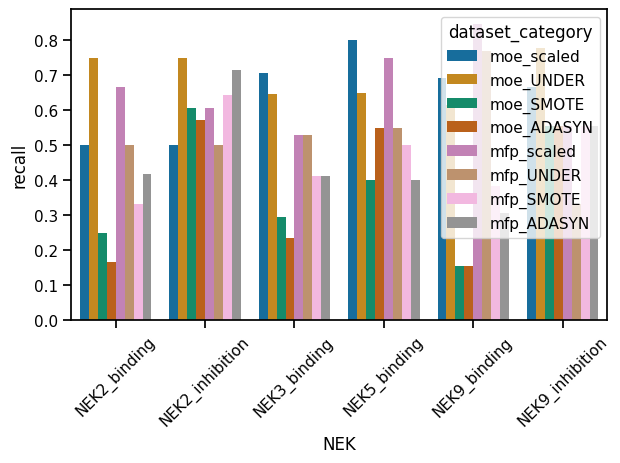

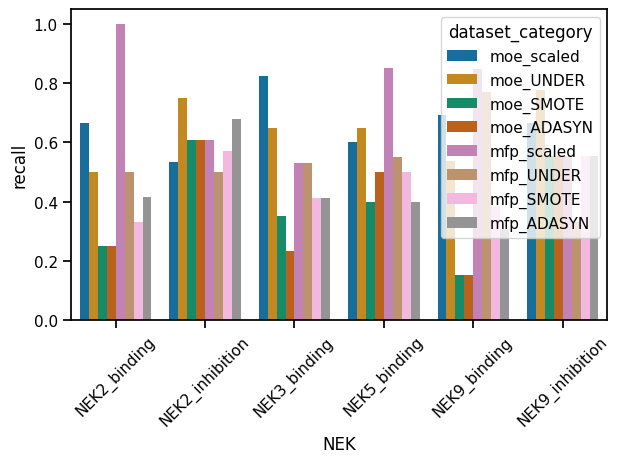

In [193]:
tptnfpfn = ['TN', 'TP', 'FP', 'FN']
for rf in df_all['RF_type'].unique(): 
    df = df_all[df_all['RF_type'] == rf]
    df = df.drop(columns = tptnfpfn)
    sns.barplot(data=df, x='NEK', y='recall', hue='dataset_category')
    plt.xticks(rotation=45)
    # nrows = (len(rf_types)+2-1)//2
    # fig, axes = plt.subplots(nrows, ncols=2, figsize=(15, 15))
    # axes = axes.flatten()
    # for ax, rf in zip(axes, rf_types):
    #     rf_df = df[df['RF_type'] == rf]
    #     sns.barplot(data=rf_df, x='NEK', y='recall', hue='dataset_category', ax=ax)
    #     ax.set_xlabel('Strategy')
    #     ax.set_ylabel('Recall Score')
    #     ax.set_title(f'{nek} {rf} Model Performance')
    #     ax.legend(loc='center',bbox_to_anchor=(1,1))
    #     plt.suptitle(f'{nek} RF Recall Scores')
    #     # plt.savefig(f'figures/RF_plots/.png',bbox_inches='tight')
        
    plt.tight_layout()
    plt.show();    

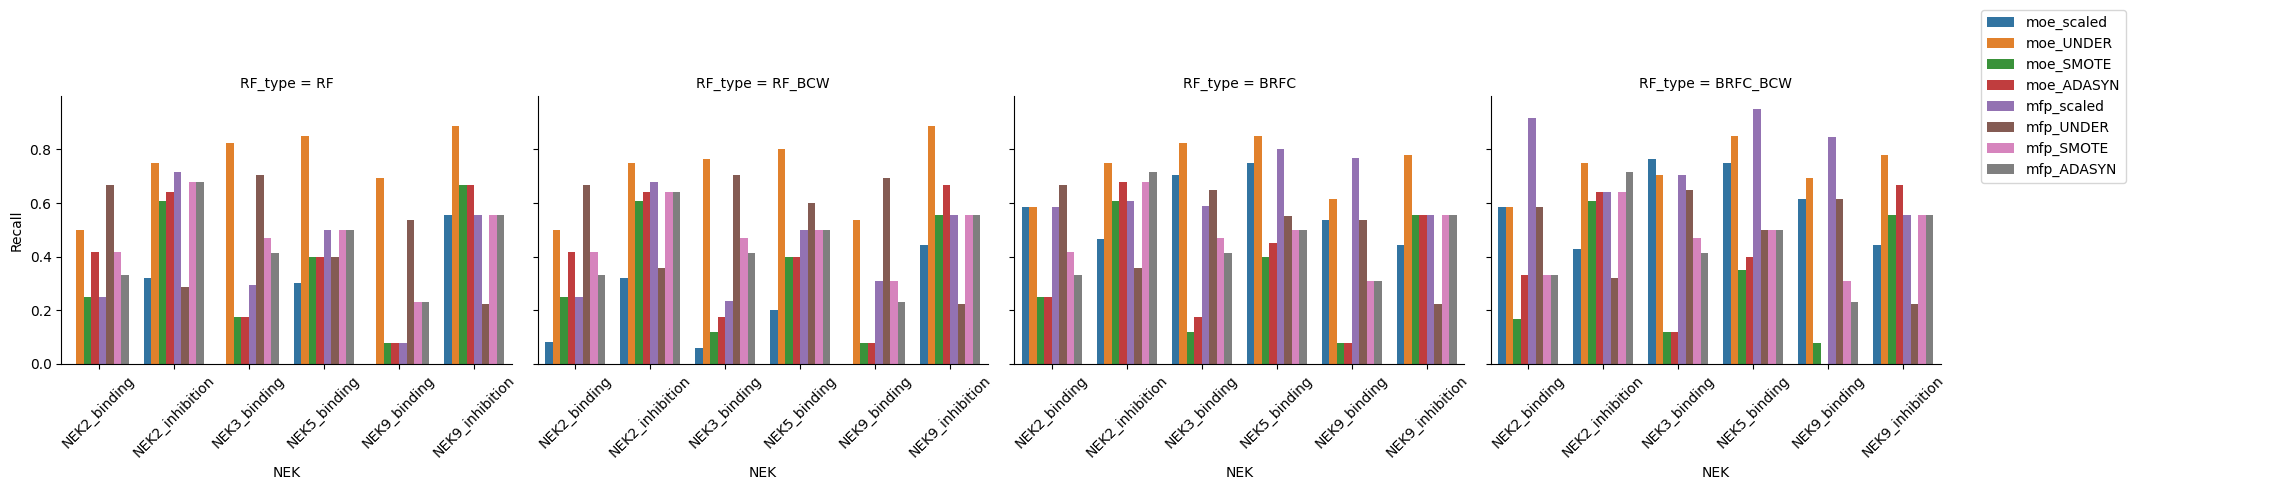

In [128]:
tptnfpfn = ['TN', 'TP', 'FP', 'FN']

# sns.catplot(data=nek_df, x='RF_type', y='recall', hue='strategy',col='feat_type', kind='bar')

df = df_all.drop(columns = tptnfpfn)
g2 = sns.catplot(data=df, x='NEK', y='recall', hue='dataset_category',col='RF_type', kind='bar')
plt.xticks(rotation=45)
sns.move_legend(g2, (1.0, 0.4))

g2.fig.subplots_adjust(top=0.95)
for ax in g2.axes.flat:
    ax.set_ylabel('Recall')
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.legend(loc='center',bbox_to_anchor=(1.25,1))
plt.tight_layout()
plt.savefig(f'figures/RF_plots/RF_recall_horizontal_by_RF_type.png',bbox_inches='tight')
plt.show();

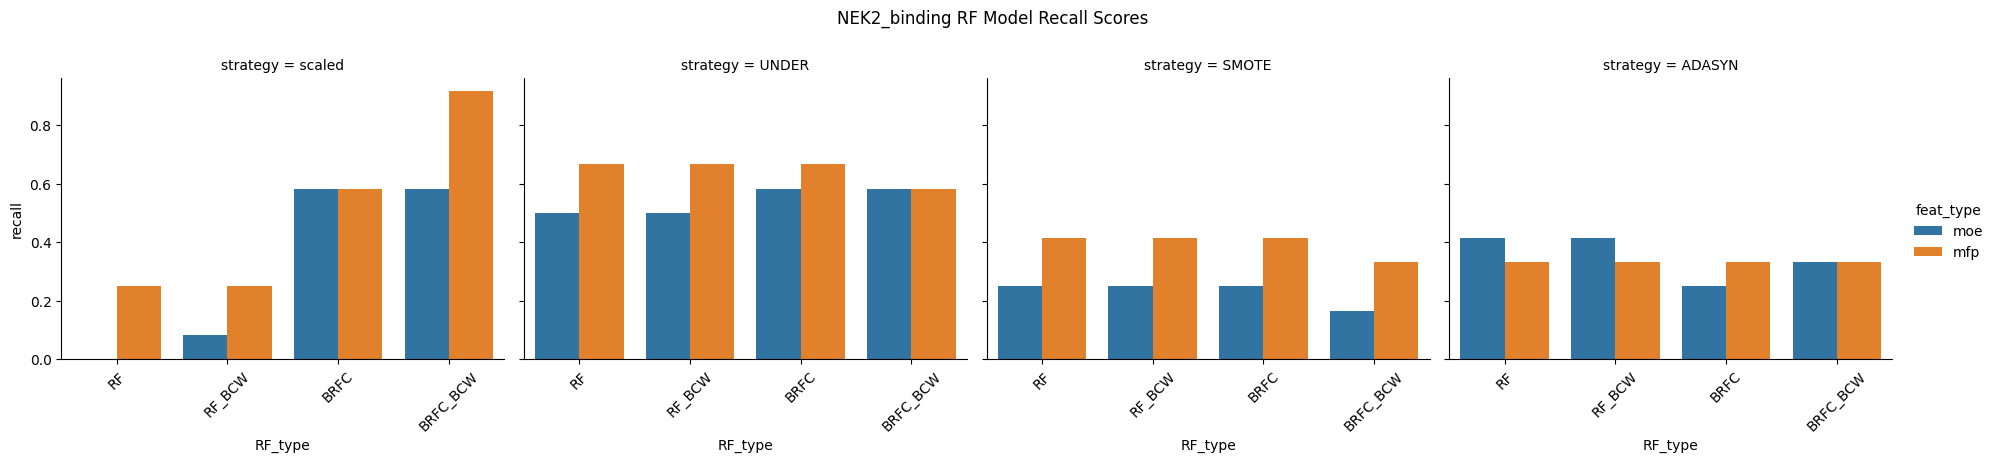

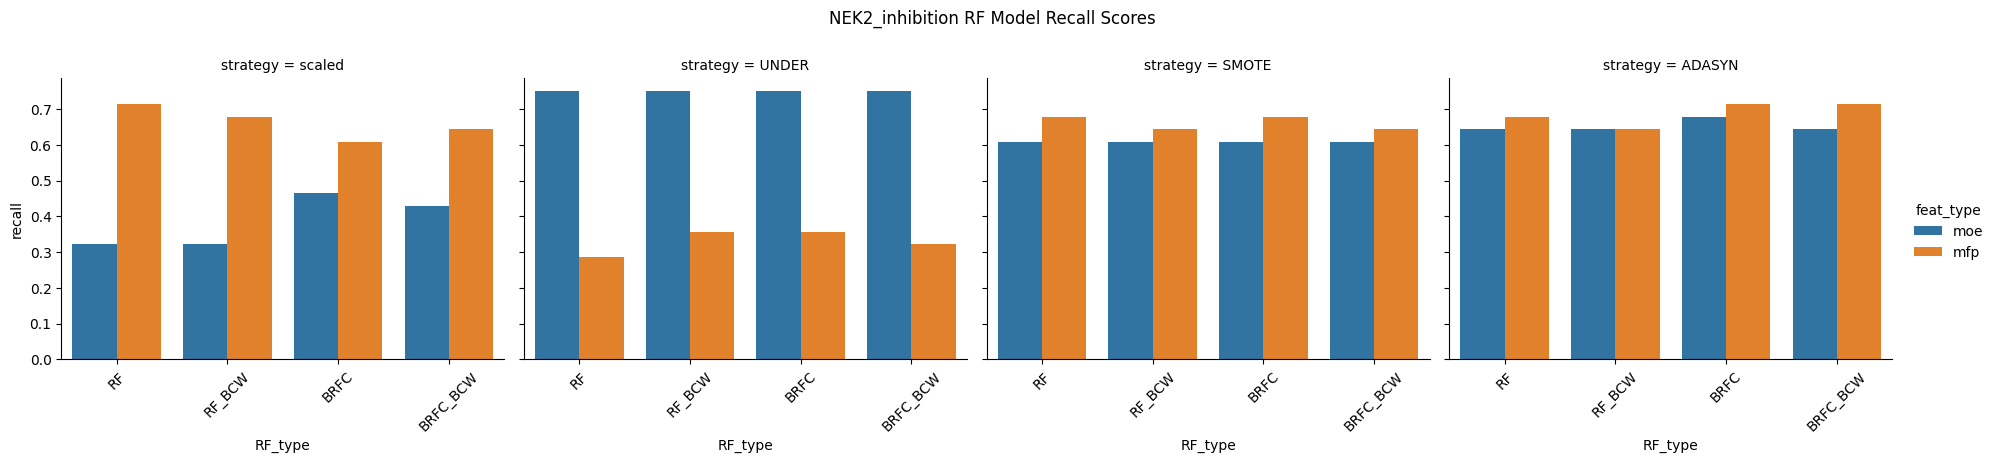

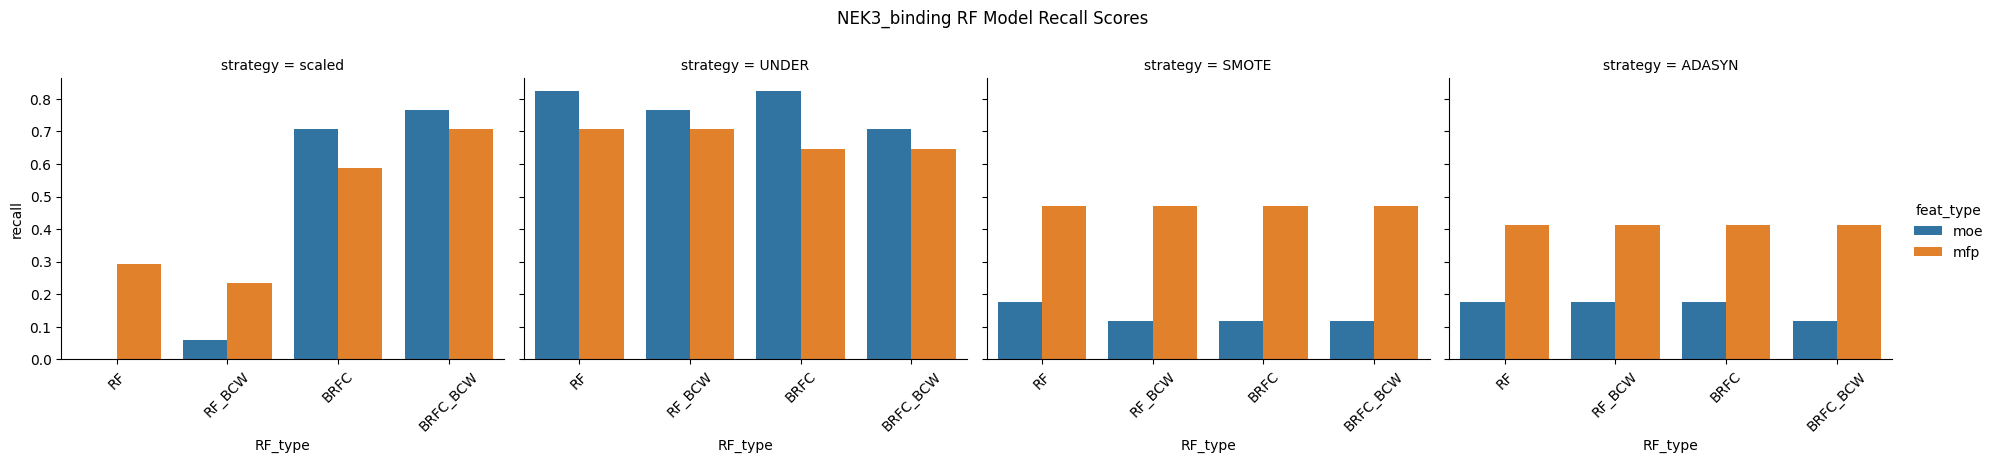

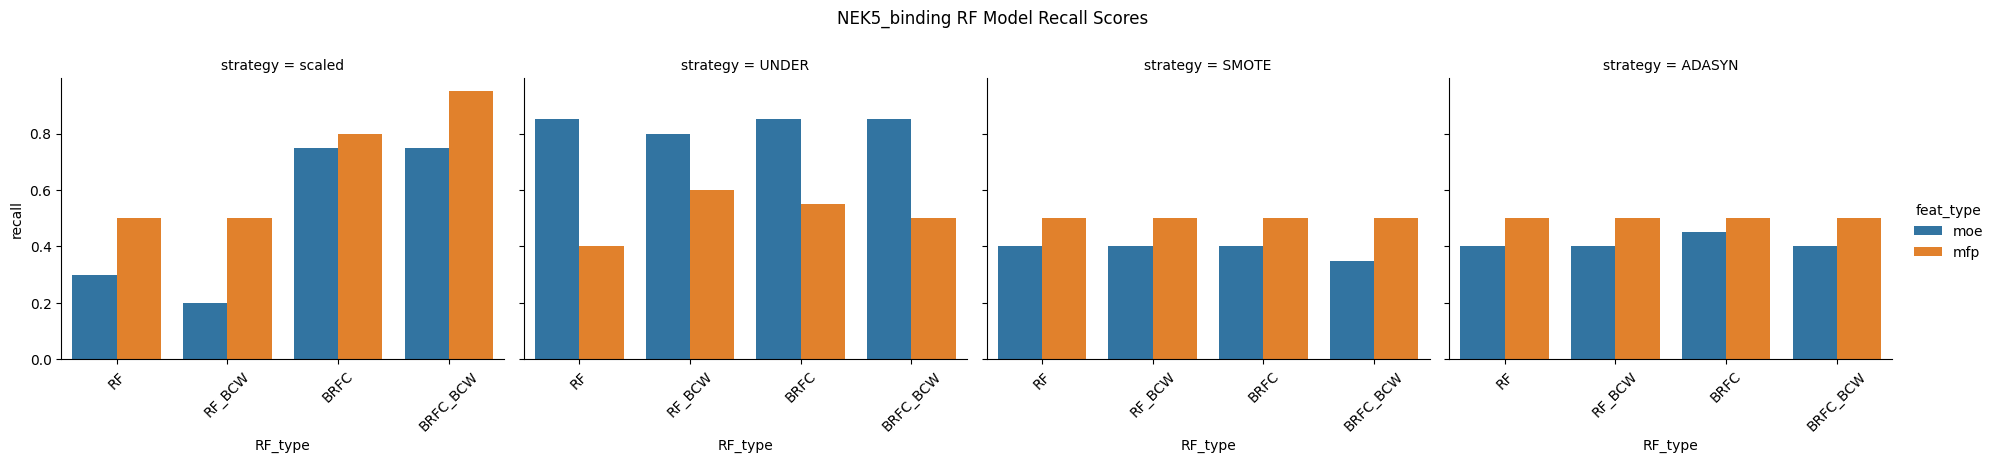

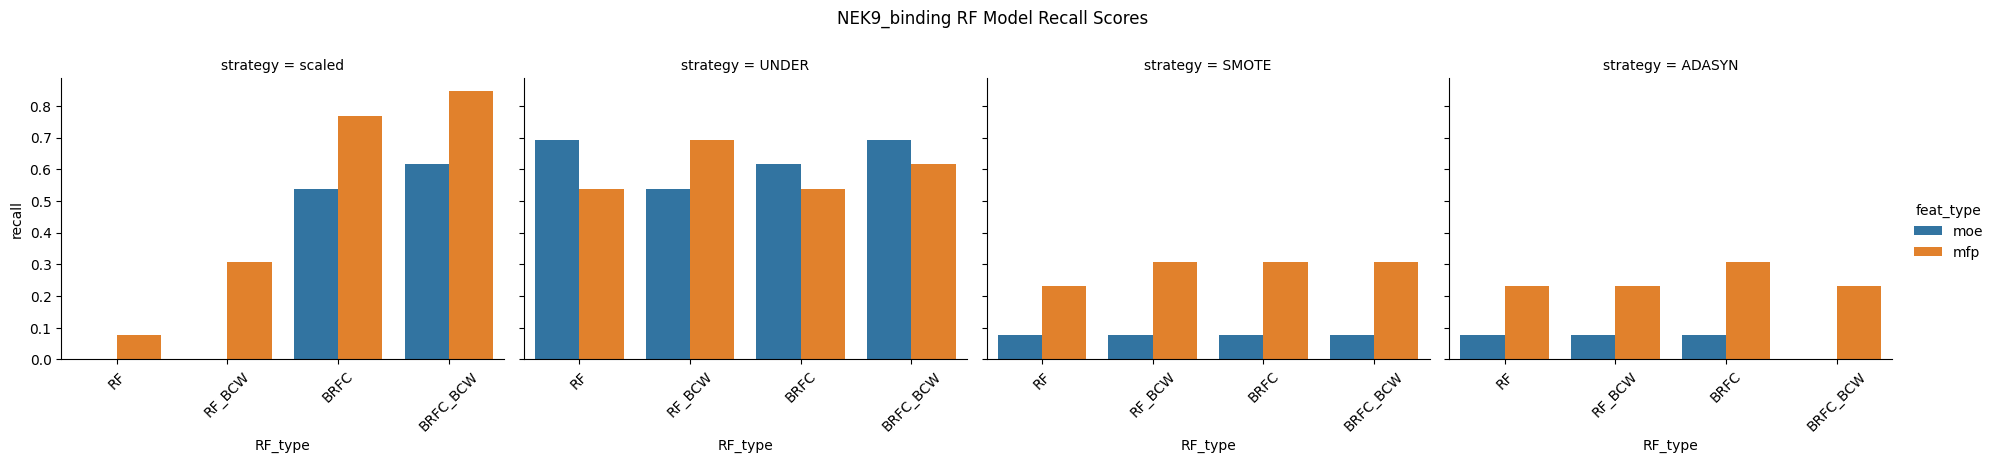

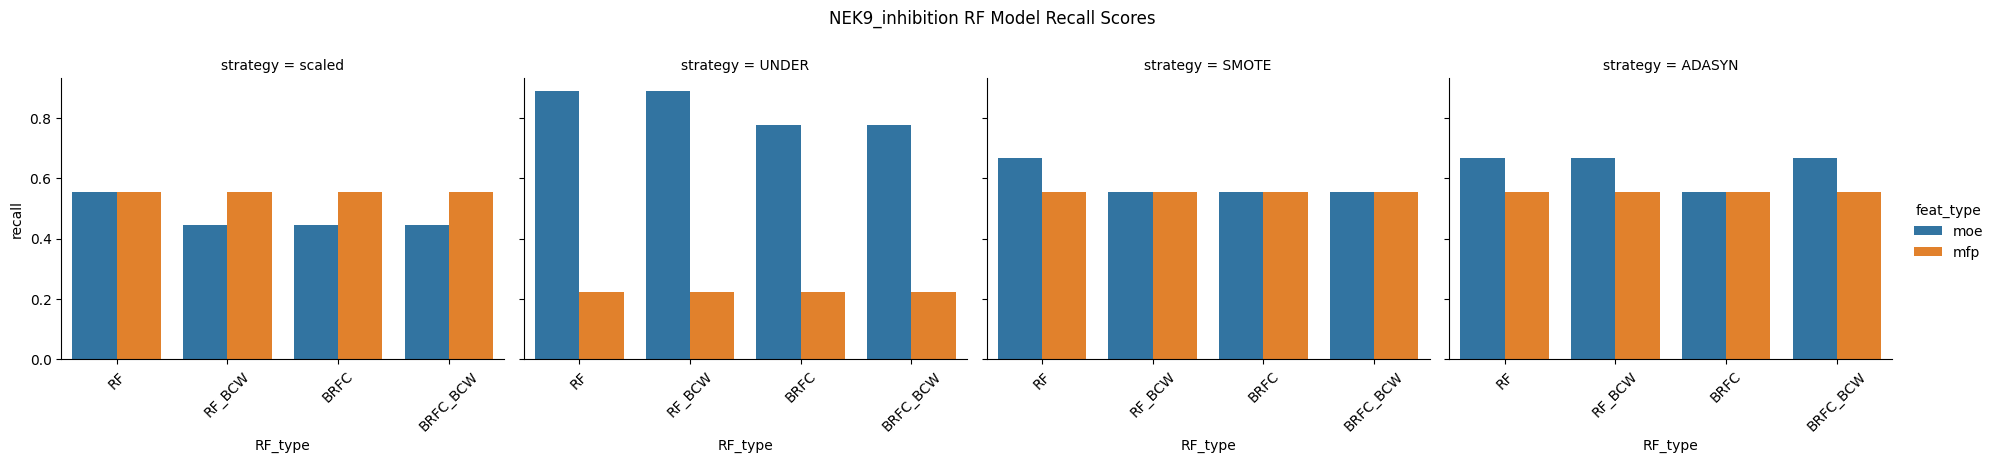

In [144]:
for n, nek in enumerate(neks): 
    nek_df = df_all[df_all['NEK'] ==nek]
    g5 = sns.catplot(data=nek_df, x='RF_type', y='recall', hue='feat_type', col='strategy', kind='bar', height=4, aspect=1.2)
    g5.fig.suptitle(f'{nek} RF Model Recall Scores', y=1.02)
    for ax in g5.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)

    g5.fig.subplots_adjust(top=0.85)
    
    plt.show();
    g5.savefig(f"figures/RF_plots/{nek}_RF_subplot_by_strategy.png", bbox_inches='tight')
    

In [ ]:
# Sort by modeling type
# 1. sort by 'feat_type' and make the strategies next to each other to compare RF_type (moe_ADASYN, mfp_ADASYN x4 each for 4x RF types) 
# moe_SMOTE_RF, moe_SMOTE_RF_BCW, moe_SMOTE_
# 2. sort by 'strategy' and make the feat

In [278]:
short_df_cols = [ 'NEK',  'feat_type', 'strategy', 'RF_type',  'precision', 'recall','cm', 'dataset_category']
strategies = ['scaled', 'UNDER', 'SMOTE', 'ADASYN']
feat_types = ['moe', 'mfp']
rf_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']
for nek in neks: 
    print(nek)
    # nek_df = df_all[df_all['NEK']==nek] 
    # nek_df = df_all.loc[df_all['NEK'] == nek, short_df_cols]
    # nek_pivot  = nek_df.pivot(index='dataset_category', columns ='RF_type', values='recall')
    # display(nek_pivot)
    
    # sorted = nek_df.sort_values('feat_type')
    # display(sorted)
    # print()

NEK2_binding
NEK2_inhibition
NEK3_binding
NEK5_binding
NEK9_binding
NEK9_inhibition


# feat_type, strategy, RF_type 


In [288]:
short_df_cols = [ 'NEK',  'feat_type', 'strategy', 'RF_type',  'precision', 'recall','cm', 'dataset_category']
strategies = ['scaled', 'UNDER', 'SMOTE', 'ADASYN']
feat_types = ['moe', 'mfp']
rf_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']
for nek in neks: 
    nek_df = df_all.loc[df_all['NEK'] == nek, short_df_cols]
    for strat in strategies: 
        print(f'{nek} {strat}')
        strategy_df = nek_df.loc[nek_df['strategy'] == strat, short_df_cols]
        display(strategy_df) 
        ordered_strat_df = strategy_df.sort_values('RF_type')
        display(ordered_strat_df)
        print(f'feat type and rf type for best recall for {nek} {strat} \n {strategy_df.loc[strategy_df["recall"].idxmax(), ["feat_type", "RF_type"]]}')

    print()

NEK2_binding scaled


NEK feat_type strategy   RF_type  precision    recall  \
0   NEK2_binding       moe   scaled        RF   0.133333  0.166667   
1   NEK2_binding       moe   scaled    RF_BCW   0.142857  0.083333   
2   NEK2_binding       moe   scaled      BRFC   0.078947  0.500000   
3   NEK2_binding       moe   scaled  BRFC_BCW   0.091954  0.666667   
16  NEK2_binding       mfp   scaled        RF   0.333333  0.250000   
17  NEK2_binding       mfp   scaled    RF_BCW   0.333333  0.500000   
18  NEK2_binding       mfp   scaled      BRFC   0.148148  0.666667   
19  NEK2_binding       mfp   scaled  BRFC_BCW   0.076433  1.000000   

                   cm dataset_category  
0    [258, 13, 10, 2]       moe_scaled  
1     [265, 6, 11, 1]       moe_scaled  
2     [201, 70, 6, 6]       moe_scaled  
3     [192, 79, 4, 8]       moe_scaled  
16     [265, 6, 9, 3]       mfp_scaled  
17    [259, 12, 6, 6]       mfp_scaled  
18    [225, 46, 4, 8]       mfp_scaled  
19  [126, 145, 0, 12]       mfp_scaled

NEK feat_type strategy   RF_type  precision    recall  \
2   NEK2_binding       moe   scaled      BRFC   0.078947  0.500000   
18  NEK2_binding       mfp   scaled      BRFC   0.148148  0.666667   
3   NEK2_binding       moe   scaled  BRFC_BCW   0.091954  0.666667   
19  NEK2_binding       mfp   scaled  BRFC_BCW   0.076433  1.000000   
0   NEK2_binding       moe   scaled        RF   0.133333  0.166667   
16  NEK2_binding       mfp   scaled        RF   0.333333  0.250000   
1   NEK2_binding       moe   scaled    RF_BCW   0.142857  0.083333   
17  NEK2_binding       mfp   scaled    RF_BCW   0.333333  0.500000   

                   cm dataset_category  
2     [201, 70, 6, 6]       moe_scaled  
18    [225, 46, 4, 8]       mfp_scaled  
3     [192, 79, 4, 8]       moe_scaled  
19  [126, 145, 0, 12]       mfp_scaled  
0    [258, 13, 10, 2]       moe_scaled  
16     [265, 6, 9, 3]       mfp_scaled  
1     [265, 6, 11, 1]       moe_scaled  
17    [259, 12, 6, 6]       mfp_scaled

feat type and rf type for best recall for NEK2_binding scaled 
 feat_type         mfp
RF_type      BRFC_BCW
Name: 19, dtype: object
NEK2_binding UNDER


NEK feat_type strategy   RF_type  precision    recall  \
4   NEK2_binding       moe    UNDER        RF   0.069231  0.750000   
5   NEK2_binding       moe    UNDER    RF_BCW   0.054945  0.416667   
6   NEK2_binding       moe    UNDER      BRFC   0.068182  0.750000   
7   NEK2_binding       moe    UNDER  BRFC_BCW   0.058824  0.500000   
20  NEK2_binding       mfp    UNDER        RF   0.054545  0.500000   
21  NEK2_binding       mfp    UNDER    RF_BCW   0.052174  0.500000   
22  NEK2_binding       mfp    UNDER      BRFC   0.052174  0.500000   
23  NEK2_binding       mfp    UNDER  BRFC_BCW   0.055046  0.500000   

                  cm dataset_category  
4   [150, 121, 3, 9]        moe_UNDER  
5    [185, 86, 7, 5]        moe_UNDER  
6   [148, 123, 3, 9]        moe_UNDER  
7    [175, 96, 6, 6]        moe_UNDER  
20  [167, 104, 6, 6]        mfp_UNDER  
21  [162, 109, 6, 6]        mfp_UNDER  
22  [162, 109, 6, 6]        mfp_UNDER  
23  [168, 103, 6, 6]        mfp_UNDER

NEK feat_type strategy   RF_type  precision    recall  \
6   NEK2_binding       moe    UNDER      BRFC   0.068182  0.750000   
22  NEK2_binding       mfp    UNDER      BRFC   0.052174  0.500000   
7   NEK2_binding       moe    UNDER  BRFC_BCW   0.058824  0.500000   
23  NEK2_binding       mfp    UNDER  BRFC_BCW   0.055046  0.500000   
4   NEK2_binding       moe    UNDER        RF   0.069231  0.750000   
20  NEK2_binding       mfp    UNDER        RF   0.054545  0.500000   
5   NEK2_binding       moe    UNDER    RF_BCW   0.054945  0.416667   
21  NEK2_binding       mfp    UNDER    RF_BCW   0.052174  0.500000   

                  cm dataset_category  
6   [148, 123, 3, 9]        moe_UNDER  
22  [162, 109, 6, 6]        mfp_UNDER  
7    [175, 96, 6, 6]        moe_UNDER  
23  [168, 103, 6, 6]        mfp_UNDER  
4   [150, 121, 3, 9]        moe_UNDER  
20  [167, 104, 6, 6]        mfp_UNDER  
5    [185, 86, 7, 5]        moe_UNDER  
21  [162, 109, 6, 6]        mfp_UNDER

feat type and rf type for best recall for NEK2_binding UNDER 
 feat_type    moe
RF_type       RF
Name: 4, dtype: object
NEK2_binding SMOTE


NEK feat_type strategy   RF_type  precision    recall  \
8   NEK2_binding       moe    SMOTE        RF   0.300000  0.250000   
9   NEK2_binding       moe    SMOTE    RF_BCW   0.333333  0.250000   
10  NEK2_binding       moe    SMOTE      BRFC   0.300000  0.250000   
11  NEK2_binding       moe    SMOTE  BRFC_BCW   0.272727  0.250000   
24  NEK2_binding       mfp    SMOTE        RF   0.235294  0.333333   
25  NEK2_binding       mfp    SMOTE    RF_BCW   0.235294  0.333333   
26  NEK2_binding       mfp    SMOTE      BRFC   0.235294  0.333333   
27  NEK2_binding       mfp    SMOTE  BRFC_BCW   0.235294  0.333333   

                 cm dataset_category  
8    [264, 7, 9, 3]        moe_SMOTE  
9    [265, 6, 9, 3]        moe_SMOTE  
10   [264, 7, 9, 3]        moe_SMOTE  
11   [263, 8, 9, 3]        moe_SMOTE  
24  [258, 13, 8, 4]        mfp_SMOTE  
25  [258, 13, 8, 4]        mfp_SMOTE  
26  [258, 13, 8, 4]        mfp_SMOTE  
27  [258, 13, 8, 4]        mfp_SMOTE

NEK feat_type strategy   RF_type  precision    recall  \
10  NEK2_binding       moe    SMOTE      BRFC   0.300000  0.250000   
26  NEK2_binding       mfp    SMOTE      BRFC   0.235294  0.333333   
11  NEK2_binding       moe    SMOTE  BRFC_BCW   0.272727  0.250000   
27  NEK2_binding       mfp    SMOTE  BRFC_BCW   0.235294  0.333333   
8   NEK2_binding       moe    SMOTE        RF   0.300000  0.250000   
24  NEK2_binding       mfp    SMOTE        RF   0.235294  0.333333   
9   NEK2_binding       moe    SMOTE    RF_BCW   0.333333  0.250000   
25  NEK2_binding       mfp    SMOTE    RF_BCW   0.235294  0.333333   

                 cm dataset_category  
10   [264, 7, 9, 3]        moe_SMOTE  
26  [258, 13, 8, 4]        mfp_SMOTE  
11   [263, 8, 9, 3]        moe_SMOTE  
27  [258, 13, 8, 4]        mfp_SMOTE  
8    [264, 7, 9, 3]        moe_SMOTE  
24  [258, 13, 8, 4]        mfp_SMOTE  
9    [265, 6, 9, 3]        moe_SMOTE  
25  [258, 13, 8, 4]        mfp_SMOTE

feat type and rf type for best recall for NEK2_binding SMOTE 
 feat_type    mfp
RF_type       RF
Name: 24, dtype: object
NEK2_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
12  NEK2_binding       moe   ADASYN        RF   0.125000  0.166667   
13  NEK2_binding       moe   ADASYN    RF_BCW   0.157895  0.250000   
14  NEK2_binding       moe   ADASYN      BRFC   0.133333  0.166667   
15  NEK2_binding       moe   ADASYN  BRFC_BCW   0.166667  0.250000   
28  NEK2_binding       mfp   ADASYN        RF   0.312500  0.416667   
29  NEK2_binding       mfp   ADASYN    RF_BCW   0.333333  0.416667   
30  NEK2_binding       mfp   ADASYN      BRFC   0.312500  0.416667   
31  NEK2_binding       mfp   ADASYN  BRFC_BCW   0.333333  0.416667   

                  cm dataset_category  
12  [257, 14, 10, 2]       moe_ADASYN  
13   [255, 16, 9, 3]       moe_ADASYN  
14  [258, 13, 10, 2]       moe_ADASYN  
15   [256, 15, 9, 3]       moe_ADASYN  
28   [260, 11, 7, 5]       mfp_ADASYN  
29   [261, 10, 7, 5]       mfp_ADASYN  
30   [260, 11, 7, 5]       mfp_ADASYN  
31   [261, 10, 7, 5]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
14  NEK2_binding       moe   ADASYN      BRFC   0.133333  0.166667   
30  NEK2_binding       mfp   ADASYN      BRFC   0.312500  0.416667   
15  NEK2_binding       moe   ADASYN  BRFC_BCW   0.166667  0.250000   
31  NEK2_binding       mfp   ADASYN  BRFC_BCW   0.333333  0.416667   
12  NEK2_binding       moe   ADASYN        RF   0.125000  0.166667   
28  NEK2_binding       mfp   ADASYN        RF   0.312500  0.416667   
13  NEK2_binding       moe   ADASYN    RF_BCW   0.157895  0.250000   
29  NEK2_binding       mfp   ADASYN    RF_BCW   0.333333  0.416667   

                  cm dataset_category  
14  [258, 13, 10, 2]       moe_ADASYN  
30   [260, 11, 7, 5]       mfp_ADASYN  
15   [256, 15, 9, 3]       moe_ADASYN  
31   [261, 10, 7, 5]       mfp_ADASYN  
12  [257, 14, 10, 2]       moe_ADASYN  
28   [260, 11, 7, 5]       mfp_ADASYN  
13   [255, 16, 9, 3]       moe_ADASYN  
29   [261, 10, 7, 5]       mfp_ADASYN

feat type and rf type for best recall for NEK2_binding ADASYN 
 feat_type    mfp
RF_type       RF
Name: 28, dtype: object

NEK2_inhibition scaled


NEK feat_type strategy   RF_type  precision    recall  \
32  NEK2_inhibition       moe   scaled        RF   0.583333  0.500000   
33  NEK2_inhibition       moe   scaled    RF_BCW   0.636364  0.500000   
34  NEK2_inhibition       moe   scaled      BRFC   0.608696  0.500000   
35  NEK2_inhibition       moe   scaled  BRFC_BCW   0.600000  0.535714   
48  NEK2_inhibition       mfp   scaled        RF   0.720000  0.642857   
49  NEK2_inhibition       mfp   scaled    RF_BCW   0.720000  0.642857   
50  NEK2_inhibition       mfp   scaled      BRFC   0.772727  0.607143   
51  NEK2_inhibition       mfp   scaled  BRFC_BCW   0.739130  0.607143   

                   cm dataset_category  
32  [371, 10, 14, 14]       moe_scaled  
33   [373, 8, 14, 14]       moe_scaled  
34   [372, 9, 14, 14]       moe_scaled  
35  [371, 10, 13, 15]       moe_scaled  
48   [374, 7, 10, 18]       mfp_scaled  
49   [374, 7, 10, 18]       mfp_scaled  
50   [376, 5, 11, 17]       mfp_scaled  
51   [375, 6, 11, 17]       mfp_scaled

NEK feat_type strategy   RF_type  precision    recall  \
34  NEK2_inhibition       moe   scaled      BRFC   0.608696  0.500000   
50  NEK2_inhibition       mfp   scaled      BRFC   0.772727  0.607143   
35  NEK2_inhibition       moe   scaled  BRFC_BCW   0.600000  0.535714   
51  NEK2_inhibition       mfp   scaled  BRFC_BCW   0.739130  0.607143   
32  NEK2_inhibition       moe   scaled        RF   0.583333  0.500000   
48  NEK2_inhibition       mfp   scaled        RF   0.720000  0.642857   
33  NEK2_inhibition       moe   scaled    RF_BCW   0.636364  0.500000   
49  NEK2_inhibition       mfp   scaled    RF_BCW   0.720000  0.642857   

                   cm dataset_category  
34   [372, 9, 14, 14]       moe_scaled  
50   [376, 5, 11, 17]       mfp_scaled  
35  [371, 10, 13, 15]       moe_scaled  
51   [375, 6, 11, 17]       mfp_scaled  
32  [371, 10, 14, 14]       moe_scaled  
48   [374, 7, 10, 18]       mfp_scaled  
33   [373, 8, 14, 14]       moe_scaled  
49   [374, 7, 10, 18]       mfp_scaled

feat type and rf type for best recall for NEK2_inhibition scaled 
 feat_type    mfp
RF_type       RF
Name: 48, dtype: object
NEK2_inhibition UNDER


NEK feat_type strategy   RF_type  precision  recall  \
36  NEK2_inhibition       moe    UNDER        RF   0.182609    0.75   
37  NEK2_inhibition       moe    UNDER    RF_BCW   0.182609    0.75   
38  NEK2_inhibition       moe    UNDER      BRFC   0.189189    0.75   
39  NEK2_inhibition       moe    UNDER  BRFC_BCW   0.185841    0.75   
52  NEK2_inhibition       mfp    UNDER        RF   0.061947    0.50   
53  NEK2_inhibition       mfp    UNDER    RF_BCW   0.062222    0.50   
54  NEK2_inhibition       mfp    UNDER      BRFC   0.062500    0.50   
55  NEK2_inhibition       mfp    UNDER  BRFC_BCW   0.062222    0.50   

                    cm dataset_category  
36    [287, 94, 7, 21]        moe_UNDER  
37    [287, 94, 7, 21]        moe_UNDER  
38    [291, 90, 7, 21]        moe_UNDER  
39    [289, 92, 7, 21]        moe_UNDER  
52  [169, 212, 14, 14]        mfp_UNDER  
53  [170, 211, 14, 14]        mfp_UNDER  
54  [171, 210, 14, 14]        mfp_UNDER  
55  [170, 211, 14, 14]        mfp_UNDER

NEK feat_type strategy   RF_type  precision  recall  \
38  NEK2_inhibition       moe    UNDER      BRFC   0.189189    0.75   
54  NEK2_inhibition       mfp    UNDER      BRFC   0.062500    0.50   
39  NEK2_inhibition       moe    UNDER  BRFC_BCW   0.185841    0.75   
55  NEK2_inhibition       mfp    UNDER  BRFC_BCW   0.062222    0.50   
36  NEK2_inhibition       moe    UNDER        RF   0.182609    0.75   
52  NEK2_inhibition       mfp    UNDER        RF   0.061947    0.50   
37  NEK2_inhibition       moe    UNDER    RF_BCW   0.182609    0.75   
53  NEK2_inhibition       mfp    UNDER    RF_BCW   0.062222    0.50   

                    cm dataset_category  
38    [291, 90, 7, 21]        moe_UNDER  
54  [171, 210, 14, 14]        mfp_UNDER  
39    [289, 92, 7, 21]        moe_UNDER  
55  [170, 211, 14, 14]        mfp_UNDER  
36    [287, 94, 7, 21]        moe_UNDER  
52  [169, 212, 14, 14]        mfp_UNDER  
37    [287, 94, 7, 21]        moe_UNDER  
53  [170, 211, 14, 14]        mfp_UNDER

feat type and rf type for best recall for NEK2_inhibition UNDER 
 feat_type    moe
RF_type       RF
Name: 36, dtype: object
NEK2_inhibition SMOTE


NEK feat_type strategy   RF_type  precision    recall  \
40  NEK2_inhibition       moe    SMOTE        RF   0.529412  0.642857   
41  NEK2_inhibition       moe    SMOTE    RF_BCW   0.529412  0.642857   
42  NEK2_inhibition       moe    SMOTE      BRFC   0.531250  0.607143   
43  NEK2_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.607143   
56  NEK2_inhibition       mfp    SMOTE        RF   0.695652  0.571429   
57  NEK2_inhibition       mfp    SMOTE    RF_BCW   0.720000  0.642857   
58  NEK2_inhibition       mfp    SMOTE      BRFC   0.720000  0.642857   
59  NEK2_inhibition       mfp    SMOTE  BRFC_BCW   0.695652  0.571429   

                   cm dataset_category  
40  [365, 16, 10, 18]        moe_SMOTE  
41  [365, 16, 10, 18]        moe_SMOTE  
42  [366, 15, 11, 17]        moe_SMOTE  
43  [364, 17, 11, 17]        moe_SMOTE  
56   [374, 7, 12, 16]        mfp_SMOTE  
57   [374, 7, 10, 18]        mfp_SMOTE  
58   [374, 7, 10, 18]        mfp_SMOTE  
59   [374, 7, 12, 16]        mfp_SMOTE

NEK feat_type strategy   RF_type  precision    recall  \
42  NEK2_inhibition       moe    SMOTE      BRFC   0.531250  0.607143   
58  NEK2_inhibition       mfp    SMOTE      BRFC   0.720000  0.642857   
43  NEK2_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.607143   
59  NEK2_inhibition       mfp    SMOTE  BRFC_BCW   0.695652  0.571429   
40  NEK2_inhibition       moe    SMOTE        RF   0.529412  0.642857   
56  NEK2_inhibition       mfp    SMOTE        RF   0.695652  0.571429   
41  NEK2_inhibition       moe    SMOTE    RF_BCW   0.529412  0.642857   
57  NEK2_inhibition       mfp    SMOTE    RF_BCW   0.720000  0.642857   

                   cm dataset_category  
42  [366, 15, 11, 17]        moe_SMOTE  
58   [374, 7, 10, 18]        mfp_SMOTE  
43  [364, 17, 11, 17]        moe_SMOTE  
59   [374, 7, 12, 16]        mfp_SMOTE  
40  [365, 16, 10, 18]        moe_SMOTE  
56   [374, 7, 12, 16]        mfp_SMOTE  
41  [365, 16, 10, 18]        moe_SMOTE  
57   [374, 7, 10, 18]        mfp_SMOTE

feat type and rf type for best recall for NEK2_inhibition SMOTE 
 feat_type    moe
RF_type       RF
Name: 40, dtype: object
NEK2_inhibition ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
44  NEK2_inhibition       moe   ADASYN        RF   0.414634  0.607143   
45  NEK2_inhibition       moe   ADASYN    RF_BCW   0.395349  0.607143   
46  NEK2_inhibition       moe   ADASYN      BRFC   0.400000  0.571429   
47  NEK2_inhibition       moe   ADASYN  BRFC_BCW   0.414634  0.607143   
60  NEK2_inhibition       mfp   ADASYN        RF   0.588235  0.714286   
61  NEK2_inhibition       mfp   ADASYN    RF_BCW   0.612903  0.678571   
62  NEK2_inhibition       mfp   ADASYN      BRFC   0.606061  0.714286   
63  NEK2_inhibition       mfp   ADASYN  BRFC_BCW   0.593750  0.678571   

                   cm dataset_category  
44  [357, 24, 11, 17]       moe_ADASYN  
45  [355, 26, 11, 17]       moe_ADASYN  
46  [357, 24, 12, 16]       moe_ADASYN  
47  [357, 24, 11, 17]       moe_ADASYN  
60   [367, 14, 8, 20]       mfp_ADASYN  
61   [369, 12, 9, 19]       mfp_ADASYN  
62   [368, 13, 8, 20]       mfp_ADASYN  
63   [368, 13, 9, 19]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
46  NEK2_inhibition       moe   ADASYN      BRFC   0.400000  0.571429   
62  NEK2_inhibition       mfp   ADASYN      BRFC   0.606061  0.714286   
47  NEK2_inhibition       moe   ADASYN  BRFC_BCW   0.414634  0.607143   
63  NEK2_inhibition       mfp   ADASYN  BRFC_BCW   0.593750  0.678571   
44  NEK2_inhibition       moe   ADASYN        RF   0.414634  0.607143   
60  NEK2_inhibition       mfp   ADASYN        RF   0.588235  0.714286   
45  NEK2_inhibition       moe   ADASYN    RF_BCW   0.395349  0.607143   
61  NEK2_inhibition       mfp   ADASYN    RF_BCW   0.612903  0.678571   

                   cm dataset_category  
46  [357, 24, 12, 16]       moe_ADASYN  
62   [368, 13, 8, 20]       mfp_ADASYN  
47  [357, 24, 11, 17]       moe_ADASYN  
63   [368, 13, 9, 19]       mfp_ADASYN  
44  [357, 24, 11, 17]       moe_ADASYN  
60   [367, 14, 8, 20]       mfp_ADASYN  
45  [355, 26, 11, 17]       moe_ADASYN  
61   [369, 12, 9, 19]       mfp_ADASYN

feat type and rf type for best recall for NEK2_inhibition ADASYN 
 feat_type    mfp
RF_type       RF
Name: 60, dtype: object

NEK3_binding scaled


NEK feat_type strategy   RF_type  precision    recall  \
64  NEK3_binding       moe   scaled        RF   0.200000  0.117647   
65  NEK3_binding       moe   scaled    RF_BCW   0.250000  0.117647   
66  NEK3_binding       moe   scaled      BRFC   0.113208  0.705882   
67  NEK3_binding       moe   scaled  BRFC_BCW   0.114754  0.823529   
80  NEK3_binding       mfp   scaled        RF   0.304348  0.411765   
81  NEK3_binding       mfp   scaled    RF_BCW   0.294118  0.294118   
82  NEK3_binding       mfp   scaled      BRFC   0.126761  0.529412   
83  NEK3_binding       mfp   scaled  BRFC_BCW   0.087379  0.529412   

                   cm dataset_category  
64    [257, 8, 15, 2]       moe_scaled  
65    [259, 6, 15, 2]       moe_scaled  
66   [171, 94, 5, 12]       moe_scaled  
67  [157, 108, 3, 14]       moe_scaled  
80   [249, 16, 10, 7]       mfp_scaled  
81   [253, 12, 12, 5]       mfp_scaled  
82    [203, 62, 8, 9]       mfp_scaled  
83    [171, 94, 8, 9]       mfp_scaled

NEK feat_type strategy   RF_type  precision    recall  \
66  NEK3_binding       moe   scaled      BRFC   0.113208  0.705882   
82  NEK3_binding       mfp   scaled      BRFC   0.126761  0.529412   
67  NEK3_binding       moe   scaled  BRFC_BCW   0.114754  0.823529   
83  NEK3_binding       mfp   scaled  BRFC_BCW   0.087379  0.529412   
64  NEK3_binding       moe   scaled        RF   0.200000  0.117647   
80  NEK3_binding       mfp   scaled        RF   0.304348  0.411765   
65  NEK3_binding       moe   scaled    RF_BCW   0.250000  0.117647   
81  NEK3_binding       mfp   scaled    RF_BCW   0.294118  0.294118   

                   cm dataset_category  
66   [171, 94, 5, 12]       moe_scaled  
82    [203, 62, 8, 9]       mfp_scaled  
67  [157, 108, 3, 14]       moe_scaled  
83    [171, 94, 8, 9]       mfp_scaled  
64    [257, 8, 15, 2]       moe_scaled  
80   [249, 16, 10, 7]       mfp_scaled  
65    [259, 6, 15, 2]       moe_scaled  
81   [253, 12, 12, 5]       mfp_scaled

feat type and rf type for best recall for NEK3_binding scaled 
 feat_type         moe
RF_type      BRFC_BCW
Name: 67, dtype: object
NEK3_binding UNDER


NEK feat_type strategy   RF_type  precision    recall  \
68  NEK3_binding       moe    UNDER        RF   0.083969  0.647059   
69  NEK3_binding       moe    UNDER    RF_BCW   0.086614  0.647059   
70  NEK3_binding       moe    UNDER      BRFC   0.086614  0.647059   
71  NEK3_binding       moe    UNDER  BRFC_BCW   0.087302  0.647059   
84  NEK3_binding       mfp    UNDER        RF   0.065693  0.529412   
85  NEK3_binding       mfp    UNDER    RF_BCW   0.064286  0.529412   
86  NEK3_binding       mfp    UNDER      BRFC   0.066176  0.529412   
87  NEK3_binding       mfp    UNDER  BRFC_BCW   0.065217  0.529412   

                   cm dataset_category  
68  [145, 120, 6, 11]        moe_UNDER  
69  [149, 116, 6, 11]        moe_UNDER  
70  [149, 116, 6, 11]        moe_UNDER  
71  [150, 115, 6, 11]        moe_UNDER  
84   [137, 128, 8, 9]        mfp_UNDER  
85   [134, 131, 8, 9]        mfp_UNDER  
86   [138, 127, 8, 9]        mfp_UNDER  
87   [136, 129, 8, 9]        mfp_UNDER

NEK feat_type strategy   RF_type  precision    recall  \
70  NEK3_binding       moe    UNDER      BRFC   0.086614  0.647059   
86  NEK3_binding       mfp    UNDER      BRFC   0.066176  0.529412   
71  NEK3_binding       moe    UNDER  BRFC_BCW   0.087302  0.647059   
87  NEK3_binding       mfp    UNDER  BRFC_BCW   0.065217  0.529412   
68  NEK3_binding       moe    UNDER        RF   0.083969  0.647059   
84  NEK3_binding       mfp    UNDER        RF   0.065693  0.529412   
69  NEK3_binding       moe    UNDER    RF_BCW   0.086614  0.647059   
85  NEK3_binding       mfp    UNDER    RF_BCW   0.064286  0.529412   

                   cm dataset_category  
70  [149, 116, 6, 11]        moe_UNDER  
86   [138, 127, 8, 9]        mfp_UNDER  
71  [150, 115, 6, 11]        moe_UNDER  
87   [136, 129, 8, 9]        mfp_UNDER  
68  [145, 120, 6, 11]        moe_UNDER  
84   [137, 128, 8, 9]        mfp_UNDER  
69  [149, 116, 6, 11]        moe_UNDER  
85   [134, 131, 8, 9]        mfp_UNDER

feat type and rf type for best recall for NEK3_binding UNDER 
 feat_type    moe
RF_type       RF
Name: 68, dtype: object
NEK3_binding SMOTE


NEK feat_type strategy   RF_type  precision    recall  \
72  NEK3_binding       moe    SMOTE        RF   0.142857  0.294118   
73  NEK3_binding       moe    SMOTE    RF_BCW   0.166667  0.352941   
74  NEK3_binding       moe    SMOTE      BRFC   0.142857  0.294118   
75  NEK3_binding       moe    SMOTE  BRFC_BCW   0.181818  0.352941   
88  NEK3_binding       mfp    SMOTE        RF   0.269231  0.411765   
89  NEK3_binding       mfp    SMOTE    RF_BCW   0.222222  0.352941   
90  NEK3_binding       mfp    SMOTE      BRFC   0.250000  0.411765   
91  NEK3_binding       mfp    SMOTE  BRFC_BCW   0.291667  0.411765   

                  cm dataset_category  
72  [235, 30, 12, 5]        moe_SMOTE  
73  [235, 30, 11, 6]        moe_SMOTE  
74  [235, 30, 12, 5]        moe_SMOTE  
75  [238, 27, 11, 6]        moe_SMOTE  
88  [246, 19, 10, 7]        mfp_SMOTE  
89  [244, 21, 11, 6]        mfp_SMOTE  
90  [244, 21, 10, 7]        mfp_SMOTE  
91  [248, 17, 10, 7]        mfp_SMOTE

NEK feat_type strategy   RF_type  precision    recall  \
74  NEK3_binding       moe    SMOTE      BRFC   0.142857  0.294118   
90  NEK3_binding       mfp    SMOTE      BRFC   0.250000  0.411765   
75  NEK3_binding       moe    SMOTE  BRFC_BCW   0.181818  0.352941   
91  NEK3_binding       mfp    SMOTE  BRFC_BCW   0.291667  0.411765   
72  NEK3_binding       moe    SMOTE        RF   0.142857  0.294118   
88  NEK3_binding       mfp    SMOTE        RF   0.269231  0.411765   
73  NEK3_binding       moe    SMOTE    RF_BCW   0.166667  0.352941   
89  NEK3_binding       mfp    SMOTE    RF_BCW   0.222222  0.352941   

                  cm dataset_category  
74  [235, 30, 12, 5]        moe_SMOTE  
90  [244, 21, 10, 7]        mfp_SMOTE  
75  [238, 27, 11, 6]        moe_SMOTE  
91  [248, 17, 10, 7]        mfp_SMOTE  
72  [235, 30, 12, 5]        moe_SMOTE  
88  [246, 19, 10, 7]        mfp_SMOTE  
73  [235, 30, 11, 6]        moe_SMOTE  
89  [244, 21, 11, 6]        mfp_SMOTE

feat type and rf type for best recall for NEK3_binding SMOTE 
 feat_type    mfp
RF_type       RF
Name: 88, dtype: object
NEK3_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
76  NEK3_binding       moe   ADASYN        RF   0.128205  0.294118   
77  NEK3_binding       moe   ADASYN    RF_BCW   0.119048  0.294118   
78  NEK3_binding       moe   ADASYN      BRFC   0.105263  0.235294   
79  NEK3_binding       moe   ADASYN  BRFC_BCW   0.100000  0.235294   
92  NEK3_binding       mfp   ADASYN        RF   0.250000  0.411765   
93  NEK3_binding       mfp   ADASYN    RF_BCW   0.233333  0.411765   
94  NEK3_binding       mfp   ADASYN      BRFC   0.250000  0.411765   
95  NEK3_binding       mfp   ADASYN  BRFC_BCW   0.259259  0.411765   

                  cm dataset_category  
76  [231, 34, 12, 5]       moe_ADASYN  
77  [228, 37, 12, 5]       moe_ADASYN  
78  [231, 34, 13, 4]       moe_ADASYN  
79  [229, 36, 13, 4]       moe_ADASYN  
92  [244, 21, 10, 7]       mfp_ADASYN  
93  [242, 23, 10, 7]       mfp_ADASYN  
94  [244, 21, 10, 7]       mfp_ADASYN  
95  [245, 20, 10, 7]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
78  NEK3_binding       moe   ADASYN      BRFC   0.105263  0.235294   
94  NEK3_binding       mfp   ADASYN      BRFC   0.250000  0.411765   
79  NEK3_binding       moe   ADASYN  BRFC_BCW   0.100000  0.235294   
95  NEK3_binding       mfp   ADASYN  BRFC_BCW   0.259259  0.411765   
76  NEK3_binding       moe   ADASYN        RF   0.128205  0.294118   
92  NEK3_binding       mfp   ADASYN        RF   0.250000  0.411765   
77  NEK3_binding       moe   ADASYN    RF_BCW   0.119048  0.294118   
93  NEK3_binding       mfp   ADASYN    RF_BCW   0.233333  0.411765   

                  cm dataset_category  
78  [231, 34, 13, 4]       moe_ADASYN  
94  [244, 21, 10, 7]       mfp_ADASYN  
79  [229, 36, 13, 4]       moe_ADASYN  
95  [245, 20, 10, 7]       mfp_ADASYN  
76  [231, 34, 12, 5]       moe_ADASYN  
92  [244, 21, 10, 7]       mfp_ADASYN  
77  [228, 37, 12, 5]       moe_ADASYN  
93  [242, 23, 10, 7]       mfp_ADASYN

feat type and rf type for best recall for NEK3_binding ADASYN 
 feat_type    mfp
RF_type       RF
Name: 92, dtype: object

NEK5_binding scaled


NEK feat_type strategy   RF_type  precision  recall  \
96   NEK5_binding       moe   scaled        RF   0.428571    0.45   
97   NEK5_binding       moe   scaled    RF_BCW   0.388889    0.35   
98   NEK5_binding       moe   scaled      BRFC   0.238806    0.80   
99   NEK5_binding       moe   scaled  BRFC_BCW   0.134831    0.60   
112  NEK5_binding       mfp   scaled        RF   0.550000    0.55   
113  NEK5_binding       mfp   scaled    RF_BCW   0.562500    0.45   
114  NEK5_binding       mfp   scaled      BRFC   0.326087    0.75   
115  NEK5_binding       mfp   scaled  BRFC_BCW   0.202381    0.85   

                   cm dataset_category  
96   [216, 12, 11, 9]       moe_scaled  
97   [217, 11, 13, 7]       moe_scaled  
98   [177, 51, 4, 16]       moe_scaled  
99   [151, 77, 8, 12]       moe_scaled  
112   [219, 9, 9, 11]       mfp_scaled  
113   [221, 7, 11, 9]       mfp_scaled  
114  [197, 31, 5, 15]       mfp_scaled  
115  [161, 67, 3, 17]       mfp_scaled

NEK feat_type strategy   RF_type  precision  recall  \
98   NEK5_binding       moe   scaled      BRFC   0.238806    0.80   
114  NEK5_binding       mfp   scaled      BRFC   0.326087    0.75   
99   NEK5_binding       moe   scaled  BRFC_BCW   0.134831    0.60   
115  NEK5_binding       mfp   scaled  BRFC_BCW   0.202381    0.85   
96   NEK5_binding       moe   scaled        RF   0.428571    0.45   
112  NEK5_binding       mfp   scaled        RF   0.550000    0.55   
97   NEK5_binding       moe   scaled    RF_BCW   0.388889    0.35   
113  NEK5_binding       mfp   scaled    RF_BCW   0.562500    0.45   

                   cm dataset_category  
98   [177, 51, 4, 16]       moe_scaled  
114  [197, 31, 5, 15]       mfp_scaled  
99   [151, 77, 8, 12]       moe_scaled  
115  [161, 67, 3, 17]       mfp_scaled  
96   [216, 12, 11, 9]       moe_scaled  
112   [219, 9, 9, 11]       mfp_scaled  
97   [217, 11, 13, 7]       moe_scaled  
113   [221, 7, 11, 9]       mfp_scaled

feat type and rf type for best recall for NEK5_binding scaled 
 feat_type         mfp
RF_type      BRFC_BCW
Name: 115, dtype: object
NEK5_binding UNDER


NEK feat_type strategy   RF_type  precision  recall  \
100  NEK5_binding       moe    UNDER        RF   0.141304    0.65   
101  NEK5_binding       moe    UNDER    RF_BCW   0.139785    0.65   
102  NEK5_binding       moe    UNDER      BRFC   0.138298    0.65   
103  NEK5_binding       moe    UNDER  BRFC_BCW   0.136842    0.65   
116  NEK5_binding       mfp    UNDER        RF   0.083333    0.55   
117  NEK5_binding       mfp    UNDER    RF_BCW   0.086614    0.55   
118  NEK5_binding       mfp    UNDER      BRFC   0.084615    0.55   
119  NEK5_binding       mfp    UNDER  BRFC_BCW   0.082707    0.55   

                    cm dataset_category  
100   [149, 79, 7, 13]        moe_UNDER  
101   [148, 80, 7, 13]        moe_UNDER  
102   [147, 81, 7, 13]        moe_UNDER  
103   [146, 82, 7, 13]        moe_UNDER  
116  [107, 121, 9, 11]        mfp_UNDER  
117  [112, 116, 9, 11]        mfp_UNDER  
118  [109, 119, 9, 11]        mfp_UNDER  
119  [106, 122, 9, 11]        mfp_UNDER

NEK feat_type strategy   RF_type  precision  recall  \
102  NEK5_binding       moe    UNDER      BRFC   0.138298    0.65   
118  NEK5_binding       mfp    UNDER      BRFC   0.084615    0.55   
103  NEK5_binding       moe    UNDER  BRFC_BCW   0.136842    0.65   
119  NEK5_binding       mfp    UNDER  BRFC_BCW   0.082707    0.55   
100  NEK5_binding       moe    UNDER        RF   0.141304    0.65   
116  NEK5_binding       mfp    UNDER        RF   0.083333    0.55   
101  NEK5_binding       moe    UNDER    RF_BCW   0.139785    0.65   
117  NEK5_binding       mfp    UNDER    RF_BCW   0.086614    0.55   

                    cm dataset_category  
102   [147, 81, 7, 13]        moe_UNDER  
118  [109, 119, 9, 11]        mfp_UNDER  
103   [146, 82, 7, 13]        moe_UNDER  
119  [106, 122, 9, 11]        mfp_UNDER  
100   [149, 79, 7, 13]        moe_UNDER  
116  [107, 121, 9, 11]        mfp_UNDER  
101   [148, 80, 7, 13]        moe_UNDER  
117  [112, 116, 9, 11]        mfp_UNDER

feat type and rf type for best recall for NEK5_binding UNDER 
 feat_type    moe
RF_type       RF
Name: 100, dtype: object
NEK5_binding SMOTE


NEK feat_type strategy   RF_type  precision  recall  \
104  NEK5_binding       moe    SMOTE        RF   0.500000     0.4   
105  NEK5_binding       moe    SMOTE    RF_BCW   0.444444     0.4   
106  NEK5_binding       moe    SMOTE      BRFC   0.500000     0.4   
107  NEK5_binding       moe    SMOTE  BRFC_BCW   0.470588     0.4   
120  NEK5_binding       mfp    SMOTE        RF   0.500000     0.5   
121  NEK5_binding       mfp    SMOTE    RF_BCW   0.500000     0.5   
122  NEK5_binding       mfp    SMOTE      BRFC   0.500000     0.5   
123  NEK5_binding       mfp    SMOTE  BRFC_BCW   0.526316     0.5   

                    cm dataset_category  
104    [220, 8, 12, 8]        moe_SMOTE  
105   [218, 10, 12, 8]        moe_SMOTE  
106    [220, 8, 12, 8]        moe_SMOTE  
107    [219, 9, 12, 8]        moe_SMOTE  
120  [218, 10, 10, 10]        mfp_SMOTE  
121  [218, 10, 10, 10]        mfp_SMOTE  
122  [218, 10, 10, 10]        mfp_SMOTE  
123   [219, 9, 10, 10]        mfp_SMOTE

NEK feat_type strategy   RF_type  precision  recall  \
106  NEK5_binding       moe    SMOTE      BRFC   0.500000     0.4   
122  NEK5_binding       mfp    SMOTE      BRFC   0.500000     0.5   
107  NEK5_binding       moe    SMOTE  BRFC_BCW   0.470588     0.4   
123  NEK5_binding       mfp    SMOTE  BRFC_BCW   0.526316     0.5   
104  NEK5_binding       moe    SMOTE        RF   0.500000     0.4   
120  NEK5_binding       mfp    SMOTE        RF   0.500000     0.5   
105  NEK5_binding       moe    SMOTE    RF_BCW   0.444444     0.4   
121  NEK5_binding       mfp    SMOTE    RF_BCW   0.500000     0.5   

                    cm dataset_category  
106    [220, 8, 12, 8]        moe_SMOTE  
122  [218, 10, 10, 10]        mfp_SMOTE  
107    [219, 9, 12, 8]        moe_SMOTE  
123   [219, 9, 10, 10]        mfp_SMOTE  
104    [220, 8, 12, 8]        moe_SMOTE  
120  [218, 10, 10, 10]        mfp_SMOTE  
105   [218, 10, 12, 8]        moe_SMOTE  
121  [218, 10, 10, 10]        mfp_SMOTE

feat type and rf type for best recall for NEK5_binding SMOTE 
 feat_type    mfp
RF_type       RF
Name: 120, dtype: object
NEK5_binding ADASYN


NEK feat_type strategy   RF_type  precision  recall  \
108  NEK5_binding       moe   ADASYN        RF   0.407407    0.55   
109  NEK5_binding       moe   ADASYN    RF_BCW   0.354839    0.55   
110  NEK5_binding       moe   ADASYN      BRFC   0.407407    0.55   
111  NEK5_binding       moe   ADASYN  BRFC_BCW   0.322581    0.50   
124  NEK5_binding       mfp   ADASYN        RF   0.533333    0.40   
125  NEK5_binding       mfp   ADASYN    RF_BCW   0.533333    0.40   
126  NEK5_binding       mfp   ADASYN      BRFC   0.571429    0.40   
127  NEK5_binding       mfp   ADASYN  BRFC_BCW   0.533333    0.40   

                    cm dataset_category  
108   [212, 16, 9, 11]       moe_ADASYN  
109   [208, 20, 9, 11]       moe_ADASYN  
110   [212, 16, 9, 11]       moe_ADASYN  
111  [207, 21, 10, 10]       moe_ADASYN  
124    [221, 7, 12, 8]       mfp_ADASYN  
125    [221, 7, 12, 8]       mfp_ADASYN  
126    [222, 6, 12, 8]       mfp_ADASYN  
127    [221, 7, 12, 8]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision  recall  \
110  NEK5_binding       moe   ADASYN      BRFC   0.407407    0.55   
126  NEK5_binding       mfp   ADASYN      BRFC   0.571429    0.40   
111  NEK5_binding       moe   ADASYN  BRFC_BCW   0.322581    0.50   
127  NEK5_binding       mfp   ADASYN  BRFC_BCW   0.533333    0.40   
108  NEK5_binding       moe   ADASYN        RF   0.407407    0.55   
124  NEK5_binding       mfp   ADASYN        RF   0.533333    0.40   
109  NEK5_binding       moe   ADASYN    RF_BCW   0.354839    0.55   
125  NEK5_binding       mfp   ADASYN    RF_BCW   0.533333    0.40   

                    cm dataset_category  
110   [212, 16, 9, 11]       moe_ADASYN  
126    [222, 6, 12, 8]       mfp_ADASYN  
111  [207, 21, 10, 10]       moe_ADASYN  
127    [221, 7, 12, 8]       mfp_ADASYN  
108   [212, 16, 9, 11]       moe_ADASYN  
124    [221, 7, 12, 8]       mfp_ADASYN  
109   [208, 20, 9, 11]       moe_ADASYN  
125    [221, 7, 12, 8]       mfp_ADASYN

feat type and rf type for best recall for NEK5_binding ADASYN 
 feat_type    moe
RF_type       RF
Name: 108, dtype: object

NEK9_binding scaled


NEK feat_type strategy   RF_type  precision    recall  \
128  NEK9_binding       moe   scaled        RF   0.000000  0.000000   
129  NEK9_binding       moe   scaled    RF_BCW   0.250000  0.230769   
130  NEK9_binding       moe   scaled      BRFC   0.108434  0.692308   
131  NEK9_binding       moe   scaled  BRFC_BCW   0.082569  0.692308   
144  NEK9_binding       mfp   scaled        RF   0.142857  0.076923   
145  NEK9_binding       mfp   scaled    RF_BCW   0.368421  0.538462   
146  NEK9_binding       mfp   scaled      BRFC   0.180328  0.846154   
147  NEK9_binding       mfp   scaled  BRFC_BCW   0.079137  0.846154   

                    cm dataset_category  
128   [253, 17, 13, 0]       moe_scaled  
129    [261, 9, 10, 3]       moe_scaled  
130    [196, 74, 4, 9]       moe_scaled  
131   [170, 100, 4, 9]       moe_scaled  
144    [264, 6, 12, 1]       mfp_scaled  
145    [258, 12, 6, 7]       mfp_scaled  
146   [220, 50, 2, 11]       mfp_scaled  
147  [142, 128, 2, 11]       mfp_scaled

NEK feat_type strategy   RF_type  precision    recall  \
130  NEK9_binding       moe   scaled      BRFC   0.108434  0.692308   
146  NEK9_binding       mfp   scaled      BRFC   0.180328  0.846154   
131  NEK9_binding       moe   scaled  BRFC_BCW   0.082569  0.692308   
147  NEK9_binding       mfp   scaled  BRFC_BCW   0.079137  0.846154   
128  NEK9_binding       moe   scaled        RF   0.000000  0.000000   
144  NEK9_binding       mfp   scaled        RF   0.142857  0.076923   
129  NEK9_binding       moe   scaled    RF_BCW   0.250000  0.230769   
145  NEK9_binding       mfp   scaled    RF_BCW   0.368421  0.538462   

                    cm dataset_category  
130    [196, 74, 4, 9]       moe_scaled  
146   [220, 50, 2, 11]       mfp_scaled  
131   [170, 100, 4, 9]       moe_scaled  
147  [142, 128, 2, 11]       mfp_scaled  
128   [253, 17, 13, 0]       moe_scaled  
144    [264, 6, 12, 1]       mfp_scaled  
129    [261, 9, 10, 3]       moe_scaled  
145    [258, 12, 6, 7]       mfp_scaled

feat type and rf type for best recall for NEK9_binding scaled 
 feat_type     mfp
RF_type      BRFC
Name: 146, dtype: object
NEK9_binding UNDER


NEK feat_type strategy   RF_type  precision    recall  \
132  NEK9_binding       moe    UNDER        RF   0.056911  0.538462   
133  NEK9_binding       moe    UNDER    RF_BCW   0.057377  0.538462   
134  NEK9_binding       moe    UNDER      BRFC   0.065041  0.615385   
135  NEK9_binding       moe    UNDER  BRFC_BCW   0.058824  0.538462   
148  NEK9_binding       mfp    UNDER        RF   0.062112  0.769231   
149  NEK9_binding       mfp    UNDER    RF_BCW   0.062500  0.769231   
150  NEK9_binding       mfp    UNDER      BRFC   0.062112  0.769231   
151  NEK9_binding       mfp    UNDER  BRFC_BCW   0.062112  0.769231   

                    cm dataset_category  
132   [154, 116, 6, 7]        moe_UNDER  
133   [155, 115, 6, 7]        moe_UNDER  
134   [155, 115, 5, 8]        moe_UNDER  
135   [158, 112, 6, 7]        moe_UNDER  
148  [119, 151, 3, 10]        mfp_UNDER  
149  [120, 150, 3, 10]        mfp_UNDER  
150  [119, 151, 3, 10]        mfp_UNDER  
151  [119, 151, 3, 10]        mfp_UNDER

NEK feat_type strategy   RF_type  precision    recall  \
134  NEK9_binding       moe    UNDER      BRFC   0.065041  0.615385   
150  NEK9_binding       mfp    UNDER      BRFC   0.062112  0.769231   
135  NEK9_binding       moe    UNDER  BRFC_BCW   0.058824  0.538462   
151  NEK9_binding       mfp    UNDER  BRFC_BCW   0.062112  0.769231   
132  NEK9_binding       moe    UNDER        RF   0.056911  0.538462   
148  NEK9_binding       mfp    UNDER        RF   0.062112  0.769231   
133  NEK9_binding       moe    UNDER    RF_BCW   0.057377  0.538462   
149  NEK9_binding       mfp    UNDER    RF_BCW   0.062500  0.769231   

                    cm dataset_category  
134   [155, 115, 5, 8]        moe_UNDER  
150  [119, 151, 3, 10]        mfp_UNDER  
135   [158, 112, 6, 7]        moe_UNDER  
151  [119, 151, 3, 10]        mfp_UNDER  
132   [154, 116, 6, 7]        moe_UNDER  
148  [119, 151, 3, 10]        mfp_UNDER  
133   [155, 115, 6, 7]        moe_UNDER  
149  [120, 150, 3, 10]        mfp_UNDER

feat type and rf type for best recall for NEK9_binding UNDER 
 feat_type    mfp
RF_type       RF
Name: 148, dtype: object
NEK9_binding SMOTE


NEK feat_type strategy   RF_type  precision    recall  \
136  NEK9_binding       moe    SMOTE        RF   0.181818  0.153846   
137  NEK9_binding       moe    SMOTE    RF_BCW   0.083333  0.076923   
138  NEK9_binding       moe    SMOTE      BRFC   0.181818  0.153846   
139  NEK9_binding       moe    SMOTE  BRFC_BCW   0.166667  0.153846   
152  NEK9_binding       mfp    SMOTE        RF   0.333333  0.384615   
153  NEK9_binding       mfp    SMOTE    RF_BCW   0.357143  0.384615   
154  NEK9_binding       mfp    SMOTE      BRFC   0.333333  0.384615   
155  NEK9_binding       mfp    SMOTE  BRFC_BCW   0.333333  0.384615   

                   cm dataset_category  
136   [261, 9, 11, 2]        moe_SMOTE  
137  [259, 11, 12, 1]        moe_SMOTE  
138   [261, 9, 11, 2]        moe_SMOTE  
139  [260, 10, 11, 2]        moe_SMOTE  
152   [260, 10, 8, 5]        mfp_SMOTE  
153    [261, 9, 8, 5]        mfp_SMOTE  
154   [260, 10, 8, 5]        mfp_SMOTE  
155   [260, 10, 8, 5]        mfp_SMOTE

NEK feat_type strategy   RF_type  precision    recall  \
138  NEK9_binding       moe    SMOTE      BRFC   0.181818  0.153846   
154  NEK9_binding       mfp    SMOTE      BRFC   0.333333  0.384615   
139  NEK9_binding       moe    SMOTE  BRFC_BCW   0.166667  0.153846   
155  NEK9_binding       mfp    SMOTE  BRFC_BCW   0.333333  0.384615   
136  NEK9_binding       moe    SMOTE        RF   0.181818  0.153846   
152  NEK9_binding       mfp    SMOTE        RF   0.333333  0.384615   
137  NEK9_binding       moe    SMOTE    RF_BCW   0.083333  0.076923   
153  NEK9_binding       mfp    SMOTE    RF_BCW   0.357143  0.384615   

                   cm dataset_category  
138   [261, 9, 11, 2]        moe_SMOTE  
154   [260, 10, 8, 5]        mfp_SMOTE  
139  [260, 10, 11, 2]        moe_SMOTE  
155   [260, 10, 8, 5]        mfp_SMOTE  
136   [261, 9, 11, 2]        moe_SMOTE  
152   [260, 10, 8, 5]        mfp_SMOTE  
137  [259, 11, 12, 1]        moe_SMOTE  
153    [261, 9, 8, 5]        mfp_SMOTE

feat type and rf type for best recall for NEK9_binding SMOTE 
 feat_type    mfp
RF_type       RF
Name: 152, dtype: object
NEK9_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
140  NEK9_binding       moe   ADASYN        RF   0.105263  0.153846   
141  NEK9_binding       moe   ADASYN    RF_BCW   0.100000  0.153846   
142  NEK9_binding       moe   ADASYN      BRFC   0.117647  0.153846   
143  NEK9_binding       moe   ADASYN  BRFC_BCW   0.100000  0.153846   
156  NEK9_binding       mfp   ADASYN        RF   0.266667  0.307692   
157  NEK9_binding       mfp   ADASYN    RF_BCW   0.266667  0.307692   
158  NEK9_binding       mfp   ADASYN      BRFC   0.266667  0.307692   
159  NEK9_binding       mfp   ADASYN  BRFC_BCW   0.266667  0.307692   

                   cm dataset_category  
140  [253, 17, 11, 2]       moe_ADASYN  
141  [252, 18, 11, 2]       moe_ADASYN  
142  [255, 15, 11, 2]       moe_ADASYN  
143  [252, 18, 11, 2]       moe_ADASYN  
156   [259, 11, 9, 4]       mfp_ADASYN  
157   [259, 11, 9, 4]       mfp_ADASYN  
158   [259, 11, 9, 4]       mfp_ADASYN  
159   [259, 11, 9, 4]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
142  NEK9_binding       moe   ADASYN      BRFC   0.117647  0.153846   
158  NEK9_binding       mfp   ADASYN      BRFC   0.266667  0.307692   
143  NEK9_binding       moe   ADASYN  BRFC_BCW   0.100000  0.153846   
159  NEK9_binding       mfp   ADASYN  BRFC_BCW   0.266667  0.307692   
140  NEK9_binding       moe   ADASYN        RF   0.105263  0.153846   
156  NEK9_binding       mfp   ADASYN        RF   0.266667  0.307692   
141  NEK9_binding       moe   ADASYN    RF_BCW   0.100000  0.153846   
157  NEK9_binding       mfp   ADASYN    RF_BCW   0.266667  0.307692   

                   cm dataset_category  
142  [255, 15, 11, 2]       moe_ADASYN  
158   [259, 11, 9, 4]       mfp_ADASYN  
143  [252, 18, 11, 2]       moe_ADASYN  
159   [259, 11, 9, 4]       mfp_ADASYN  
140  [253, 17, 11, 2]       moe_ADASYN  
156   [259, 11, 9, 4]       mfp_ADASYN  
141  [252, 18, 11, 2]       moe_ADASYN  
157   [259, 11, 9, 4]       mfp_ADASYN

feat type and rf type for best recall for NEK9_binding ADASYN 
 feat_type    mfp
RF_type       RF
Name: 156, dtype: object

NEK9_inhibition scaled


NEK feat_type strategy   RF_type  precision    recall  \
160  NEK9_inhibition       moe   scaled        RF   0.857143  0.666667   
161  NEK9_inhibition       moe   scaled    RF_BCW   0.857143  0.666667   
162  NEK9_inhibition       moe   scaled      BRFC   0.857143  0.666667   
163  NEK9_inhibition       moe   scaled  BRFC_BCW   0.857143  0.666667   
176  NEK9_inhibition       mfp   scaled        RF   0.833333  0.555556   
177  NEK9_inhibition       mfp   scaled    RF_BCW   0.833333  0.555556   
178  NEK9_inhibition       mfp   scaled      BRFC   0.833333  0.555556   
179  NEK9_inhibition       mfp   scaled  BRFC_BCW   0.833333  0.555556   

                cm dataset_category  
160  [70, 1, 3, 6]       moe_scaled  
161  [70, 1, 3, 6]       moe_scaled  
162  [70, 1, 3, 6]       moe_scaled  
163  [70, 1, 3, 6]       moe_scaled  
176  [70, 1, 4, 5]       mfp_scaled  
177  [70, 1, 4, 5]       mfp_scaled  
178  [70, 1, 4, 5]       mfp_scaled  
179  [70, 1, 4, 5]       mfp_scaled

NEK feat_type strategy   RF_type  precision    recall  \
162  NEK9_inhibition       moe   scaled      BRFC   0.857143  0.666667   
178  NEK9_inhibition       mfp   scaled      BRFC   0.833333  0.555556   
163  NEK9_inhibition       moe   scaled  BRFC_BCW   0.857143  0.666667   
179  NEK9_inhibition       mfp   scaled  BRFC_BCW   0.833333  0.555556   
160  NEK9_inhibition       moe   scaled        RF   0.857143  0.666667   
176  NEK9_inhibition       mfp   scaled        RF   0.833333  0.555556   
161  NEK9_inhibition       moe   scaled    RF_BCW   0.857143  0.666667   
177  NEK9_inhibition       mfp   scaled    RF_BCW   0.833333  0.555556   

                cm dataset_category  
162  [70, 1, 3, 6]       moe_scaled  
178  [70, 1, 4, 5]       mfp_scaled  
163  [70, 1, 3, 6]       moe_scaled  
179  [70, 1, 4, 5]       mfp_scaled  
160  [70, 1, 3, 6]       moe_scaled  
176  [70, 1, 4, 5]       mfp_scaled  
161  [70, 1, 3, 6]       moe_scaled  
177  [70, 1, 4, 5]       mfp_scaled

feat type and rf type for best recall for NEK9_inhibition scaled 
 feat_type    moe
RF_type       RF
Name: 160, dtype: object
NEK9_inhibition UNDER


NEK feat_type strategy   RF_type  precision    recall  \
164  NEK9_inhibition       moe    UNDER        RF   0.411765  0.777778   
165  NEK9_inhibition       moe    UNDER    RF_BCW   0.411765  0.777778   
166  NEK9_inhibition       moe    UNDER      BRFC   0.388889  0.777778   
167  NEK9_inhibition       moe    UNDER  BRFC_BCW   0.437500  0.777778   
180  NEK9_inhibition       mfp    UNDER        RF   0.071429  0.333333   
181  NEK9_inhibition       mfp    UNDER    RF_BCW   0.071429  0.333333   
182  NEK9_inhibition       mfp    UNDER      BRFC   0.071429  0.333333   
183  NEK9_inhibition       mfp    UNDER  BRFC_BCW   0.071429  0.333333   

                 cm dataset_category  
164  [61, 10, 2, 7]        moe_UNDER  
165  [61, 10, 2, 7]        moe_UNDER  
166  [60, 11, 2, 7]        moe_UNDER  
167   [62, 9, 2, 7]        moe_UNDER  
180  [32, 39, 6, 3]        mfp_UNDER  
181  [32, 39, 6, 3]        mfp_UNDER  
182  [32, 39, 6, 3]        mfp_UNDER  
183  [32, 39, 6, 3]        mfp_UNDER

NEK feat_type strategy   RF_type  precision    recall  \
166  NEK9_inhibition       moe    UNDER      BRFC   0.388889  0.777778   
182  NEK9_inhibition       mfp    UNDER      BRFC   0.071429  0.333333   
167  NEK9_inhibition       moe    UNDER  BRFC_BCW   0.437500  0.777778   
183  NEK9_inhibition       mfp    UNDER  BRFC_BCW   0.071429  0.333333   
164  NEK9_inhibition       moe    UNDER        RF   0.411765  0.777778   
180  NEK9_inhibition       mfp    UNDER        RF   0.071429  0.333333   
165  NEK9_inhibition       moe    UNDER    RF_BCW   0.411765  0.777778   
181  NEK9_inhibition       mfp    UNDER    RF_BCW   0.071429  0.333333   

                 cm dataset_category  
166  [60, 11, 2, 7]        moe_UNDER  
182  [32, 39, 6, 3]        mfp_UNDER  
167   [62, 9, 2, 7]        moe_UNDER  
183  [32, 39, 6, 3]        mfp_UNDER  
164  [61, 10, 2, 7]        moe_UNDER  
180  [32, 39, 6, 3]        mfp_UNDER  
165  [61, 10, 2, 7]        moe_UNDER  
181  [32, 39, 6, 3]        mfp_UNDER

feat type and rf type for best recall for NEK9_inhibition UNDER 
 feat_type    moe
RF_type       RF
Name: 164, dtype: object
NEK9_inhibition SMOTE


NEK feat_type strategy   RF_type  precision    recall  \
168  NEK9_inhibition       moe    SMOTE        RF   0.500000  0.555556   
169  NEK9_inhibition       moe    SMOTE    RF_BCW   0.500000  0.555556   
170  NEK9_inhibition       moe    SMOTE      BRFC   0.500000  0.555556   
171  NEK9_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.555556   
184  NEK9_inhibition       mfp    SMOTE        RF   0.555556  0.555556   
185  NEK9_inhibition       mfp    SMOTE    RF_BCW   0.555556  0.555556   
186  NEK9_inhibition       mfp    SMOTE      BRFC   0.555556  0.555556   
187  NEK9_inhibition       mfp    SMOTE  BRFC_BCW   0.555556  0.555556   

                cm dataset_category  
168  [66, 5, 4, 5]        moe_SMOTE  
169  [66, 5, 4, 5]        moe_SMOTE  
170  [66, 5, 4, 5]        moe_SMOTE  
171  [66, 5, 4, 5]        moe_SMOTE  
184  [67, 4, 4, 5]        mfp_SMOTE  
185  [67, 4, 4, 5]        mfp_SMOTE  
186  [67, 4, 4, 5]        mfp_SMOTE  
187  [67, 4, 4, 5]        mfp_SMOTE

NEK feat_type strategy   RF_type  precision    recall  \
170  NEK9_inhibition       moe    SMOTE      BRFC   0.500000  0.555556   
186  NEK9_inhibition       mfp    SMOTE      BRFC   0.555556  0.555556   
171  NEK9_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.555556   
187  NEK9_inhibition       mfp    SMOTE  BRFC_BCW   0.555556  0.555556   
168  NEK9_inhibition       moe    SMOTE        RF   0.500000  0.555556   
184  NEK9_inhibition       mfp    SMOTE        RF   0.555556  0.555556   
169  NEK9_inhibition       moe    SMOTE    RF_BCW   0.500000  0.555556   
185  NEK9_inhibition       mfp    SMOTE    RF_BCW   0.555556  0.555556   

                cm dataset_category  
170  [66, 5, 4, 5]        moe_SMOTE  
186  [67, 4, 4, 5]        mfp_SMOTE  
171  [66, 5, 4, 5]        moe_SMOTE  
187  [67, 4, 4, 5]        mfp_SMOTE  
168  [66, 5, 4, 5]        moe_SMOTE  
184  [67, 4, 4, 5]        mfp_SMOTE  
169  [66, 5, 4, 5]        moe_SMOTE  
185  [67, 4, 4, 5]        mfp_SMOTE

feat type and rf type for best recall for NEK9_inhibition SMOTE 
 feat_type    moe
RF_type       RF
Name: 168, dtype: object
NEK9_inhibition ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
172  NEK9_inhibition       moe   ADASYN        RF   0.500000  0.555556   
173  NEK9_inhibition       moe   ADASYN    RF_BCW   0.500000  0.555556   
174  NEK9_inhibition       moe   ADASYN      BRFC   0.500000  0.555556   
175  NEK9_inhibition       moe   ADASYN  BRFC_BCW   0.500000  0.555556   
188  NEK9_inhibition       mfp   ADASYN        RF   0.454545  0.555556   
189  NEK9_inhibition       mfp   ADASYN    RF_BCW   0.454545  0.555556   
190  NEK9_inhibition       mfp   ADASYN      BRFC   0.454545  0.555556   
191  NEK9_inhibition       mfp   ADASYN  BRFC_BCW   0.454545  0.555556   

                cm dataset_category  
172  [66, 5, 4, 5]       moe_ADASYN  
173  [66, 5, 4, 5]       moe_ADASYN  
174  [66, 5, 4, 5]       moe_ADASYN  
175  [66, 5, 4, 5]       moe_ADASYN  
188  [65, 6, 4, 5]       mfp_ADASYN  
189  [65, 6, 4, 5]       mfp_ADASYN  
190  [65, 6, 4, 5]       mfp_ADASYN  
191  [65, 6, 4, 5]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
174  NEK9_inhibition       moe   ADASYN      BRFC   0.500000  0.555556   
190  NEK9_inhibition       mfp   ADASYN      BRFC   0.454545  0.555556   
175  NEK9_inhibition       moe   ADASYN  BRFC_BCW   0.500000  0.555556   
191  NEK9_inhibition       mfp   ADASYN  BRFC_BCW   0.454545  0.555556   
172  NEK9_inhibition       moe   ADASYN        RF   0.500000  0.555556   
188  NEK9_inhibition       mfp   ADASYN        RF   0.454545  0.555556   
173  NEK9_inhibition       moe   ADASYN    RF_BCW   0.500000  0.555556   
189  NEK9_inhibition       mfp   ADASYN    RF_BCW   0.454545  0.555556   

                cm dataset_category  
174  [66, 5, 4, 5]       moe_ADASYN  
190  [65, 6, 4, 5]       mfp_ADASYN  
175  [66, 5, 4, 5]       moe_ADASYN  
191  [65, 6, 4, 5]       mfp_ADASYN  
172  [66, 5, 4, 5]       moe_ADASYN  
188  [65, 6, 4, 5]       mfp_ADASYN  
173  [66, 5, 4, 5]       moe_ADASYN  
189  [65, 6, 4, 5]       mfp_ADASYN

feat type and rf type for best recall for NEK9_inhibition ADASYN 
 feat_type    moe
RF_type       RF
Name: 172, dtype: object



# Grouped by feat type in each df 
feat_type > sort by RF_type

In [293]:
short_df_cols = [ 'NEK',  'feat_type', 'strategy', 'RF_type',  'precision', 'recall','cm', 'dataset_category']
strategies = ['scaled', 'UNDER', 'SMOTE', 'ADASYN']
feat_types = ['moe', 'mfp']
rf_types = ['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']
for nek in neks: 
    
    nek_df = df_all.loc[df_all['NEK'] == nek, short_df_cols]
    for feat in feat_types: 
        print(f'{nek} {strat}')
        feat_df = nek_df.loc[nek_df['feat_type'] == feat, short_df_cols]
        display(feat_df) 
        ordered_feat_df = feat_df.sort_values('RF_type')
        display(ordered_feat_df)
        print(f'strategy type and rf type for best recall for {nek} {feat} \n {feat_df.loc[feat_df["recall"].idxmax(), ["strategy", "RF_type"]]}')
        
        print('\n')

NEK2_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
0   NEK2_binding       moe   scaled        RF   0.133333  0.166667   
1   NEK2_binding       moe   scaled    RF_BCW   0.142857  0.083333   
2   NEK2_binding       moe   scaled      BRFC   0.078947  0.500000   
3   NEK2_binding       moe   scaled  BRFC_BCW   0.091954  0.666667   
4   NEK2_binding       moe    UNDER        RF   0.069231  0.750000   
5   NEK2_binding       moe    UNDER    RF_BCW   0.054945  0.416667   
6   NEK2_binding       moe    UNDER      BRFC   0.068182  0.750000   
7   NEK2_binding       moe    UNDER  BRFC_BCW   0.058824  0.500000   
8   NEK2_binding       moe    SMOTE        RF   0.300000  0.250000   
9   NEK2_binding       moe    SMOTE    RF_BCW   0.333333  0.250000   
10  NEK2_binding       moe    SMOTE      BRFC   0.300000  0.250000   
11  NEK2_binding       moe    SMOTE  BRFC_BCW   0.272727  0.250000   
12  NEK2_binding       moe   ADASYN        RF   0.125000  0.166667   
13  NEK2_binding       moe   ADASYN    RF_BCW   0.157895  0.250000   
14  NEK2_binding       moe   ADASYN      BRFC   0.133333  0.166667   
15  NEK2_binding       moe   ADASYN  BRFC_BCW   0.166667  0.250000   

                  cm dataset_category  
0   [258, 13, 10, 2]       moe_scaled  
1    [265, 6, 11, 1]       moe_scaled  
2    [201, 70, 6, 6]       moe_scaled  
3    [192, 79, 4, 8]       moe_scaled  
4   [150, 121, 3, 9]        moe_UNDER  
5    [185, 86, 7, 5]        moe_UNDER  
6   [148, 123, 3, 9]        moe_UNDER  
7    [175, 96, 6, 6]        moe_UNDER  
8     [264, 7, 9, 3]        moe_SMOTE  
9     [265, 6, 9, 3]        moe_SMOTE  
10    [264, 7, 9, 3]        moe_SMOTE  
11    [263, 8, 9, 3]        moe_SMOTE  
12  [257, 14, 10, 2]       moe_ADASYN  
13   [255, 16, 9, 3]       moe_ADASYN  
14  [258, 13, 10, 2]       moe_ADASYN  
15   [256, 15, 9, 3]       moe_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
2   NEK2_binding       moe   scaled      BRFC   0.078947  0.500000   
6   NEK2_binding       moe    UNDER      BRFC   0.068182  0.750000   
10  NEK2_binding       moe    SMOTE      BRFC   0.300000  0.250000   
14  NEK2_binding       moe   ADASYN      BRFC   0.133333  0.166667   
3   NEK2_binding       moe   scaled  BRFC_BCW   0.091954  0.666667   
7   NEK2_binding       moe    UNDER  BRFC_BCW   0.058824  0.500000   
11  NEK2_binding       moe    SMOTE  BRFC_BCW   0.272727  0.250000   
15  NEK2_binding       moe   ADASYN  BRFC_BCW   0.166667  0.250000   
0   NEK2_binding       moe   scaled        RF   0.133333  0.166667   
4   NEK2_binding       moe    UNDER        RF   0.069231  0.750000   
8   NEK2_binding       moe    SMOTE        RF   0.300000  0.250000   
12  NEK2_binding       moe   ADASYN        RF   0.125000  0.166667   
1   NEK2_binding       moe   scaled    RF_BCW   0.142857  0.083333   
5   NEK2_binding       moe    UNDER    RF_BCW   0.054945  0.416667   
9   NEK2_binding       moe    SMOTE    RF_BCW   0.333333  0.250000   
13  NEK2_binding       moe   ADASYN    RF_BCW   0.157895  0.250000   

                  cm dataset_category  
2    [201, 70, 6, 6]       moe_scaled  
6   [148, 123, 3, 9]        moe_UNDER  
10    [264, 7, 9, 3]        moe_SMOTE  
14  [258, 13, 10, 2]       moe_ADASYN  
3    [192, 79, 4, 8]       moe_scaled  
7    [175, 96, 6, 6]        moe_UNDER  
11    [263, 8, 9, 3]        moe_SMOTE  
15   [256, 15, 9, 3]       moe_ADASYN  
0   [258, 13, 10, 2]       moe_scaled  
4   [150, 121, 3, 9]        moe_UNDER  
8     [264, 7, 9, 3]        moe_SMOTE  
12  [257, 14, 10, 2]       moe_ADASYN  
1    [265, 6, 11, 1]       moe_scaled  
5    [185, 86, 7, 5]        moe_UNDER  
9     [265, 6, 9, 3]        moe_SMOTE  
13   [255, 16, 9, 3]       moe_ADASYN

strategy type and rf type for best recall for NEK2_binding moe 
 strategy    UNDER
RF_type        RF
Name: 4, dtype: object


NEK2_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
16  NEK2_binding       mfp   scaled        RF   0.333333  0.250000   
17  NEK2_binding       mfp   scaled    RF_BCW   0.333333  0.500000   
18  NEK2_binding       mfp   scaled      BRFC   0.148148  0.666667   
19  NEK2_binding       mfp   scaled  BRFC_BCW   0.076433  1.000000   
20  NEK2_binding       mfp    UNDER        RF   0.054545  0.500000   
21  NEK2_binding       mfp    UNDER    RF_BCW   0.052174  0.500000   
22  NEK2_binding       mfp    UNDER      BRFC   0.052174  0.500000   
23  NEK2_binding       mfp    UNDER  BRFC_BCW   0.055046  0.500000   
24  NEK2_binding       mfp    SMOTE        RF   0.235294  0.333333   
25  NEK2_binding       mfp    SMOTE    RF_BCW   0.235294  0.333333   
26  NEK2_binding       mfp    SMOTE      BRFC   0.235294  0.333333   
27  NEK2_binding       mfp    SMOTE  BRFC_BCW   0.235294  0.333333   
28  NEK2_binding       mfp   ADASYN        RF   0.312500  0.416667   
29  NEK2_binding       mfp   ADASYN    RF_BCW   0.333333  0.416667   
30  NEK2_binding       mfp   ADASYN      BRFC   0.312500  0.416667   
31  NEK2_binding       mfp   ADASYN  BRFC_BCW   0.333333  0.416667   

                   cm dataset_category  
16     [265, 6, 9, 3]       mfp_scaled  
17    [259, 12, 6, 6]       mfp_scaled  
18    [225, 46, 4, 8]       mfp_scaled  
19  [126, 145, 0, 12]       mfp_scaled  
20   [167, 104, 6, 6]        mfp_UNDER  
21   [162, 109, 6, 6]        mfp_UNDER  
22   [162, 109, 6, 6]        mfp_UNDER  
23   [168, 103, 6, 6]        mfp_UNDER  
24    [258, 13, 8, 4]        mfp_SMOTE  
25    [258, 13, 8, 4]        mfp_SMOTE  
26    [258, 13, 8, 4]        mfp_SMOTE  
27    [258, 13, 8, 4]        mfp_SMOTE  
28    [260, 11, 7, 5]       mfp_ADASYN  
29    [261, 10, 7, 5]       mfp_ADASYN  
30    [260, 11, 7, 5]       mfp_ADASYN  
31    [261, 10, 7, 5]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
18  NEK2_binding       mfp   scaled      BRFC   0.148148  0.666667   
22  NEK2_binding       mfp    UNDER      BRFC   0.052174  0.500000   
26  NEK2_binding       mfp    SMOTE      BRFC   0.235294  0.333333   
30  NEK2_binding       mfp   ADASYN      BRFC   0.312500  0.416667   
19  NEK2_binding       mfp   scaled  BRFC_BCW   0.076433  1.000000   
23  NEK2_binding       mfp    UNDER  BRFC_BCW   0.055046  0.500000   
27  NEK2_binding       mfp    SMOTE  BRFC_BCW   0.235294  0.333333   
31  NEK2_binding       mfp   ADASYN  BRFC_BCW   0.333333  0.416667   
16  NEK2_binding       mfp   scaled        RF   0.333333  0.250000   
20  NEK2_binding       mfp    UNDER        RF   0.054545  0.500000   
24  NEK2_binding       mfp    SMOTE        RF   0.235294  0.333333   
28  NEK2_binding       mfp   ADASYN        RF   0.312500  0.416667   
17  NEK2_binding       mfp   scaled    RF_BCW   0.333333  0.500000   
21  NEK2_binding       mfp    UNDER    RF_BCW   0.052174  0.500000   
25  NEK2_binding       mfp    SMOTE    RF_BCW   0.235294  0.333333   
29  NEK2_binding       mfp   ADASYN    RF_BCW   0.333333  0.416667   

                   cm dataset_category  
18    [225, 46, 4, 8]       mfp_scaled  
22   [162, 109, 6, 6]        mfp_UNDER  
26    [258, 13, 8, 4]        mfp_SMOTE  
30    [260, 11, 7, 5]       mfp_ADASYN  
19  [126, 145, 0, 12]       mfp_scaled  
23   [168, 103, 6, 6]        mfp_UNDER  
27    [258, 13, 8, 4]        mfp_SMOTE  
31    [261, 10, 7, 5]       mfp_ADASYN  
16     [265, 6, 9, 3]       mfp_scaled  
20   [167, 104, 6, 6]        mfp_UNDER  
24    [258, 13, 8, 4]        mfp_SMOTE  
28    [260, 11, 7, 5]       mfp_ADASYN  
17    [259, 12, 6, 6]       mfp_scaled  
21   [162, 109, 6, 6]        mfp_UNDER  
25    [258, 13, 8, 4]        mfp_SMOTE  
29    [261, 10, 7, 5]       mfp_ADASYN

strategy type and rf type for best recall for NEK2_binding mfp 
 strategy      scaled
RF_type     BRFC_BCW
Name: 19, dtype: object


NEK2_inhibition ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
32  NEK2_inhibition       moe   scaled        RF   0.583333  0.500000   
33  NEK2_inhibition       moe   scaled    RF_BCW   0.636364  0.500000   
34  NEK2_inhibition       moe   scaled      BRFC   0.608696  0.500000   
35  NEK2_inhibition       moe   scaled  BRFC_BCW   0.600000  0.535714   
36  NEK2_inhibition       moe    UNDER        RF   0.182609  0.750000   
37  NEK2_inhibition       moe    UNDER    RF_BCW   0.182609  0.750000   
38  NEK2_inhibition       moe    UNDER      BRFC   0.189189  0.750000   
39  NEK2_inhibition       moe    UNDER  BRFC_BCW   0.185841  0.750000   
40  NEK2_inhibition       moe    SMOTE        RF   0.529412  0.642857   
41  NEK2_inhibition       moe    SMOTE    RF_BCW   0.529412  0.642857   
42  NEK2_inhibition       moe    SMOTE      BRFC   0.531250  0.607143   
43  NEK2_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.607143   
44  NEK2_inhibition       moe   ADASYN        RF   0.414634  0.607143   
45  NEK2_inhibition       moe   ADASYN    RF_BCW   0.395349  0.607143   
46  NEK2_inhibition       moe   ADASYN      BRFC   0.400000  0.571429   
47  NEK2_inhibition       moe   ADASYN  BRFC_BCW   0.414634  0.607143   

                   cm dataset_category  
32  [371, 10, 14, 14]       moe_scaled  
33   [373, 8, 14, 14]       moe_scaled  
34   [372, 9, 14, 14]       moe_scaled  
35  [371, 10, 13, 15]       moe_scaled  
36   [287, 94, 7, 21]        moe_UNDER  
37   [287, 94, 7, 21]        moe_UNDER  
38   [291, 90, 7, 21]        moe_UNDER  
39   [289, 92, 7, 21]        moe_UNDER  
40  [365, 16, 10, 18]        moe_SMOTE  
41  [365, 16, 10, 18]        moe_SMOTE  
42  [366, 15, 11, 17]        moe_SMOTE  
43  [364, 17, 11, 17]        moe_SMOTE  
44  [357, 24, 11, 17]       moe_ADASYN  
45  [355, 26, 11, 17]       moe_ADASYN  
46  [357, 24, 12, 16]       moe_ADASYN  
47  [357, 24, 11, 17]       moe_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
34  NEK2_inhibition       moe   scaled      BRFC   0.608696  0.500000   
38  NEK2_inhibition       moe    UNDER      BRFC   0.189189  0.750000   
42  NEK2_inhibition       moe    SMOTE      BRFC   0.531250  0.607143   
46  NEK2_inhibition       moe   ADASYN      BRFC   0.400000  0.571429   
35  NEK2_inhibition       moe   scaled  BRFC_BCW   0.600000  0.535714   
39  NEK2_inhibition       moe    UNDER  BRFC_BCW   0.185841  0.750000   
43  NEK2_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.607143   
47  NEK2_inhibition       moe   ADASYN  BRFC_BCW   0.414634  0.607143   
32  NEK2_inhibition       moe   scaled        RF   0.583333  0.500000   
36  NEK2_inhibition       moe    UNDER        RF   0.182609  0.750000   
40  NEK2_inhibition       moe    SMOTE        RF   0.529412  0.642857   
44  NEK2_inhibition       moe   ADASYN        RF   0.414634  0.607143   
33  NEK2_inhibition       moe   scaled    RF_BCW   0.636364  0.500000   
37  NEK2_inhibition       moe    UNDER    RF_BCW   0.182609  0.750000   
41  NEK2_inhibition       moe    SMOTE    RF_BCW   0.529412  0.642857   
45  NEK2_inhibition       moe   ADASYN    RF_BCW   0.395349  0.607143   

                   cm dataset_category  
34   [372, 9, 14, 14]       moe_scaled  
38   [291, 90, 7, 21]        moe_UNDER  
42  [366, 15, 11, 17]        moe_SMOTE  
46  [357, 24, 12, 16]       moe_ADASYN  
35  [371, 10, 13, 15]       moe_scaled  
39   [289, 92, 7, 21]        moe_UNDER  
43  [364, 17, 11, 17]        moe_SMOTE  
47  [357, 24, 11, 17]       moe_ADASYN  
32  [371, 10, 14, 14]       moe_scaled  
36   [287, 94, 7, 21]        moe_UNDER  
40  [365, 16, 10, 18]        moe_SMOTE  
44  [357, 24, 11, 17]       moe_ADASYN  
33   [373, 8, 14, 14]       moe_scaled  
37   [287, 94, 7, 21]        moe_UNDER  
41  [365, 16, 10, 18]        moe_SMOTE  
45  [355, 26, 11, 17]       moe_ADASYN

strategy type and rf type for best recall for NEK2_inhibition moe 
 strategy    UNDER
RF_type        RF
Name: 36, dtype: object


NEK2_inhibition ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
48  NEK2_inhibition       mfp   scaled        RF   0.720000  0.642857   
49  NEK2_inhibition       mfp   scaled    RF_BCW   0.720000  0.642857   
50  NEK2_inhibition       mfp   scaled      BRFC   0.772727  0.607143   
51  NEK2_inhibition       mfp   scaled  BRFC_BCW   0.739130  0.607143   
52  NEK2_inhibition       mfp    UNDER        RF   0.061947  0.500000   
53  NEK2_inhibition       mfp    UNDER    RF_BCW   0.062222  0.500000   
54  NEK2_inhibition       mfp    UNDER      BRFC   0.062500  0.500000   
55  NEK2_inhibition       mfp    UNDER  BRFC_BCW   0.062222  0.500000   
56  NEK2_inhibition       mfp    SMOTE        RF   0.695652  0.571429   
57  NEK2_inhibition       mfp    SMOTE    RF_BCW   0.720000  0.642857   
58  NEK2_inhibition       mfp    SMOTE      BRFC   0.720000  0.642857   
59  NEK2_inhibition       mfp    SMOTE  BRFC_BCW   0.695652  0.571429   
60  NEK2_inhibition       mfp   ADASYN        RF   0.588235  0.714286   
61  NEK2_inhibition       mfp   ADASYN    RF_BCW   0.612903  0.678571   
62  NEK2_inhibition       mfp   ADASYN      BRFC   0.606061  0.714286   
63  NEK2_inhibition       mfp   ADASYN  BRFC_BCW   0.593750  0.678571   

                    cm dataset_category  
48    [374, 7, 10, 18]       mfp_scaled  
49    [374, 7, 10, 18]       mfp_scaled  
50    [376, 5, 11, 17]       mfp_scaled  
51    [375, 6, 11, 17]       mfp_scaled  
52  [169, 212, 14, 14]        mfp_UNDER  
53  [170, 211, 14, 14]        mfp_UNDER  
54  [171, 210, 14, 14]        mfp_UNDER  
55  [170, 211, 14, 14]        mfp_UNDER  
56    [374, 7, 12, 16]        mfp_SMOTE  
57    [374, 7, 10, 18]        mfp_SMOTE  
58    [374, 7, 10, 18]        mfp_SMOTE  
59    [374, 7, 12, 16]        mfp_SMOTE  
60    [367, 14, 8, 20]       mfp_ADASYN  
61    [369, 12, 9, 19]       mfp_ADASYN  
62    [368, 13, 8, 20]       mfp_ADASYN  
63    [368, 13, 9, 19]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
50  NEK2_inhibition       mfp   scaled      BRFC   0.772727  0.607143   
54  NEK2_inhibition       mfp    UNDER      BRFC   0.062500  0.500000   
58  NEK2_inhibition       mfp    SMOTE      BRFC   0.720000  0.642857   
62  NEK2_inhibition       mfp   ADASYN      BRFC   0.606061  0.714286   
51  NEK2_inhibition       mfp   scaled  BRFC_BCW   0.739130  0.607143   
55  NEK2_inhibition       mfp    UNDER  BRFC_BCW   0.062222  0.500000   
59  NEK2_inhibition       mfp    SMOTE  BRFC_BCW   0.695652  0.571429   
63  NEK2_inhibition       mfp   ADASYN  BRFC_BCW   0.593750  0.678571   
48  NEK2_inhibition       mfp   scaled        RF   0.720000  0.642857   
52  NEK2_inhibition       mfp    UNDER        RF   0.061947  0.500000   
56  NEK2_inhibition       mfp    SMOTE        RF   0.695652  0.571429   
60  NEK2_inhibition       mfp   ADASYN        RF   0.588235  0.714286   
49  NEK2_inhibition       mfp   scaled    RF_BCW   0.720000  0.642857   
53  NEK2_inhibition       mfp    UNDER    RF_BCW   0.062222  0.500000   
57  NEK2_inhibition       mfp    SMOTE    RF_BCW   0.720000  0.642857   
61  NEK2_inhibition       mfp   ADASYN    RF_BCW   0.612903  0.678571   

                    cm dataset_category  
50    [376, 5, 11, 17]       mfp_scaled  
54  [171, 210, 14, 14]        mfp_UNDER  
58    [374, 7, 10, 18]        mfp_SMOTE  
62    [368, 13, 8, 20]       mfp_ADASYN  
51    [375, 6, 11, 17]       mfp_scaled  
55  [170, 211, 14, 14]        mfp_UNDER  
59    [374, 7, 12, 16]        mfp_SMOTE  
63    [368, 13, 9, 19]       mfp_ADASYN  
48    [374, 7, 10, 18]       mfp_scaled  
52  [169, 212, 14, 14]        mfp_UNDER  
56    [374, 7, 12, 16]        mfp_SMOTE  
60    [367, 14, 8, 20]       mfp_ADASYN  
49    [374, 7, 10, 18]       mfp_scaled  
53  [170, 211, 14, 14]        mfp_UNDER  
57    [374, 7, 10, 18]        mfp_SMOTE  
61    [369, 12, 9, 19]       mfp_ADASYN

strategy type and rf type for best recall for NEK2_inhibition mfp 
 strategy    ADASYN
RF_type         RF
Name: 60, dtype: object


NEK3_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
64  NEK3_binding       moe   scaled        RF   0.200000  0.117647   
65  NEK3_binding       moe   scaled    RF_BCW   0.250000  0.117647   
66  NEK3_binding       moe   scaled      BRFC   0.113208  0.705882   
67  NEK3_binding       moe   scaled  BRFC_BCW   0.114754  0.823529   
68  NEK3_binding       moe    UNDER        RF   0.083969  0.647059   
69  NEK3_binding       moe    UNDER    RF_BCW   0.086614  0.647059   
70  NEK3_binding       moe    UNDER      BRFC   0.086614  0.647059   
71  NEK3_binding       moe    UNDER  BRFC_BCW   0.087302  0.647059   
72  NEK3_binding       moe    SMOTE        RF   0.142857  0.294118   
73  NEK3_binding       moe    SMOTE    RF_BCW   0.166667  0.352941   
74  NEK3_binding       moe    SMOTE      BRFC   0.142857  0.294118   
75  NEK3_binding       moe    SMOTE  BRFC_BCW   0.181818  0.352941   
76  NEK3_binding       moe   ADASYN        RF   0.128205  0.294118   
77  NEK3_binding       moe   ADASYN    RF_BCW   0.119048  0.294118   
78  NEK3_binding       moe   ADASYN      BRFC   0.105263  0.235294   
79  NEK3_binding       moe   ADASYN  BRFC_BCW   0.100000  0.235294   

                   cm dataset_category  
64    [257, 8, 15, 2]       moe_scaled  
65    [259, 6, 15, 2]       moe_scaled  
66   [171, 94, 5, 12]       moe_scaled  
67  [157, 108, 3, 14]       moe_scaled  
68  [145, 120, 6, 11]        moe_UNDER  
69  [149, 116, 6, 11]        moe_UNDER  
70  [149, 116, 6, 11]        moe_UNDER  
71  [150, 115, 6, 11]        moe_UNDER  
72   [235, 30, 12, 5]        moe_SMOTE  
73   [235, 30, 11, 6]        moe_SMOTE  
74   [235, 30, 12, 5]        moe_SMOTE  
75   [238, 27, 11, 6]        moe_SMOTE  
76   [231, 34, 12, 5]       moe_ADASYN  
77   [228, 37, 12, 5]       moe_ADASYN  
78   [231, 34, 13, 4]       moe_ADASYN  
79   [229, 36, 13, 4]       moe_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
66  NEK3_binding       moe   scaled      BRFC   0.113208  0.705882   
70  NEK3_binding       moe    UNDER      BRFC   0.086614  0.647059   
74  NEK3_binding       moe    SMOTE      BRFC   0.142857  0.294118   
78  NEK3_binding       moe   ADASYN      BRFC   0.105263  0.235294   
67  NEK3_binding       moe   scaled  BRFC_BCW   0.114754  0.823529   
71  NEK3_binding       moe    UNDER  BRFC_BCW   0.087302  0.647059   
75  NEK3_binding       moe    SMOTE  BRFC_BCW   0.181818  0.352941   
79  NEK3_binding       moe   ADASYN  BRFC_BCW   0.100000  0.235294   
64  NEK3_binding       moe   scaled        RF   0.200000  0.117647   
68  NEK3_binding       moe    UNDER        RF   0.083969  0.647059   
72  NEK3_binding       moe    SMOTE        RF   0.142857  0.294118   
76  NEK3_binding       moe   ADASYN        RF   0.128205  0.294118   
65  NEK3_binding       moe   scaled    RF_BCW   0.250000  0.117647   
69  NEK3_binding       moe    UNDER    RF_BCW   0.086614  0.647059   
73  NEK3_binding       moe    SMOTE    RF_BCW   0.166667  0.352941   
77  NEK3_binding       moe   ADASYN    RF_BCW   0.119048  0.294118   

                   cm dataset_category  
66   [171, 94, 5, 12]       moe_scaled  
70  [149, 116, 6, 11]        moe_UNDER  
74   [235, 30, 12, 5]        moe_SMOTE  
78   [231, 34, 13, 4]       moe_ADASYN  
67  [157, 108, 3, 14]       moe_scaled  
71  [150, 115, 6, 11]        moe_UNDER  
75   [238, 27, 11, 6]        moe_SMOTE  
79   [229, 36, 13, 4]       moe_ADASYN  
64    [257, 8, 15, 2]       moe_scaled  
68  [145, 120, 6, 11]        moe_UNDER  
72   [235, 30, 12, 5]        moe_SMOTE  
76   [231, 34, 12, 5]       moe_ADASYN  
65    [259, 6, 15, 2]       moe_scaled  
69  [149, 116, 6, 11]        moe_UNDER  
73   [235, 30, 11, 6]        moe_SMOTE  
77   [228, 37, 12, 5]       moe_ADASYN

strategy type and rf type for best recall for NEK3_binding moe 
 strategy      scaled
RF_type     BRFC_BCW
Name: 67, dtype: object


NEK3_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
80  NEK3_binding       mfp   scaled        RF   0.304348  0.411765   
81  NEK3_binding       mfp   scaled    RF_BCW   0.294118  0.294118   
82  NEK3_binding       mfp   scaled      BRFC   0.126761  0.529412   
83  NEK3_binding       mfp   scaled  BRFC_BCW   0.087379  0.529412   
84  NEK3_binding       mfp    UNDER        RF   0.065693  0.529412   
85  NEK3_binding       mfp    UNDER    RF_BCW   0.064286  0.529412   
86  NEK3_binding       mfp    UNDER      BRFC   0.066176  0.529412   
87  NEK3_binding       mfp    UNDER  BRFC_BCW   0.065217  0.529412   
88  NEK3_binding       mfp    SMOTE        RF   0.269231  0.411765   
89  NEK3_binding       mfp    SMOTE    RF_BCW   0.222222  0.352941   
90  NEK3_binding       mfp    SMOTE      BRFC   0.250000  0.411765   
91  NEK3_binding       mfp    SMOTE  BRFC_BCW   0.291667  0.411765   
92  NEK3_binding       mfp   ADASYN        RF   0.250000  0.411765   
93  NEK3_binding       mfp   ADASYN    RF_BCW   0.233333  0.411765   
94  NEK3_binding       mfp   ADASYN      BRFC   0.250000  0.411765   
95  NEK3_binding       mfp   ADASYN  BRFC_BCW   0.259259  0.411765   

                  cm dataset_category  
80  [249, 16, 10, 7]       mfp_scaled  
81  [253, 12, 12, 5]       mfp_scaled  
82   [203, 62, 8, 9]       mfp_scaled  
83   [171, 94, 8, 9]       mfp_scaled  
84  [137, 128, 8, 9]        mfp_UNDER  
85  [134, 131, 8, 9]        mfp_UNDER  
86  [138, 127, 8, 9]        mfp_UNDER  
87  [136, 129, 8, 9]        mfp_UNDER  
88  [246, 19, 10, 7]        mfp_SMOTE  
89  [244, 21, 11, 6]        mfp_SMOTE  
90  [244, 21, 10, 7]        mfp_SMOTE  
91  [248, 17, 10, 7]        mfp_SMOTE  
92  [244, 21, 10, 7]       mfp_ADASYN  
93  [242, 23, 10, 7]       mfp_ADASYN  
94  [244, 21, 10, 7]       mfp_ADASYN  
95  [245, 20, 10, 7]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
82  NEK3_binding       mfp   scaled      BRFC   0.126761  0.529412   
86  NEK3_binding       mfp    UNDER      BRFC   0.066176  0.529412   
90  NEK3_binding       mfp    SMOTE      BRFC   0.250000  0.411765   
94  NEK3_binding       mfp   ADASYN      BRFC   0.250000  0.411765   
83  NEK3_binding       mfp   scaled  BRFC_BCW   0.087379  0.529412   
87  NEK3_binding       mfp    UNDER  BRFC_BCW   0.065217  0.529412   
91  NEK3_binding       mfp    SMOTE  BRFC_BCW   0.291667  0.411765   
95  NEK3_binding       mfp   ADASYN  BRFC_BCW   0.259259  0.411765   
80  NEK3_binding       mfp   scaled        RF   0.304348  0.411765   
84  NEK3_binding       mfp    UNDER        RF   0.065693  0.529412   
88  NEK3_binding       mfp    SMOTE        RF   0.269231  0.411765   
92  NEK3_binding       mfp   ADASYN        RF   0.250000  0.411765   
81  NEK3_binding       mfp   scaled    RF_BCW   0.294118  0.294118   
85  NEK3_binding       mfp    UNDER    RF_BCW   0.064286  0.529412   
89  NEK3_binding       mfp    SMOTE    RF_BCW   0.222222  0.352941   
93  NEK3_binding       mfp   ADASYN    RF_BCW   0.233333  0.411765   

                  cm dataset_category  
82   [203, 62, 8, 9]       mfp_scaled  
86  [138, 127, 8, 9]        mfp_UNDER  
90  [244, 21, 10, 7]        mfp_SMOTE  
94  [244, 21, 10, 7]       mfp_ADASYN  
83   [171, 94, 8, 9]       mfp_scaled  
87  [136, 129, 8, 9]        mfp_UNDER  
91  [248, 17, 10, 7]        mfp_SMOTE  
95  [245, 20, 10, 7]       mfp_ADASYN  
80  [249, 16, 10, 7]       mfp_scaled  
84  [137, 128, 8, 9]        mfp_UNDER  
88  [246, 19, 10, 7]        mfp_SMOTE  
92  [244, 21, 10, 7]       mfp_ADASYN  
81  [253, 12, 12, 5]       mfp_scaled  
85  [134, 131, 8, 9]        mfp_UNDER  
89  [244, 21, 11, 6]        mfp_SMOTE  
93  [242, 23, 10, 7]       mfp_ADASYN

strategy type and rf type for best recall for NEK3_binding mfp 
 strategy    scaled
RF_type       BRFC
Name: 82, dtype: object


NEK5_binding ADASYN


NEK feat_type strategy   RF_type  precision  recall  \
96   NEK5_binding       moe   scaled        RF   0.428571    0.45   
97   NEK5_binding       moe   scaled    RF_BCW   0.388889    0.35   
98   NEK5_binding       moe   scaled      BRFC   0.238806    0.80   
99   NEK5_binding       moe   scaled  BRFC_BCW   0.134831    0.60   
100  NEK5_binding       moe    UNDER        RF   0.141304    0.65   
101  NEK5_binding       moe    UNDER    RF_BCW   0.139785    0.65   
102  NEK5_binding       moe    UNDER      BRFC   0.138298    0.65   
103  NEK5_binding       moe    UNDER  BRFC_BCW   0.136842    0.65   
104  NEK5_binding       moe    SMOTE        RF   0.500000    0.40   
105  NEK5_binding       moe    SMOTE    RF_BCW   0.444444    0.40   
106  NEK5_binding       moe    SMOTE      BRFC   0.500000    0.40   
107  NEK5_binding       moe    SMOTE  BRFC_BCW   0.470588    0.40   
108  NEK5_binding       moe   ADASYN        RF   0.407407    0.55   
109  NEK5_binding       moe   ADASYN    RF_BCW   0.354839    0.55   
110  NEK5_binding       moe   ADASYN      BRFC   0.407407    0.55   
111  NEK5_binding       moe   ADASYN  BRFC_BCW   0.322581    0.50   

                    cm dataset_category  
96    [216, 12, 11, 9]       moe_scaled  
97    [217, 11, 13, 7]       moe_scaled  
98    [177, 51, 4, 16]       moe_scaled  
99    [151, 77, 8, 12]       moe_scaled  
100   [149, 79, 7, 13]        moe_UNDER  
101   [148, 80, 7, 13]        moe_UNDER  
102   [147, 81, 7, 13]        moe_UNDER  
103   [146, 82, 7, 13]        moe_UNDER  
104    [220, 8, 12, 8]        moe_SMOTE  
105   [218, 10, 12, 8]        moe_SMOTE  
106    [220, 8, 12, 8]        moe_SMOTE  
107    [219, 9, 12, 8]        moe_SMOTE  
108   [212, 16, 9, 11]       moe_ADASYN  
109   [208, 20, 9, 11]       moe_ADASYN  
110   [212, 16, 9, 11]       moe_ADASYN  
111  [207, 21, 10, 10]       moe_ADASYN

NEK feat_type strategy   RF_type  precision  recall  \
98   NEK5_binding       moe   scaled      BRFC   0.238806    0.80   
102  NEK5_binding       moe    UNDER      BRFC   0.138298    0.65   
106  NEK5_binding       moe    SMOTE      BRFC   0.500000    0.40   
110  NEK5_binding       moe   ADASYN      BRFC   0.407407    0.55   
99   NEK5_binding       moe   scaled  BRFC_BCW   0.134831    0.60   
103  NEK5_binding       moe    UNDER  BRFC_BCW   0.136842    0.65   
107  NEK5_binding       moe    SMOTE  BRFC_BCW   0.470588    0.40   
111  NEK5_binding       moe   ADASYN  BRFC_BCW   0.322581    0.50   
96   NEK5_binding       moe   scaled        RF   0.428571    0.45   
100  NEK5_binding       moe    UNDER        RF   0.141304    0.65   
104  NEK5_binding       moe    SMOTE        RF   0.500000    0.40   
108  NEK5_binding       moe   ADASYN        RF   0.407407    0.55   
97   NEK5_binding       moe   scaled    RF_BCW   0.388889    0.35   
101  NEK5_binding       moe    UNDER    RF_BCW   0.139785    0.65   
105  NEK5_binding       moe    SMOTE    RF_BCW   0.444444    0.40   
109  NEK5_binding       moe   ADASYN    RF_BCW   0.354839    0.55   

                    cm dataset_category  
98    [177, 51, 4, 16]       moe_scaled  
102   [147, 81, 7, 13]        moe_UNDER  
106    [220, 8, 12, 8]        moe_SMOTE  
110   [212, 16, 9, 11]       moe_ADASYN  
99    [151, 77, 8, 12]       moe_scaled  
103   [146, 82, 7, 13]        moe_UNDER  
107    [219, 9, 12, 8]        moe_SMOTE  
111  [207, 21, 10, 10]       moe_ADASYN  
96    [216, 12, 11, 9]       moe_scaled  
100   [149, 79, 7, 13]        moe_UNDER  
104    [220, 8, 12, 8]        moe_SMOTE  
108   [212, 16, 9, 11]       moe_ADASYN  
97    [217, 11, 13, 7]       moe_scaled  
101   [148, 80, 7, 13]        moe_UNDER  
105   [218, 10, 12, 8]        moe_SMOTE  
109   [208, 20, 9, 11]       moe_ADASYN

strategy type and rf type for best recall for NEK5_binding moe 
 strategy    scaled
RF_type       BRFC
Name: 98, dtype: object


NEK5_binding ADASYN


NEK feat_type strategy   RF_type  precision  recall  \
112  NEK5_binding       mfp   scaled        RF   0.550000    0.55   
113  NEK5_binding       mfp   scaled    RF_BCW   0.562500    0.45   
114  NEK5_binding       mfp   scaled      BRFC   0.326087    0.75   
115  NEK5_binding       mfp   scaled  BRFC_BCW   0.202381    0.85   
116  NEK5_binding       mfp    UNDER        RF   0.083333    0.55   
117  NEK5_binding       mfp    UNDER    RF_BCW   0.086614    0.55   
118  NEK5_binding       mfp    UNDER      BRFC   0.084615    0.55   
119  NEK5_binding       mfp    UNDER  BRFC_BCW   0.082707    0.55   
120  NEK5_binding       mfp    SMOTE        RF   0.500000    0.50   
121  NEK5_binding       mfp    SMOTE    RF_BCW   0.500000    0.50   
122  NEK5_binding       mfp    SMOTE      BRFC   0.500000    0.50   
123  NEK5_binding       mfp    SMOTE  BRFC_BCW   0.526316    0.50   
124  NEK5_binding       mfp   ADASYN        RF   0.533333    0.40   
125  NEK5_binding       mfp   ADASYN    RF_BCW   0.533333    0.40   
126  NEK5_binding       mfp   ADASYN      BRFC   0.571429    0.40   
127  NEK5_binding       mfp   ADASYN  BRFC_BCW   0.533333    0.40   

                    cm dataset_category  
112    [219, 9, 9, 11]       mfp_scaled  
113    [221, 7, 11, 9]       mfp_scaled  
114   [197, 31, 5, 15]       mfp_scaled  
115   [161, 67, 3, 17]       mfp_scaled  
116  [107, 121, 9, 11]        mfp_UNDER  
117  [112, 116, 9, 11]        mfp_UNDER  
118  [109, 119, 9, 11]        mfp_UNDER  
119  [106, 122, 9, 11]        mfp_UNDER  
120  [218, 10, 10, 10]        mfp_SMOTE  
121  [218, 10, 10, 10]        mfp_SMOTE  
122  [218, 10, 10, 10]        mfp_SMOTE  
123   [219, 9, 10, 10]        mfp_SMOTE  
124    [221, 7, 12, 8]       mfp_ADASYN  
125    [221, 7, 12, 8]       mfp_ADASYN  
126    [222, 6, 12, 8]       mfp_ADASYN  
127    [221, 7, 12, 8]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision  recall  \
114  NEK5_binding       mfp   scaled      BRFC   0.326087    0.75   
118  NEK5_binding       mfp    UNDER      BRFC   0.084615    0.55   
122  NEK5_binding       mfp    SMOTE      BRFC   0.500000    0.50   
126  NEK5_binding       mfp   ADASYN      BRFC   0.571429    0.40   
115  NEK5_binding       mfp   scaled  BRFC_BCW   0.202381    0.85   
119  NEK5_binding       mfp    UNDER  BRFC_BCW   0.082707    0.55   
123  NEK5_binding       mfp    SMOTE  BRFC_BCW   0.526316    0.50   
127  NEK5_binding       mfp   ADASYN  BRFC_BCW   0.533333    0.40   
112  NEK5_binding       mfp   scaled        RF   0.550000    0.55   
116  NEK5_binding       mfp    UNDER        RF   0.083333    0.55   
120  NEK5_binding       mfp    SMOTE        RF   0.500000    0.50   
124  NEK5_binding       mfp   ADASYN        RF   0.533333    0.40   
113  NEK5_binding       mfp   scaled    RF_BCW   0.562500    0.45   
117  NEK5_binding       mfp    UNDER    RF_BCW   0.086614    0.55   
121  NEK5_binding       mfp    SMOTE    RF_BCW   0.500000    0.50   
125  NEK5_binding       mfp   ADASYN    RF_BCW   0.533333    0.40   

                    cm dataset_category  
114   [197, 31, 5, 15]       mfp_scaled  
118  [109, 119, 9, 11]        mfp_UNDER  
122  [218, 10, 10, 10]        mfp_SMOTE  
126    [222, 6, 12, 8]       mfp_ADASYN  
115   [161, 67, 3, 17]       mfp_scaled  
119  [106, 122, 9, 11]        mfp_UNDER  
123   [219, 9, 10, 10]        mfp_SMOTE  
127    [221, 7, 12, 8]       mfp_ADASYN  
112    [219, 9, 9, 11]       mfp_scaled  
116  [107, 121, 9, 11]        mfp_UNDER  
120  [218, 10, 10, 10]        mfp_SMOTE  
124    [221, 7, 12, 8]       mfp_ADASYN  
113    [221, 7, 11, 9]       mfp_scaled  
117  [112, 116, 9, 11]        mfp_UNDER  
121  [218, 10, 10, 10]        mfp_SMOTE  
125    [221, 7, 12, 8]       mfp_ADASYN

strategy type and rf type for best recall for NEK5_binding mfp 
 strategy      scaled
RF_type     BRFC_BCW
Name: 115, dtype: object


NEK9_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
128  NEK9_binding       moe   scaled        RF   0.000000  0.000000   
129  NEK9_binding       moe   scaled    RF_BCW   0.250000  0.230769   
130  NEK9_binding       moe   scaled      BRFC   0.108434  0.692308   
131  NEK9_binding       moe   scaled  BRFC_BCW   0.082569  0.692308   
132  NEK9_binding       moe    UNDER        RF   0.056911  0.538462   
133  NEK9_binding       moe    UNDER    RF_BCW   0.057377  0.538462   
134  NEK9_binding       moe    UNDER      BRFC   0.065041  0.615385   
135  NEK9_binding       moe    UNDER  BRFC_BCW   0.058824  0.538462   
136  NEK9_binding       moe    SMOTE        RF   0.181818  0.153846   
137  NEK9_binding       moe    SMOTE    RF_BCW   0.083333  0.076923   
138  NEK9_binding       moe    SMOTE      BRFC   0.181818  0.153846   
139  NEK9_binding       moe    SMOTE  BRFC_BCW   0.166667  0.153846   
140  NEK9_binding       moe   ADASYN        RF   0.105263  0.153846   
141  NEK9_binding       moe   ADASYN    RF_BCW   0.100000  0.153846   
142  NEK9_binding       moe   ADASYN      BRFC   0.117647  0.153846   
143  NEK9_binding       moe   ADASYN  BRFC_BCW   0.100000  0.153846   

                   cm dataset_category  
128  [253, 17, 13, 0]       moe_scaled  
129   [261, 9, 10, 3]       moe_scaled  
130   [196, 74, 4, 9]       moe_scaled  
131  [170, 100, 4, 9]       moe_scaled  
132  [154, 116, 6, 7]        moe_UNDER  
133  [155, 115, 6, 7]        moe_UNDER  
134  [155, 115, 5, 8]        moe_UNDER  
135  [158, 112, 6, 7]        moe_UNDER  
136   [261, 9, 11, 2]        moe_SMOTE  
137  [259, 11, 12, 1]        moe_SMOTE  
138   [261, 9, 11, 2]        moe_SMOTE  
139  [260, 10, 11, 2]        moe_SMOTE  
140  [253, 17, 11, 2]       moe_ADASYN  
141  [252, 18, 11, 2]       moe_ADASYN  
142  [255, 15, 11, 2]       moe_ADASYN  
143  [252, 18, 11, 2]       moe_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
130  NEK9_binding       moe   scaled      BRFC   0.108434  0.692308   
134  NEK9_binding       moe    UNDER      BRFC   0.065041  0.615385   
138  NEK9_binding       moe    SMOTE      BRFC   0.181818  0.153846   
142  NEK9_binding       moe   ADASYN      BRFC   0.117647  0.153846   
131  NEK9_binding       moe   scaled  BRFC_BCW   0.082569  0.692308   
135  NEK9_binding       moe    UNDER  BRFC_BCW   0.058824  0.538462   
139  NEK9_binding       moe    SMOTE  BRFC_BCW   0.166667  0.153846   
143  NEK9_binding       moe   ADASYN  BRFC_BCW   0.100000  0.153846   
128  NEK9_binding       moe   scaled        RF   0.000000  0.000000   
132  NEK9_binding       moe    UNDER        RF   0.056911  0.538462   
136  NEK9_binding       moe    SMOTE        RF   0.181818  0.153846   
140  NEK9_binding       moe   ADASYN        RF   0.105263  0.153846   
129  NEK9_binding       moe   scaled    RF_BCW   0.250000  0.230769   
133  NEK9_binding       moe    UNDER    RF_BCW   0.057377  0.538462   
137  NEK9_binding       moe    SMOTE    RF_BCW   0.083333  0.076923   
141  NEK9_binding       moe   ADASYN    RF_BCW   0.100000  0.153846   

                   cm dataset_category  
130   [196, 74, 4, 9]       moe_scaled  
134  [155, 115, 5, 8]        moe_UNDER  
138   [261, 9, 11, 2]        moe_SMOTE  
142  [255, 15, 11, 2]       moe_ADASYN  
131  [170, 100, 4, 9]       moe_scaled  
135  [158, 112, 6, 7]        moe_UNDER  
139  [260, 10, 11, 2]        moe_SMOTE  
143  [252, 18, 11, 2]       moe_ADASYN  
128  [253, 17, 13, 0]       moe_scaled  
132  [154, 116, 6, 7]        moe_UNDER  
136   [261, 9, 11, 2]        moe_SMOTE  
140  [253, 17, 11, 2]       moe_ADASYN  
129   [261, 9, 10, 3]       moe_scaled  
133  [155, 115, 6, 7]        moe_UNDER  
137  [259, 11, 12, 1]        moe_SMOTE  
141  [252, 18, 11, 2]       moe_ADASYN

strategy type and rf type for best recall for NEK9_binding moe 
 strategy    scaled
RF_type       BRFC
Name: 130, dtype: object


NEK9_binding ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
144  NEK9_binding       mfp   scaled        RF   0.142857  0.076923   
145  NEK9_binding       mfp   scaled    RF_BCW   0.368421  0.538462   
146  NEK9_binding       mfp   scaled      BRFC   0.180328  0.846154   
147  NEK9_binding       mfp   scaled  BRFC_BCW   0.079137  0.846154   
148  NEK9_binding       mfp    UNDER        RF   0.062112  0.769231   
149  NEK9_binding       mfp    UNDER    RF_BCW   0.062500  0.769231   
150  NEK9_binding       mfp    UNDER      BRFC   0.062112  0.769231   
151  NEK9_binding       mfp    UNDER  BRFC_BCW   0.062112  0.769231   
152  NEK9_binding       mfp    SMOTE        RF   0.333333  0.384615   
153  NEK9_binding       mfp    SMOTE    RF_BCW   0.357143  0.384615   
154  NEK9_binding       mfp    SMOTE      BRFC   0.333333  0.384615   
155  NEK9_binding       mfp    SMOTE  BRFC_BCW   0.333333  0.384615   
156  NEK9_binding       mfp   ADASYN        RF   0.266667  0.307692   
157  NEK9_binding       mfp   ADASYN    RF_BCW   0.266667  0.307692   
158  NEK9_binding       mfp   ADASYN      BRFC   0.266667  0.307692   
159  NEK9_binding       mfp   ADASYN  BRFC_BCW   0.266667  0.307692   

                    cm dataset_category  
144    [264, 6, 12, 1]       mfp_scaled  
145    [258, 12, 6, 7]       mfp_scaled  
146   [220, 50, 2, 11]       mfp_scaled  
147  [142, 128, 2, 11]       mfp_scaled  
148  [119, 151, 3, 10]        mfp_UNDER  
149  [120, 150, 3, 10]        mfp_UNDER  
150  [119, 151, 3, 10]        mfp_UNDER  
151  [119, 151, 3, 10]        mfp_UNDER  
152    [260, 10, 8, 5]        mfp_SMOTE  
153     [261, 9, 8, 5]        mfp_SMOTE  
154    [260, 10, 8, 5]        mfp_SMOTE  
155    [260, 10, 8, 5]        mfp_SMOTE  
156    [259, 11, 9, 4]       mfp_ADASYN  
157    [259, 11, 9, 4]       mfp_ADASYN  
158    [259, 11, 9, 4]       mfp_ADASYN  
159    [259, 11, 9, 4]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
146  NEK9_binding       mfp   scaled      BRFC   0.180328  0.846154   
150  NEK9_binding       mfp    UNDER      BRFC   0.062112  0.769231   
154  NEK9_binding       mfp    SMOTE      BRFC   0.333333  0.384615   
158  NEK9_binding       mfp   ADASYN      BRFC   0.266667  0.307692   
147  NEK9_binding       mfp   scaled  BRFC_BCW   0.079137  0.846154   
151  NEK9_binding       mfp    UNDER  BRFC_BCW   0.062112  0.769231   
155  NEK9_binding       mfp    SMOTE  BRFC_BCW   0.333333  0.384615   
159  NEK9_binding       mfp   ADASYN  BRFC_BCW   0.266667  0.307692   
144  NEK9_binding       mfp   scaled        RF   0.142857  0.076923   
148  NEK9_binding       mfp    UNDER        RF   0.062112  0.769231   
152  NEK9_binding       mfp    SMOTE        RF   0.333333  0.384615   
156  NEK9_binding       mfp   ADASYN        RF   0.266667  0.307692   
145  NEK9_binding       mfp   scaled    RF_BCW   0.368421  0.538462   
149  NEK9_binding       mfp    UNDER    RF_BCW   0.062500  0.769231   
153  NEK9_binding       mfp    SMOTE    RF_BCW   0.357143  0.384615   
157  NEK9_binding       mfp   ADASYN    RF_BCW   0.266667  0.307692   

                    cm dataset_category  
146   [220, 50, 2, 11]       mfp_scaled  
150  [119, 151, 3, 10]        mfp_UNDER  
154    [260, 10, 8, 5]        mfp_SMOTE  
158    [259, 11, 9, 4]       mfp_ADASYN  
147  [142, 128, 2, 11]       mfp_scaled  
151  [119, 151, 3, 10]        mfp_UNDER  
155    [260, 10, 8, 5]        mfp_SMOTE  
159    [259, 11, 9, 4]       mfp_ADASYN  
144    [264, 6, 12, 1]       mfp_scaled  
148  [119, 151, 3, 10]        mfp_UNDER  
152    [260, 10, 8, 5]        mfp_SMOTE  
156    [259, 11, 9, 4]       mfp_ADASYN  
145    [258, 12, 6, 7]       mfp_scaled  
149  [120, 150, 3, 10]        mfp_UNDER  
153     [261, 9, 8, 5]        mfp_SMOTE  
157    [259, 11, 9, 4]       mfp_ADASYN

strategy type and rf type for best recall for NEK9_binding mfp 
 strategy    scaled
RF_type       BRFC
Name: 146, dtype: object


NEK9_inhibition ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
160  NEK9_inhibition       moe   scaled        RF   0.857143  0.666667   
161  NEK9_inhibition       moe   scaled    RF_BCW   0.857143  0.666667   
162  NEK9_inhibition       moe   scaled      BRFC   0.857143  0.666667   
163  NEK9_inhibition       moe   scaled  BRFC_BCW   0.857143  0.666667   
164  NEK9_inhibition       moe    UNDER        RF   0.411765  0.777778   
165  NEK9_inhibition       moe    UNDER    RF_BCW   0.411765  0.777778   
166  NEK9_inhibition       moe    UNDER      BRFC   0.388889  0.777778   
167  NEK9_inhibition       moe    UNDER  BRFC_BCW   0.437500  0.777778   
168  NEK9_inhibition       moe    SMOTE        RF   0.500000  0.555556   
169  NEK9_inhibition       moe    SMOTE    RF_BCW   0.500000  0.555556   
170  NEK9_inhibition       moe    SMOTE      BRFC   0.500000  0.555556   
171  NEK9_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.555556   
172  NEK9_inhibition       moe   ADASYN        RF   0.500000  0.555556   
173  NEK9_inhibition       moe   ADASYN    RF_BCW   0.500000  0.555556   
174  NEK9_inhibition       moe   ADASYN      BRFC   0.500000  0.555556   
175  NEK9_inhibition       moe   ADASYN  BRFC_BCW   0.500000  0.555556   

                 cm dataset_category  
160   [70, 1, 3, 6]       moe_scaled  
161   [70, 1, 3, 6]       moe_scaled  
162   [70, 1, 3, 6]       moe_scaled  
163   [70, 1, 3, 6]       moe_scaled  
164  [61, 10, 2, 7]        moe_UNDER  
165  [61, 10, 2, 7]        moe_UNDER  
166  [60, 11, 2, 7]        moe_UNDER  
167   [62, 9, 2, 7]        moe_UNDER  
168   [66, 5, 4, 5]        moe_SMOTE  
169   [66, 5, 4, 5]        moe_SMOTE  
170   [66, 5, 4, 5]        moe_SMOTE  
171   [66, 5, 4, 5]        moe_SMOTE  
172   [66, 5, 4, 5]       moe_ADASYN  
173   [66, 5, 4, 5]       moe_ADASYN  
174   [66, 5, 4, 5]       moe_ADASYN  
175   [66, 5, 4, 5]       moe_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
162  NEK9_inhibition       moe   scaled      BRFC   0.857143  0.666667   
166  NEK9_inhibition       moe    UNDER      BRFC   0.388889  0.777778   
170  NEK9_inhibition       moe    SMOTE      BRFC   0.500000  0.555556   
174  NEK9_inhibition       moe   ADASYN      BRFC   0.500000  0.555556   
163  NEK9_inhibition       moe   scaled  BRFC_BCW   0.857143  0.666667   
167  NEK9_inhibition       moe    UNDER  BRFC_BCW   0.437500  0.777778   
171  NEK9_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.555556   
175  NEK9_inhibition       moe   ADASYN  BRFC_BCW   0.500000  0.555556   
160  NEK9_inhibition       moe   scaled        RF   0.857143  0.666667   
164  NEK9_inhibition       moe    UNDER        RF   0.411765  0.777778   
168  NEK9_inhibition       moe    SMOTE        RF   0.500000  0.555556   
172  NEK9_inhibition       moe   ADASYN        RF   0.500000  0.555556   
161  NEK9_inhibition       moe   scaled    RF_BCW   0.857143  0.666667   
165  NEK9_inhibition       moe    UNDER    RF_BCW   0.411765  0.777778   
169  NEK9_inhibition       moe    SMOTE    RF_BCW   0.500000  0.555556   
173  NEK9_inhibition       moe   ADASYN    RF_BCW   0.500000  0.555556   

                 cm dataset_category  
162   [70, 1, 3, 6]       moe_scaled  
166  [60, 11, 2, 7]        moe_UNDER  
170   [66, 5, 4, 5]        moe_SMOTE  
174   [66, 5, 4, 5]       moe_ADASYN  
163   [70, 1, 3, 6]       moe_scaled  
167   [62, 9, 2, 7]        moe_UNDER  
171   [66, 5, 4, 5]        moe_SMOTE  
175   [66, 5, 4, 5]       moe_ADASYN  
160   [70, 1, 3, 6]       moe_scaled  
164  [61, 10, 2, 7]        moe_UNDER  
168   [66, 5, 4, 5]        moe_SMOTE  
172   [66, 5, 4, 5]       moe_ADASYN  
161   [70, 1, 3, 6]       moe_scaled  
165  [61, 10, 2, 7]        moe_UNDER  
169   [66, 5, 4, 5]        moe_SMOTE  
173   [66, 5, 4, 5]       moe_ADASYN

strategy type and rf type for best recall for NEK9_inhibition moe 
 strategy    UNDER
RF_type        RF
Name: 164, dtype: object


NEK9_inhibition ADASYN


NEK feat_type strategy   RF_type  precision    recall  \
176  NEK9_inhibition       mfp   scaled        RF   0.833333  0.555556   
177  NEK9_inhibition       mfp   scaled    RF_BCW   0.833333  0.555556   
178  NEK9_inhibition       mfp   scaled      BRFC   0.833333  0.555556   
179  NEK9_inhibition       mfp   scaled  BRFC_BCW   0.833333  0.555556   
180  NEK9_inhibition       mfp    UNDER        RF   0.071429  0.333333   
181  NEK9_inhibition       mfp    UNDER    RF_BCW   0.071429  0.333333   
182  NEK9_inhibition       mfp    UNDER      BRFC   0.071429  0.333333   
183  NEK9_inhibition       mfp    UNDER  BRFC_BCW   0.071429  0.333333   
184  NEK9_inhibition       mfp    SMOTE        RF   0.555556  0.555556   
185  NEK9_inhibition       mfp    SMOTE    RF_BCW   0.555556  0.555556   
186  NEK9_inhibition       mfp    SMOTE      BRFC   0.555556  0.555556   
187  NEK9_inhibition       mfp    SMOTE  BRFC_BCW   0.555556  0.555556   
188  NEK9_inhibition       mfp   ADASYN        RF   0.454545  0.555556   
189  NEK9_inhibition       mfp   ADASYN    RF_BCW   0.454545  0.555556   
190  NEK9_inhibition       mfp   ADASYN      BRFC   0.454545  0.555556   
191  NEK9_inhibition       mfp   ADASYN  BRFC_BCW   0.454545  0.555556   

                 cm dataset_category  
176   [70, 1, 4, 5]       mfp_scaled  
177   [70, 1, 4, 5]       mfp_scaled  
178   [70, 1, 4, 5]       mfp_scaled  
179   [70, 1, 4, 5]       mfp_scaled  
180  [32, 39, 6, 3]        mfp_UNDER  
181  [32, 39, 6, 3]        mfp_UNDER  
182  [32, 39, 6, 3]        mfp_UNDER  
183  [32, 39, 6, 3]        mfp_UNDER  
184   [67, 4, 4, 5]        mfp_SMOTE  
185   [67, 4, 4, 5]        mfp_SMOTE  
186   [67, 4, 4, 5]        mfp_SMOTE  
187   [67, 4, 4, 5]        mfp_SMOTE  
188   [65, 6, 4, 5]       mfp_ADASYN  
189   [65, 6, 4, 5]       mfp_ADASYN  
190   [65, 6, 4, 5]       mfp_ADASYN  
191   [65, 6, 4, 5]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
178  NEK9_inhibition       mfp   scaled      BRFC   0.833333  0.555556   
182  NEK9_inhibition       mfp    UNDER      BRFC   0.071429  0.333333   
186  NEK9_inhibition       mfp    SMOTE      BRFC   0.555556  0.555556   
190  NEK9_inhibition       mfp   ADASYN      BRFC   0.454545  0.555556   
179  NEK9_inhibition       mfp   scaled  BRFC_BCW   0.833333  0.555556   
183  NEK9_inhibition       mfp    UNDER  BRFC_BCW   0.071429  0.333333   
187  NEK9_inhibition       mfp    SMOTE  BRFC_BCW   0.555556  0.555556   
191  NEK9_inhibition       mfp   ADASYN  BRFC_BCW   0.454545  0.555556   
176  NEK9_inhibition       mfp   scaled        RF   0.833333  0.555556   
180  NEK9_inhibition       mfp    UNDER        RF   0.071429  0.333333   
184  NEK9_inhibition       mfp    SMOTE        RF   0.555556  0.555556   
188  NEK9_inhibition       mfp   ADASYN        RF   0.454545  0.555556   
177  NEK9_inhibition       mfp   scaled    RF_BCW   0.833333  0.555556   
181  NEK9_inhibition       mfp    UNDER    RF_BCW   0.071429  0.333333   
185  NEK9_inhibition       mfp    SMOTE    RF_BCW   0.555556  0.555556   
189  NEK9_inhibition       mfp   ADASYN    RF_BCW   0.454545  0.555556   

                 cm dataset_category  
178   [70, 1, 4, 5]       mfp_scaled  
182  [32, 39, 6, 3]        mfp_UNDER  
186   [67, 4, 4, 5]        mfp_SMOTE  
190   [65, 6, 4, 5]       mfp_ADASYN  
179   [70, 1, 4, 5]       mfp_scaled  
183  [32, 39, 6, 3]        mfp_UNDER  
187   [67, 4, 4, 5]        mfp_SMOTE  
191   [65, 6, 4, 5]       mfp_ADASYN  
176   [70, 1, 4, 5]       mfp_scaled  
180  [32, 39, 6, 3]        mfp_UNDER  
184   [67, 4, 4, 5]        mfp_SMOTE  
188   [65, 6, 4, 5]       mfp_ADASYN  
177   [70, 1, 4, 5]       mfp_scaled  
181  [32, 39, 6, 3]        mfp_UNDER  
185   [67, 4, 4, 5]        mfp_SMOTE  
189   [65, 6, 4, 5]       mfp_ADASYN

strategy type and rf type for best recall for NEK9_inhibition mfp 
 strategy    scaled
RF_type         RF
Name: 176, dtype: object




# grouped by RF_type 
rf_type > 

In [296]:
for nek in neks: 
    nek_df = df_all.loc[df_all['NEK'] == nek, short_df_cols]
    for rf in rf_types: 
        print(f'{nek} {rf}')
        rf_df = nek_df.loc[nek_df['RF_type'] == rf, short_df_cols]
        display(rf_df) 
        ordered_rf_df = rf_df.sort_values('strategy')
        display(ordered_rf_df)
        print(f'strategy type and feat type for best recall for {nek} {rf} \n {feat_df.loc[feat_df["recall"].idxmax(), ["strategy", "RF_type", "feat_type"]]}')
        print('\n')

NEK2_binding RF


NEK feat_type strategy RF_type  precision    recall  \
0   NEK2_binding       moe   scaled      RF   0.133333  0.166667   
4   NEK2_binding       moe    UNDER      RF   0.069231  0.750000   
8   NEK2_binding       moe    SMOTE      RF   0.300000  0.250000   
12  NEK2_binding       moe   ADASYN      RF   0.125000  0.166667   
16  NEK2_binding       mfp   scaled      RF   0.333333  0.250000   
20  NEK2_binding       mfp    UNDER      RF   0.054545  0.500000   
24  NEK2_binding       mfp    SMOTE      RF   0.235294  0.333333   
28  NEK2_binding       mfp   ADASYN      RF   0.312500  0.416667   

                  cm dataset_category  
0   [258, 13, 10, 2]       moe_scaled  
4   [150, 121, 3, 9]        moe_UNDER  
8     [264, 7, 9, 3]        moe_SMOTE  
12  [257, 14, 10, 2]       moe_ADASYN  
16    [265, 6, 9, 3]       mfp_scaled  
20  [167, 104, 6, 6]        mfp_UNDER  
24   [258, 13, 8, 4]        mfp_SMOTE  
28   [260, 11, 7, 5]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
12  NEK2_binding       moe   ADASYN      RF   0.125000  0.166667   
28  NEK2_binding       mfp   ADASYN      RF   0.312500  0.416667   
8   NEK2_binding       moe    SMOTE      RF   0.300000  0.250000   
24  NEK2_binding       mfp    SMOTE      RF   0.235294  0.333333   
4   NEK2_binding       moe    UNDER      RF   0.069231  0.750000   
20  NEK2_binding       mfp    UNDER      RF   0.054545  0.500000   
0   NEK2_binding       moe   scaled      RF   0.133333  0.166667   
16  NEK2_binding       mfp   scaled      RF   0.333333  0.250000   

                  cm dataset_category  
12  [257, 14, 10, 2]       moe_ADASYN  
28   [260, 11, 7, 5]       mfp_ADASYN  
8     [264, 7, 9, 3]        moe_SMOTE  
24   [258, 13, 8, 4]        mfp_SMOTE  
4   [150, 121, 3, 9]        moe_UNDER  
20  [167, 104, 6, 6]        mfp_UNDER  
0   [258, 13, 10, 2]       moe_scaled  
16    [265, 6, 9, 3]       mfp_scaled

strategy type and feat type for best recall for NEK2_binding RF 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK2_binding RF_BCW


NEK feat_type strategy RF_type  precision    recall  \
1   NEK2_binding       moe   scaled  RF_BCW   0.142857  0.083333   
5   NEK2_binding       moe    UNDER  RF_BCW   0.054945  0.416667   
9   NEK2_binding       moe    SMOTE  RF_BCW   0.333333  0.250000   
13  NEK2_binding       moe   ADASYN  RF_BCW   0.157895  0.250000   
17  NEK2_binding       mfp   scaled  RF_BCW   0.333333  0.500000   
21  NEK2_binding       mfp    UNDER  RF_BCW   0.052174  0.500000   
25  NEK2_binding       mfp    SMOTE  RF_BCW   0.235294  0.333333   
29  NEK2_binding       mfp   ADASYN  RF_BCW   0.333333  0.416667   

                  cm dataset_category  
1    [265, 6, 11, 1]       moe_scaled  
5    [185, 86, 7, 5]        moe_UNDER  
9     [265, 6, 9, 3]        moe_SMOTE  
13   [255, 16, 9, 3]       moe_ADASYN  
17   [259, 12, 6, 6]       mfp_scaled  
21  [162, 109, 6, 6]        mfp_UNDER  
25   [258, 13, 8, 4]        mfp_SMOTE  
29   [261, 10, 7, 5]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
13  NEK2_binding       moe   ADASYN  RF_BCW   0.157895  0.250000   
29  NEK2_binding       mfp   ADASYN  RF_BCW   0.333333  0.416667   
9   NEK2_binding       moe    SMOTE  RF_BCW   0.333333  0.250000   
25  NEK2_binding       mfp    SMOTE  RF_BCW   0.235294  0.333333   
5   NEK2_binding       moe    UNDER  RF_BCW   0.054945  0.416667   
21  NEK2_binding       mfp    UNDER  RF_BCW   0.052174  0.500000   
1   NEK2_binding       moe   scaled  RF_BCW   0.142857  0.083333   
17  NEK2_binding       mfp   scaled  RF_BCW   0.333333  0.500000   

                  cm dataset_category  
13   [255, 16, 9, 3]       moe_ADASYN  
29   [261, 10, 7, 5]       mfp_ADASYN  
9     [265, 6, 9, 3]        moe_SMOTE  
25   [258, 13, 8, 4]        mfp_SMOTE  
5    [185, 86, 7, 5]        moe_UNDER  
21  [162, 109, 6, 6]        mfp_UNDER  
1    [265, 6, 11, 1]       moe_scaled  
17   [259, 12, 6, 6]       mfp_scaled

strategy type and feat type for best recall for NEK2_binding RF_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK2_binding BRFC


NEK feat_type strategy RF_type  precision    recall  \
2   NEK2_binding       moe   scaled    BRFC   0.078947  0.500000   
6   NEK2_binding       moe    UNDER    BRFC   0.068182  0.750000   
10  NEK2_binding       moe    SMOTE    BRFC   0.300000  0.250000   
14  NEK2_binding       moe   ADASYN    BRFC   0.133333  0.166667   
18  NEK2_binding       mfp   scaled    BRFC   0.148148  0.666667   
22  NEK2_binding       mfp    UNDER    BRFC   0.052174  0.500000   
26  NEK2_binding       mfp    SMOTE    BRFC   0.235294  0.333333   
30  NEK2_binding       mfp   ADASYN    BRFC   0.312500  0.416667   

                  cm dataset_category  
2    [201, 70, 6, 6]       moe_scaled  
6   [148, 123, 3, 9]        moe_UNDER  
10    [264, 7, 9, 3]        moe_SMOTE  
14  [258, 13, 10, 2]       moe_ADASYN  
18   [225, 46, 4, 8]       mfp_scaled  
22  [162, 109, 6, 6]        mfp_UNDER  
26   [258, 13, 8, 4]        mfp_SMOTE  
30   [260, 11, 7, 5]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
14  NEK2_binding       moe   ADASYN    BRFC   0.133333  0.166667   
30  NEK2_binding       mfp   ADASYN    BRFC   0.312500  0.416667   
10  NEK2_binding       moe    SMOTE    BRFC   0.300000  0.250000   
26  NEK2_binding       mfp    SMOTE    BRFC   0.235294  0.333333   
6   NEK2_binding       moe    UNDER    BRFC   0.068182  0.750000   
22  NEK2_binding       mfp    UNDER    BRFC   0.052174  0.500000   
2   NEK2_binding       moe   scaled    BRFC   0.078947  0.500000   
18  NEK2_binding       mfp   scaled    BRFC   0.148148  0.666667   

                  cm dataset_category  
14  [258, 13, 10, 2]       moe_ADASYN  
30   [260, 11, 7, 5]       mfp_ADASYN  
10    [264, 7, 9, 3]        moe_SMOTE  
26   [258, 13, 8, 4]        mfp_SMOTE  
6   [148, 123, 3, 9]        moe_UNDER  
22  [162, 109, 6, 6]        mfp_UNDER  
2    [201, 70, 6, 6]       moe_scaled  
18   [225, 46, 4, 8]       mfp_scaled

strategy type and feat type for best recall for NEK2_binding BRFC 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK2_binding BRFC_BCW


NEK feat_type strategy   RF_type  precision    recall  \
3   NEK2_binding       moe   scaled  BRFC_BCW   0.091954  0.666667   
7   NEK2_binding       moe    UNDER  BRFC_BCW   0.058824  0.500000   
11  NEK2_binding       moe    SMOTE  BRFC_BCW   0.272727  0.250000   
15  NEK2_binding       moe   ADASYN  BRFC_BCW   0.166667  0.250000   
19  NEK2_binding       mfp   scaled  BRFC_BCW   0.076433  1.000000   
23  NEK2_binding       mfp    UNDER  BRFC_BCW   0.055046  0.500000   
27  NEK2_binding       mfp    SMOTE  BRFC_BCW   0.235294  0.333333   
31  NEK2_binding       mfp   ADASYN  BRFC_BCW   0.333333  0.416667   

                   cm dataset_category  
3     [192, 79, 4, 8]       moe_scaled  
7     [175, 96, 6, 6]        moe_UNDER  
11     [263, 8, 9, 3]        moe_SMOTE  
15    [256, 15, 9, 3]       moe_ADASYN  
19  [126, 145, 0, 12]       mfp_scaled  
23   [168, 103, 6, 6]        mfp_UNDER  
27    [258, 13, 8, 4]        mfp_SMOTE  
31    [261, 10, 7, 5]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
15  NEK2_binding       moe   ADASYN  BRFC_BCW   0.166667  0.250000   
31  NEK2_binding       mfp   ADASYN  BRFC_BCW   0.333333  0.416667   
11  NEK2_binding       moe    SMOTE  BRFC_BCW   0.272727  0.250000   
27  NEK2_binding       mfp    SMOTE  BRFC_BCW   0.235294  0.333333   
7   NEK2_binding       moe    UNDER  BRFC_BCW   0.058824  0.500000   
23  NEK2_binding       mfp    UNDER  BRFC_BCW   0.055046  0.500000   
3   NEK2_binding       moe   scaled  BRFC_BCW   0.091954  0.666667   
19  NEK2_binding       mfp   scaled  BRFC_BCW   0.076433  1.000000   

                   cm dataset_category  
15    [256, 15, 9, 3]       moe_ADASYN  
31    [261, 10, 7, 5]       mfp_ADASYN  
11     [263, 8, 9, 3]        moe_SMOTE  
27    [258, 13, 8, 4]        mfp_SMOTE  
7     [175, 96, 6, 6]        moe_UNDER  
23   [168, 103, 6, 6]        mfp_UNDER  
3     [192, 79, 4, 8]       moe_scaled  
19  [126, 145, 0, 12]       mfp_scaled

strategy type and feat type for best recall for NEK2_binding BRFC_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK2_inhibition RF


NEK feat_type strategy RF_type  precision    recall  \
32  NEK2_inhibition       moe   scaled      RF   0.583333  0.500000   
36  NEK2_inhibition       moe    UNDER      RF   0.182609  0.750000   
40  NEK2_inhibition       moe    SMOTE      RF   0.529412  0.642857   
44  NEK2_inhibition       moe   ADASYN      RF   0.414634  0.607143   
48  NEK2_inhibition       mfp   scaled      RF   0.720000  0.642857   
52  NEK2_inhibition       mfp    UNDER      RF   0.061947  0.500000   
56  NEK2_inhibition       mfp    SMOTE      RF   0.695652  0.571429   
60  NEK2_inhibition       mfp   ADASYN      RF   0.588235  0.714286   

                    cm dataset_category  
32   [371, 10, 14, 14]       moe_scaled  
36    [287, 94, 7, 21]        moe_UNDER  
40   [365, 16, 10, 18]        moe_SMOTE  
44   [357, 24, 11, 17]       moe_ADASYN  
48    [374, 7, 10, 18]       mfp_scaled  
52  [169, 212, 14, 14]        mfp_UNDER  
56    [374, 7, 12, 16]        mfp_SMOTE  
60    [367, 14, 8, 20]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
44  NEK2_inhibition       moe   ADASYN      RF   0.414634  0.607143   
60  NEK2_inhibition       mfp   ADASYN      RF   0.588235  0.714286   
40  NEK2_inhibition       moe    SMOTE      RF   0.529412  0.642857   
56  NEK2_inhibition       mfp    SMOTE      RF   0.695652  0.571429   
36  NEK2_inhibition       moe    UNDER      RF   0.182609  0.750000   
52  NEK2_inhibition       mfp    UNDER      RF   0.061947  0.500000   
32  NEK2_inhibition       moe   scaled      RF   0.583333  0.500000   
48  NEK2_inhibition       mfp   scaled      RF   0.720000  0.642857   

                    cm dataset_category  
44   [357, 24, 11, 17]       moe_ADASYN  
60    [367, 14, 8, 20]       mfp_ADASYN  
40   [365, 16, 10, 18]        moe_SMOTE  
56    [374, 7, 12, 16]        mfp_SMOTE  
36    [287, 94, 7, 21]        moe_UNDER  
52  [169, 212, 14, 14]        mfp_UNDER  
32   [371, 10, 14, 14]       moe_scaled  
48    [374, 7, 10, 18]       mfp_scaled

strategy type and feat type for best recall for NEK2_inhibition RF 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK2_inhibition RF_BCW


NEK feat_type strategy RF_type  precision    recall  \
33  NEK2_inhibition       moe   scaled  RF_BCW   0.636364  0.500000   
37  NEK2_inhibition       moe    UNDER  RF_BCW   0.182609  0.750000   
41  NEK2_inhibition       moe    SMOTE  RF_BCW   0.529412  0.642857   
45  NEK2_inhibition       moe   ADASYN  RF_BCW   0.395349  0.607143   
49  NEK2_inhibition       mfp   scaled  RF_BCW   0.720000  0.642857   
53  NEK2_inhibition       mfp    UNDER  RF_BCW   0.062222  0.500000   
57  NEK2_inhibition       mfp    SMOTE  RF_BCW   0.720000  0.642857   
61  NEK2_inhibition       mfp   ADASYN  RF_BCW   0.612903  0.678571   

                    cm dataset_category  
33    [373, 8, 14, 14]       moe_scaled  
37    [287, 94, 7, 21]        moe_UNDER  
41   [365, 16, 10, 18]        moe_SMOTE  
45   [355, 26, 11, 17]       moe_ADASYN  
49    [374, 7, 10, 18]       mfp_scaled  
53  [170, 211, 14, 14]        mfp_UNDER  
57    [374, 7, 10, 18]        mfp_SMOTE  
61    [369, 12, 9, 19]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
45  NEK2_inhibition       moe   ADASYN  RF_BCW   0.395349  0.607143   
61  NEK2_inhibition       mfp   ADASYN  RF_BCW   0.612903  0.678571   
41  NEK2_inhibition       moe    SMOTE  RF_BCW   0.529412  0.642857   
57  NEK2_inhibition       mfp    SMOTE  RF_BCW   0.720000  0.642857   
37  NEK2_inhibition       moe    UNDER  RF_BCW   0.182609  0.750000   
53  NEK2_inhibition       mfp    UNDER  RF_BCW   0.062222  0.500000   
33  NEK2_inhibition       moe   scaled  RF_BCW   0.636364  0.500000   
49  NEK2_inhibition       mfp   scaled  RF_BCW   0.720000  0.642857   

                    cm dataset_category  
45   [355, 26, 11, 17]       moe_ADASYN  
61    [369, 12, 9, 19]       mfp_ADASYN  
41   [365, 16, 10, 18]        moe_SMOTE  
57    [374, 7, 10, 18]        mfp_SMOTE  
37    [287, 94, 7, 21]        moe_UNDER  
53  [170, 211, 14, 14]        mfp_UNDER  
33    [373, 8, 14, 14]       moe_scaled  
49    [374, 7, 10, 18]       mfp_scaled

strategy type and feat type for best recall for NEK2_inhibition RF_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK2_inhibition BRFC


NEK feat_type strategy RF_type  precision    recall  \
34  NEK2_inhibition       moe   scaled    BRFC   0.608696  0.500000   
38  NEK2_inhibition       moe    UNDER    BRFC   0.189189  0.750000   
42  NEK2_inhibition       moe    SMOTE    BRFC   0.531250  0.607143   
46  NEK2_inhibition       moe   ADASYN    BRFC   0.400000  0.571429   
50  NEK2_inhibition       mfp   scaled    BRFC   0.772727  0.607143   
54  NEK2_inhibition       mfp    UNDER    BRFC   0.062500  0.500000   
58  NEK2_inhibition       mfp    SMOTE    BRFC   0.720000  0.642857   
62  NEK2_inhibition       mfp   ADASYN    BRFC   0.606061  0.714286   

                    cm dataset_category  
34    [372, 9, 14, 14]       moe_scaled  
38    [291, 90, 7, 21]        moe_UNDER  
42   [366, 15, 11, 17]        moe_SMOTE  
46   [357, 24, 12, 16]       moe_ADASYN  
50    [376, 5, 11, 17]       mfp_scaled  
54  [171, 210, 14, 14]        mfp_UNDER  
58    [374, 7, 10, 18]        mfp_SMOTE  
62    [368, 13, 8, 20]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
46  NEK2_inhibition       moe   ADASYN    BRFC   0.400000  0.571429   
62  NEK2_inhibition       mfp   ADASYN    BRFC   0.606061  0.714286   
42  NEK2_inhibition       moe    SMOTE    BRFC   0.531250  0.607143   
58  NEK2_inhibition       mfp    SMOTE    BRFC   0.720000  0.642857   
38  NEK2_inhibition       moe    UNDER    BRFC   0.189189  0.750000   
54  NEK2_inhibition       mfp    UNDER    BRFC   0.062500  0.500000   
34  NEK2_inhibition       moe   scaled    BRFC   0.608696  0.500000   
50  NEK2_inhibition       mfp   scaled    BRFC   0.772727  0.607143   

                    cm dataset_category  
46   [357, 24, 12, 16]       moe_ADASYN  
62    [368, 13, 8, 20]       mfp_ADASYN  
42   [366, 15, 11, 17]        moe_SMOTE  
58    [374, 7, 10, 18]        mfp_SMOTE  
38    [291, 90, 7, 21]        moe_UNDER  
54  [171, 210, 14, 14]        mfp_UNDER  
34    [372, 9, 14, 14]       moe_scaled  
50    [376, 5, 11, 17]       mfp_scaled

strategy type and feat type for best recall for NEK2_inhibition BRFC 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK2_inhibition BRFC_BCW


NEK feat_type strategy   RF_type  precision    recall  \
35  NEK2_inhibition       moe   scaled  BRFC_BCW   0.600000  0.535714   
39  NEK2_inhibition       moe    UNDER  BRFC_BCW   0.185841  0.750000   
43  NEK2_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.607143   
47  NEK2_inhibition       moe   ADASYN  BRFC_BCW   0.414634  0.607143   
51  NEK2_inhibition       mfp   scaled  BRFC_BCW   0.739130  0.607143   
55  NEK2_inhibition       mfp    UNDER  BRFC_BCW   0.062222  0.500000   
59  NEK2_inhibition       mfp    SMOTE  BRFC_BCW   0.695652  0.571429   
63  NEK2_inhibition       mfp   ADASYN  BRFC_BCW   0.593750  0.678571   

                    cm dataset_category  
35   [371, 10, 13, 15]       moe_scaled  
39    [289, 92, 7, 21]        moe_UNDER  
43   [364, 17, 11, 17]        moe_SMOTE  
47   [357, 24, 11, 17]       moe_ADASYN  
51    [375, 6, 11, 17]       mfp_scaled  
55  [170, 211, 14, 14]        mfp_UNDER  
59    [374, 7, 12, 16]        mfp_SMOTE  
63    [368, 13, 9, 19]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
47  NEK2_inhibition       moe   ADASYN  BRFC_BCW   0.414634  0.607143   
63  NEK2_inhibition       mfp   ADASYN  BRFC_BCW   0.593750  0.678571   
43  NEK2_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.607143   
59  NEK2_inhibition       mfp    SMOTE  BRFC_BCW   0.695652  0.571429   
39  NEK2_inhibition       moe    UNDER  BRFC_BCW   0.185841  0.750000   
55  NEK2_inhibition       mfp    UNDER  BRFC_BCW   0.062222  0.500000   
35  NEK2_inhibition       moe   scaled  BRFC_BCW   0.600000  0.535714   
51  NEK2_inhibition       mfp   scaled  BRFC_BCW   0.739130  0.607143   

                    cm dataset_category  
47   [357, 24, 11, 17]       moe_ADASYN  
63    [368, 13, 9, 19]       mfp_ADASYN  
43   [364, 17, 11, 17]        moe_SMOTE  
59    [374, 7, 12, 16]        mfp_SMOTE  
39    [289, 92, 7, 21]        moe_UNDER  
55  [170, 211, 14, 14]        mfp_UNDER  
35   [371, 10, 13, 15]       moe_scaled  
51    [375, 6, 11, 17]       mfp_scaled

strategy type and feat type for best recall for NEK2_inhibition BRFC_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK3_binding RF


NEK feat_type strategy RF_type  precision    recall  \
64  NEK3_binding       moe   scaled      RF   0.200000  0.117647   
68  NEK3_binding       moe    UNDER      RF   0.083969  0.647059   
72  NEK3_binding       moe    SMOTE      RF   0.142857  0.294118   
76  NEK3_binding       moe   ADASYN      RF   0.128205  0.294118   
80  NEK3_binding       mfp   scaled      RF   0.304348  0.411765   
84  NEK3_binding       mfp    UNDER      RF   0.065693  0.529412   
88  NEK3_binding       mfp    SMOTE      RF   0.269231  0.411765   
92  NEK3_binding       mfp   ADASYN      RF   0.250000  0.411765   

                   cm dataset_category  
64    [257, 8, 15, 2]       moe_scaled  
68  [145, 120, 6, 11]        moe_UNDER  
72   [235, 30, 12, 5]        moe_SMOTE  
76   [231, 34, 12, 5]       moe_ADASYN  
80   [249, 16, 10, 7]       mfp_scaled  
84   [137, 128, 8, 9]        mfp_UNDER  
88   [246, 19, 10, 7]        mfp_SMOTE  
92   [244, 21, 10, 7]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
76  NEK3_binding       moe   ADASYN      RF   0.128205  0.294118   
92  NEK3_binding       mfp   ADASYN      RF   0.250000  0.411765   
72  NEK3_binding       moe    SMOTE      RF   0.142857  0.294118   
88  NEK3_binding       mfp    SMOTE      RF   0.269231  0.411765   
68  NEK3_binding       moe    UNDER      RF   0.083969  0.647059   
84  NEK3_binding       mfp    UNDER      RF   0.065693  0.529412   
64  NEK3_binding       moe   scaled      RF   0.200000  0.117647   
80  NEK3_binding       mfp   scaled      RF   0.304348  0.411765   

                   cm dataset_category  
76   [231, 34, 12, 5]       moe_ADASYN  
92   [244, 21, 10, 7]       mfp_ADASYN  
72   [235, 30, 12, 5]        moe_SMOTE  
88   [246, 19, 10, 7]        mfp_SMOTE  
68  [145, 120, 6, 11]        moe_UNDER  
84   [137, 128, 8, 9]        mfp_UNDER  
64    [257, 8, 15, 2]       moe_scaled  
80   [249, 16, 10, 7]       mfp_scaled

strategy type and feat type for best recall for NEK3_binding RF 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK3_binding RF_BCW


NEK feat_type strategy RF_type  precision    recall  \
65  NEK3_binding       moe   scaled  RF_BCW   0.250000  0.117647   
69  NEK3_binding       moe    UNDER  RF_BCW   0.086614  0.647059   
73  NEK3_binding       moe    SMOTE  RF_BCW   0.166667  0.352941   
77  NEK3_binding       moe   ADASYN  RF_BCW   0.119048  0.294118   
81  NEK3_binding       mfp   scaled  RF_BCW   0.294118  0.294118   
85  NEK3_binding       mfp    UNDER  RF_BCW   0.064286  0.529412   
89  NEK3_binding       mfp    SMOTE  RF_BCW   0.222222  0.352941   
93  NEK3_binding       mfp   ADASYN  RF_BCW   0.233333  0.411765   

                   cm dataset_category  
65    [259, 6, 15, 2]       moe_scaled  
69  [149, 116, 6, 11]        moe_UNDER  
73   [235, 30, 11, 6]        moe_SMOTE  
77   [228, 37, 12, 5]       moe_ADASYN  
81   [253, 12, 12, 5]       mfp_scaled  
85   [134, 131, 8, 9]        mfp_UNDER  
89   [244, 21, 11, 6]        mfp_SMOTE  
93   [242, 23, 10, 7]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
77  NEK3_binding       moe   ADASYN  RF_BCW   0.119048  0.294118   
93  NEK3_binding       mfp   ADASYN  RF_BCW   0.233333  0.411765   
73  NEK3_binding       moe    SMOTE  RF_BCW   0.166667  0.352941   
89  NEK3_binding       mfp    SMOTE  RF_BCW   0.222222  0.352941   
69  NEK3_binding       moe    UNDER  RF_BCW   0.086614  0.647059   
85  NEK3_binding       mfp    UNDER  RF_BCW   0.064286  0.529412   
65  NEK3_binding       moe   scaled  RF_BCW   0.250000  0.117647   
81  NEK3_binding       mfp   scaled  RF_BCW   0.294118  0.294118   

                   cm dataset_category  
77   [228, 37, 12, 5]       moe_ADASYN  
93   [242, 23, 10, 7]       mfp_ADASYN  
73   [235, 30, 11, 6]        moe_SMOTE  
89   [244, 21, 11, 6]        mfp_SMOTE  
69  [149, 116, 6, 11]        moe_UNDER  
85   [134, 131, 8, 9]        mfp_UNDER  
65    [259, 6, 15, 2]       moe_scaled  
81   [253, 12, 12, 5]       mfp_scaled

strategy type and feat type for best recall for NEK3_binding RF_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK3_binding BRFC


NEK feat_type strategy RF_type  precision    recall  \
66  NEK3_binding       moe   scaled    BRFC   0.113208  0.705882   
70  NEK3_binding       moe    UNDER    BRFC   0.086614  0.647059   
74  NEK3_binding       moe    SMOTE    BRFC   0.142857  0.294118   
78  NEK3_binding       moe   ADASYN    BRFC   0.105263  0.235294   
82  NEK3_binding       mfp   scaled    BRFC   0.126761  0.529412   
86  NEK3_binding       mfp    UNDER    BRFC   0.066176  0.529412   
90  NEK3_binding       mfp    SMOTE    BRFC   0.250000  0.411765   
94  NEK3_binding       mfp   ADASYN    BRFC   0.250000  0.411765   

                   cm dataset_category  
66   [171, 94, 5, 12]       moe_scaled  
70  [149, 116, 6, 11]        moe_UNDER  
74   [235, 30, 12, 5]        moe_SMOTE  
78   [231, 34, 13, 4]       moe_ADASYN  
82    [203, 62, 8, 9]       mfp_scaled  
86   [138, 127, 8, 9]        mfp_UNDER  
90   [244, 21, 10, 7]        mfp_SMOTE  
94   [244, 21, 10, 7]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
78  NEK3_binding       moe   ADASYN    BRFC   0.105263  0.235294   
94  NEK3_binding       mfp   ADASYN    BRFC   0.250000  0.411765   
74  NEK3_binding       moe    SMOTE    BRFC   0.142857  0.294118   
90  NEK3_binding       mfp    SMOTE    BRFC   0.250000  0.411765   
70  NEK3_binding       moe    UNDER    BRFC   0.086614  0.647059   
86  NEK3_binding       mfp    UNDER    BRFC   0.066176  0.529412   
66  NEK3_binding       moe   scaled    BRFC   0.113208  0.705882   
82  NEK3_binding       mfp   scaled    BRFC   0.126761  0.529412   

                   cm dataset_category  
78   [231, 34, 13, 4]       moe_ADASYN  
94   [244, 21, 10, 7]       mfp_ADASYN  
74   [235, 30, 12, 5]        moe_SMOTE  
90   [244, 21, 10, 7]        mfp_SMOTE  
70  [149, 116, 6, 11]        moe_UNDER  
86   [138, 127, 8, 9]        mfp_UNDER  
66   [171, 94, 5, 12]       moe_scaled  
82    [203, 62, 8, 9]       mfp_scaled

strategy type and feat type for best recall for NEK3_binding BRFC 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK3_binding BRFC_BCW


NEK feat_type strategy   RF_type  precision    recall  \
67  NEK3_binding       moe   scaled  BRFC_BCW   0.114754  0.823529   
71  NEK3_binding       moe    UNDER  BRFC_BCW   0.087302  0.647059   
75  NEK3_binding       moe    SMOTE  BRFC_BCW   0.181818  0.352941   
79  NEK3_binding       moe   ADASYN  BRFC_BCW   0.100000  0.235294   
83  NEK3_binding       mfp   scaled  BRFC_BCW   0.087379  0.529412   
87  NEK3_binding       mfp    UNDER  BRFC_BCW   0.065217  0.529412   
91  NEK3_binding       mfp    SMOTE  BRFC_BCW   0.291667  0.411765   
95  NEK3_binding       mfp   ADASYN  BRFC_BCW   0.259259  0.411765   

                   cm dataset_category  
67  [157, 108, 3, 14]       moe_scaled  
71  [150, 115, 6, 11]        moe_UNDER  
75   [238, 27, 11, 6]        moe_SMOTE  
79   [229, 36, 13, 4]       moe_ADASYN  
83    [171, 94, 8, 9]       mfp_scaled  
87   [136, 129, 8, 9]        mfp_UNDER  
91   [248, 17, 10, 7]        mfp_SMOTE  
95   [245, 20, 10, 7]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
79  NEK3_binding       moe   ADASYN  BRFC_BCW   0.100000  0.235294   
95  NEK3_binding       mfp   ADASYN  BRFC_BCW   0.259259  0.411765   
75  NEK3_binding       moe    SMOTE  BRFC_BCW   0.181818  0.352941   
91  NEK3_binding       mfp    SMOTE  BRFC_BCW   0.291667  0.411765   
71  NEK3_binding       moe    UNDER  BRFC_BCW   0.087302  0.647059   
87  NEK3_binding       mfp    UNDER  BRFC_BCW   0.065217  0.529412   
67  NEK3_binding       moe   scaled  BRFC_BCW   0.114754  0.823529   
83  NEK3_binding       mfp   scaled  BRFC_BCW   0.087379  0.529412   

                   cm dataset_category  
79   [229, 36, 13, 4]       moe_ADASYN  
95   [245, 20, 10, 7]       mfp_ADASYN  
75   [238, 27, 11, 6]        moe_SMOTE  
91   [248, 17, 10, 7]        mfp_SMOTE  
71  [150, 115, 6, 11]        moe_UNDER  
87   [136, 129, 8, 9]        mfp_UNDER  
67  [157, 108, 3, 14]       moe_scaled  
83    [171, 94, 8, 9]       mfp_scaled

strategy type and feat type for best recall for NEK3_binding BRFC_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK5_binding RF


NEK feat_type strategy RF_type  precision  recall  \
96   NEK5_binding       moe   scaled      RF   0.428571    0.45   
100  NEK5_binding       moe    UNDER      RF   0.141304    0.65   
104  NEK5_binding       moe    SMOTE      RF   0.500000    0.40   
108  NEK5_binding       moe   ADASYN      RF   0.407407    0.55   
112  NEK5_binding       mfp   scaled      RF   0.550000    0.55   
116  NEK5_binding       mfp    UNDER      RF   0.083333    0.55   
120  NEK5_binding       mfp    SMOTE      RF   0.500000    0.50   
124  NEK5_binding       mfp   ADASYN      RF   0.533333    0.40   

                    cm dataset_category  
96    [216, 12, 11, 9]       moe_scaled  
100   [149, 79, 7, 13]        moe_UNDER  
104    [220, 8, 12, 8]        moe_SMOTE  
108   [212, 16, 9, 11]       moe_ADASYN  
112    [219, 9, 9, 11]       mfp_scaled  
116  [107, 121, 9, 11]        mfp_UNDER  
120  [218, 10, 10, 10]        mfp_SMOTE  
124    [221, 7, 12, 8]       mfp_ADASYN

NEK feat_type strategy RF_type  precision  recall  \
108  NEK5_binding       moe   ADASYN      RF   0.407407    0.55   
124  NEK5_binding       mfp   ADASYN      RF   0.533333    0.40   
104  NEK5_binding       moe    SMOTE      RF   0.500000    0.40   
120  NEK5_binding       mfp    SMOTE      RF   0.500000    0.50   
100  NEK5_binding       moe    UNDER      RF   0.141304    0.65   
116  NEK5_binding       mfp    UNDER      RF   0.083333    0.55   
96   NEK5_binding       moe   scaled      RF   0.428571    0.45   
112  NEK5_binding       mfp   scaled      RF   0.550000    0.55   

                    cm dataset_category  
108   [212, 16, 9, 11]       moe_ADASYN  
124    [221, 7, 12, 8]       mfp_ADASYN  
104    [220, 8, 12, 8]        moe_SMOTE  
120  [218, 10, 10, 10]        mfp_SMOTE  
100   [149, 79, 7, 13]        moe_UNDER  
116  [107, 121, 9, 11]        mfp_UNDER  
96    [216, 12, 11, 9]       moe_scaled  
112    [219, 9, 9, 11]       mfp_scaled

strategy type and feat type for best recall for NEK5_binding RF 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK5_binding RF_BCW


NEK feat_type strategy RF_type  precision  recall  \
97   NEK5_binding       moe   scaled  RF_BCW   0.388889    0.35   
101  NEK5_binding       moe    UNDER  RF_BCW   0.139785    0.65   
105  NEK5_binding       moe    SMOTE  RF_BCW   0.444444    0.40   
109  NEK5_binding       moe   ADASYN  RF_BCW   0.354839    0.55   
113  NEK5_binding       mfp   scaled  RF_BCW   0.562500    0.45   
117  NEK5_binding       mfp    UNDER  RF_BCW   0.086614    0.55   
121  NEK5_binding       mfp    SMOTE  RF_BCW   0.500000    0.50   
125  NEK5_binding       mfp   ADASYN  RF_BCW   0.533333    0.40   

                    cm dataset_category  
97    [217, 11, 13, 7]       moe_scaled  
101   [148, 80, 7, 13]        moe_UNDER  
105   [218, 10, 12, 8]        moe_SMOTE  
109   [208, 20, 9, 11]       moe_ADASYN  
113    [221, 7, 11, 9]       mfp_scaled  
117  [112, 116, 9, 11]        mfp_UNDER  
121  [218, 10, 10, 10]        mfp_SMOTE  
125    [221, 7, 12, 8]       mfp_ADASYN

NEK feat_type strategy RF_type  precision  recall  \
109  NEK5_binding       moe   ADASYN  RF_BCW   0.354839    0.55   
125  NEK5_binding       mfp   ADASYN  RF_BCW   0.533333    0.40   
105  NEK5_binding       moe    SMOTE  RF_BCW   0.444444    0.40   
121  NEK5_binding       mfp    SMOTE  RF_BCW   0.500000    0.50   
101  NEK5_binding       moe    UNDER  RF_BCW   0.139785    0.65   
117  NEK5_binding       mfp    UNDER  RF_BCW   0.086614    0.55   
97   NEK5_binding       moe   scaled  RF_BCW   0.388889    0.35   
113  NEK5_binding       mfp   scaled  RF_BCW   0.562500    0.45   

                    cm dataset_category  
109   [208, 20, 9, 11]       moe_ADASYN  
125    [221, 7, 12, 8]       mfp_ADASYN  
105   [218, 10, 12, 8]        moe_SMOTE  
121  [218, 10, 10, 10]        mfp_SMOTE  
101   [148, 80, 7, 13]        moe_UNDER  
117  [112, 116, 9, 11]        mfp_UNDER  
97    [217, 11, 13, 7]       moe_scaled  
113    [221, 7, 11, 9]       mfp_scaled

strategy type and feat type for best recall for NEK5_binding RF_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK5_binding BRFC


NEK feat_type strategy RF_type  precision  recall  \
98   NEK5_binding       moe   scaled    BRFC   0.238806    0.80   
102  NEK5_binding       moe    UNDER    BRFC   0.138298    0.65   
106  NEK5_binding       moe    SMOTE    BRFC   0.500000    0.40   
110  NEK5_binding       moe   ADASYN    BRFC   0.407407    0.55   
114  NEK5_binding       mfp   scaled    BRFC   0.326087    0.75   
118  NEK5_binding       mfp    UNDER    BRFC   0.084615    0.55   
122  NEK5_binding       mfp    SMOTE    BRFC   0.500000    0.50   
126  NEK5_binding       mfp   ADASYN    BRFC   0.571429    0.40   

                    cm dataset_category  
98    [177, 51, 4, 16]       moe_scaled  
102   [147, 81, 7, 13]        moe_UNDER  
106    [220, 8, 12, 8]        moe_SMOTE  
110   [212, 16, 9, 11]       moe_ADASYN  
114   [197, 31, 5, 15]       mfp_scaled  
118  [109, 119, 9, 11]        mfp_UNDER  
122  [218, 10, 10, 10]        mfp_SMOTE  
126    [222, 6, 12, 8]       mfp_ADASYN

NEK feat_type strategy RF_type  precision  recall  \
110  NEK5_binding       moe   ADASYN    BRFC   0.407407    0.55   
126  NEK5_binding       mfp   ADASYN    BRFC   0.571429    0.40   
106  NEK5_binding       moe    SMOTE    BRFC   0.500000    0.40   
122  NEK5_binding       mfp    SMOTE    BRFC   0.500000    0.50   
102  NEK5_binding       moe    UNDER    BRFC   0.138298    0.65   
118  NEK5_binding       mfp    UNDER    BRFC   0.084615    0.55   
98   NEK5_binding       moe   scaled    BRFC   0.238806    0.80   
114  NEK5_binding       mfp   scaled    BRFC   0.326087    0.75   

                    cm dataset_category  
110   [212, 16, 9, 11]       moe_ADASYN  
126    [222, 6, 12, 8]       mfp_ADASYN  
106    [220, 8, 12, 8]        moe_SMOTE  
122  [218, 10, 10, 10]        mfp_SMOTE  
102   [147, 81, 7, 13]        moe_UNDER  
118  [109, 119, 9, 11]        mfp_UNDER  
98    [177, 51, 4, 16]       moe_scaled  
114   [197, 31, 5, 15]       mfp_scaled

strategy type and feat type for best recall for NEK5_binding BRFC 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK5_binding BRFC_BCW


NEK feat_type strategy   RF_type  precision  recall  \
99   NEK5_binding       moe   scaled  BRFC_BCW   0.134831    0.60   
103  NEK5_binding       moe    UNDER  BRFC_BCW   0.136842    0.65   
107  NEK5_binding       moe    SMOTE  BRFC_BCW   0.470588    0.40   
111  NEK5_binding       moe   ADASYN  BRFC_BCW   0.322581    0.50   
115  NEK5_binding       mfp   scaled  BRFC_BCW   0.202381    0.85   
119  NEK5_binding       mfp    UNDER  BRFC_BCW   0.082707    0.55   
123  NEK5_binding       mfp    SMOTE  BRFC_BCW   0.526316    0.50   
127  NEK5_binding       mfp   ADASYN  BRFC_BCW   0.533333    0.40   

                    cm dataset_category  
99    [151, 77, 8, 12]       moe_scaled  
103   [146, 82, 7, 13]        moe_UNDER  
107    [219, 9, 12, 8]        moe_SMOTE  
111  [207, 21, 10, 10]       moe_ADASYN  
115   [161, 67, 3, 17]       mfp_scaled  
119  [106, 122, 9, 11]        mfp_UNDER  
123   [219, 9, 10, 10]        mfp_SMOTE  
127    [221, 7, 12, 8]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision  recall  \
111  NEK5_binding       moe   ADASYN  BRFC_BCW   0.322581    0.50   
127  NEK5_binding       mfp   ADASYN  BRFC_BCW   0.533333    0.40   
107  NEK5_binding       moe    SMOTE  BRFC_BCW   0.470588    0.40   
123  NEK5_binding       mfp    SMOTE  BRFC_BCW   0.526316    0.50   
103  NEK5_binding       moe    UNDER  BRFC_BCW   0.136842    0.65   
119  NEK5_binding       mfp    UNDER  BRFC_BCW   0.082707    0.55   
99   NEK5_binding       moe   scaled  BRFC_BCW   0.134831    0.60   
115  NEK5_binding       mfp   scaled  BRFC_BCW   0.202381    0.85   

                    cm dataset_category  
111  [207, 21, 10, 10]       moe_ADASYN  
127    [221, 7, 12, 8]       mfp_ADASYN  
107    [219, 9, 12, 8]        moe_SMOTE  
123   [219, 9, 10, 10]        mfp_SMOTE  
103   [146, 82, 7, 13]        moe_UNDER  
119  [106, 122, 9, 11]        mfp_UNDER  
99    [151, 77, 8, 12]       moe_scaled  
115   [161, 67, 3, 17]       mfp_scaled

strategy type and feat type for best recall for NEK5_binding BRFC_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_binding RF


NEK feat_type strategy RF_type  precision    recall  \
128  NEK9_binding       moe   scaled      RF   0.000000  0.000000   
132  NEK9_binding       moe    UNDER      RF   0.056911  0.538462   
136  NEK9_binding       moe    SMOTE      RF   0.181818  0.153846   
140  NEK9_binding       moe   ADASYN      RF   0.105263  0.153846   
144  NEK9_binding       mfp   scaled      RF   0.142857  0.076923   
148  NEK9_binding       mfp    UNDER      RF   0.062112  0.769231   
152  NEK9_binding       mfp    SMOTE      RF   0.333333  0.384615   
156  NEK9_binding       mfp   ADASYN      RF   0.266667  0.307692   

                    cm dataset_category  
128   [253, 17, 13, 0]       moe_scaled  
132   [154, 116, 6, 7]        moe_UNDER  
136    [261, 9, 11, 2]        moe_SMOTE  
140   [253, 17, 11, 2]       moe_ADASYN  
144    [264, 6, 12, 1]       mfp_scaled  
148  [119, 151, 3, 10]        mfp_UNDER  
152    [260, 10, 8, 5]        mfp_SMOTE  
156    [259, 11, 9, 4]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
140  NEK9_binding       moe   ADASYN      RF   0.105263  0.153846   
156  NEK9_binding       mfp   ADASYN      RF   0.266667  0.307692   
136  NEK9_binding       moe    SMOTE      RF   0.181818  0.153846   
152  NEK9_binding       mfp    SMOTE      RF   0.333333  0.384615   
132  NEK9_binding       moe    UNDER      RF   0.056911  0.538462   
148  NEK9_binding       mfp    UNDER      RF   0.062112  0.769231   
128  NEK9_binding       moe   scaled      RF   0.000000  0.000000   
144  NEK9_binding       mfp   scaled      RF   0.142857  0.076923   

                    cm dataset_category  
140   [253, 17, 11, 2]       moe_ADASYN  
156    [259, 11, 9, 4]       mfp_ADASYN  
136    [261, 9, 11, 2]        moe_SMOTE  
152    [260, 10, 8, 5]        mfp_SMOTE  
132   [154, 116, 6, 7]        moe_UNDER  
148  [119, 151, 3, 10]        mfp_UNDER  
128   [253, 17, 13, 0]       moe_scaled  
144    [264, 6, 12, 1]       mfp_scaled

strategy type and feat type for best recall for NEK9_binding RF 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_binding RF_BCW


NEK feat_type strategy RF_type  precision    recall  \
129  NEK9_binding       moe   scaled  RF_BCW   0.250000  0.230769   
133  NEK9_binding       moe    UNDER  RF_BCW   0.057377  0.538462   
137  NEK9_binding       moe    SMOTE  RF_BCW   0.083333  0.076923   
141  NEK9_binding       moe   ADASYN  RF_BCW   0.100000  0.153846   
145  NEK9_binding       mfp   scaled  RF_BCW   0.368421  0.538462   
149  NEK9_binding       mfp    UNDER  RF_BCW   0.062500  0.769231   
153  NEK9_binding       mfp    SMOTE  RF_BCW   0.357143  0.384615   
157  NEK9_binding       mfp   ADASYN  RF_BCW   0.266667  0.307692   

                    cm dataset_category  
129    [261, 9, 10, 3]       moe_scaled  
133   [155, 115, 6, 7]        moe_UNDER  
137   [259, 11, 12, 1]        moe_SMOTE  
141   [252, 18, 11, 2]       moe_ADASYN  
145    [258, 12, 6, 7]       mfp_scaled  
149  [120, 150, 3, 10]        mfp_UNDER  
153     [261, 9, 8, 5]        mfp_SMOTE  
157    [259, 11, 9, 4]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
141  NEK9_binding       moe   ADASYN  RF_BCW   0.100000  0.153846   
157  NEK9_binding       mfp   ADASYN  RF_BCW   0.266667  0.307692   
137  NEK9_binding       moe    SMOTE  RF_BCW   0.083333  0.076923   
153  NEK9_binding       mfp    SMOTE  RF_BCW   0.357143  0.384615   
133  NEK9_binding       moe    UNDER  RF_BCW   0.057377  0.538462   
149  NEK9_binding       mfp    UNDER  RF_BCW   0.062500  0.769231   
129  NEK9_binding       moe   scaled  RF_BCW   0.250000  0.230769   
145  NEK9_binding       mfp   scaled  RF_BCW   0.368421  0.538462   

                    cm dataset_category  
141   [252, 18, 11, 2]       moe_ADASYN  
157    [259, 11, 9, 4]       mfp_ADASYN  
137   [259, 11, 12, 1]        moe_SMOTE  
153     [261, 9, 8, 5]        mfp_SMOTE  
133   [155, 115, 6, 7]        moe_UNDER  
149  [120, 150, 3, 10]        mfp_UNDER  
129    [261, 9, 10, 3]       moe_scaled  
145    [258, 12, 6, 7]       mfp_scaled

strategy type and feat type for best recall for NEK9_binding RF_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_binding BRFC


NEK feat_type strategy RF_type  precision    recall  \
130  NEK9_binding       moe   scaled    BRFC   0.108434  0.692308   
134  NEK9_binding       moe    UNDER    BRFC   0.065041  0.615385   
138  NEK9_binding       moe    SMOTE    BRFC   0.181818  0.153846   
142  NEK9_binding       moe   ADASYN    BRFC   0.117647  0.153846   
146  NEK9_binding       mfp   scaled    BRFC   0.180328  0.846154   
150  NEK9_binding       mfp    UNDER    BRFC   0.062112  0.769231   
154  NEK9_binding       mfp    SMOTE    BRFC   0.333333  0.384615   
158  NEK9_binding       mfp   ADASYN    BRFC   0.266667  0.307692   

                    cm dataset_category  
130    [196, 74, 4, 9]       moe_scaled  
134   [155, 115, 5, 8]        moe_UNDER  
138    [261, 9, 11, 2]        moe_SMOTE  
142   [255, 15, 11, 2]       moe_ADASYN  
146   [220, 50, 2, 11]       mfp_scaled  
150  [119, 151, 3, 10]        mfp_UNDER  
154    [260, 10, 8, 5]        mfp_SMOTE  
158    [259, 11, 9, 4]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
142  NEK9_binding       moe   ADASYN    BRFC   0.117647  0.153846   
158  NEK9_binding       mfp   ADASYN    BRFC   0.266667  0.307692   
138  NEK9_binding       moe    SMOTE    BRFC   0.181818  0.153846   
154  NEK9_binding       mfp    SMOTE    BRFC   0.333333  0.384615   
134  NEK9_binding       moe    UNDER    BRFC   0.065041  0.615385   
150  NEK9_binding       mfp    UNDER    BRFC   0.062112  0.769231   
130  NEK9_binding       moe   scaled    BRFC   0.108434  0.692308   
146  NEK9_binding       mfp   scaled    BRFC   0.180328  0.846154   

                    cm dataset_category  
142   [255, 15, 11, 2]       moe_ADASYN  
158    [259, 11, 9, 4]       mfp_ADASYN  
138    [261, 9, 11, 2]        moe_SMOTE  
154    [260, 10, 8, 5]        mfp_SMOTE  
134   [155, 115, 5, 8]        moe_UNDER  
150  [119, 151, 3, 10]        mfp_UNDER  
130    [196, 74, 4, 9]       moe_scaled  
146   [220, 50, 2, 11]       mfp_scaled

strategy type and feat type for best recall for NEK9_binding BRFC 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_binding BRFC_BCW


NEK feat_type strategy   RF_type  precision    recall  \
131  NEK9_binding       moe   scaled  BRFC_BCW   0.082569  0.692308   
135  NEK9_binding       moe    UNDER  BRFC_BCW   0.058824  0.538462   
139  NEK9_binding       moe    SMOTE  BRFC_BCW   0.166667  0.153846   
143  NEK9_binding       moe   ADASYN  BRFC_BCW   0.100000  0.153846   
147  NEK9_binding       mfp   scaled  BRFC_BCW   0.079137  0.846154   
151  NEK9_binding       mfp    UNDER  BRFC_BCW   0.062112  0.769231   
155  NEK9_binding       mfp    SMOTE  BRFC_BCW   0.333333  0.384615   
159  NEK9_binding       mfp   ADASYN  BRFC_BCW   0.266667  0.307692   

                    cm dataset_category  
131   [170, 100, 4, 9]       moe_scaled  
135   [158, 112, 6, 7]        moe_UNDER  
139   [260, 10, 11, 2]        moe_SMOTE  
143   [252, 18, 11, 2]       moe_ADASYN  
147  [142, 128, 2, 11]       mfp_scaled  
151  [119, 151, 3, 10]        mfp_UNDER  
155    [260, 10, 8, 5]        mfp_SMOTE  
159    [259, 11, 9, 4]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
143  NEK9_binding       moe   ADASYN  BRFC_BCW   0.100000  0.153846   
159  NEK9_binding       mfp   ADASYN  BRFC_BCW   0.266667  0.307692   
139  NEK9_binding       moe    SMOTE  BRFC_BCW   0.166667  0.153846   
155  NEK9_binding       mfp    SMOTE  BRFC_BCW   0.333333  0.384615   
135  NEK9_binding       moe    UNDER  BRFC_BCW   0.058824  0.538462   
151  NEK9_binding       mfp    UNDER  BRFC_BCW   0.062112  0.769231   
131  NEK9_binding       moe   scaled  BRFC_BCW   0.082569  0.692308   
147  NEK9_binding       mfp   scaled  BRFC_BCW   0.079137  0.846154   

                    cm dataset_category  
143   [252, 18, 11, 2]       moe_ADASYN  
159    [259, 11, 9, 4]       mfp_ADASYN  
139   [260, 10, 11, 2]        moe_SMOTE  
155    [260, 10, 8, 5]        mfp_SMOTE  
135   [158, 112, 6, 7]        moe_UNDER  
151  [119, 151, 3, 10]        mfp_UNDER  
131   [170, 100, 4, 9]       moe_scaled  
147  [142, 128, 2, 11]       mfp_scaled

strategy type and feat type for best recall for NEK9_binding BRFC_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_inhibition RF


NEK feat_type strategy RF_type  precision    recall  \
160  NEK9_inhibition       moe   scaled      RF   0.857143  0.666667   
164  NEK9_inhibition       moe    UNDER      RF   0.411765  0.777778   
168  NEK9_inhibition       moe    SMOTE      RF   0.500000  0.555556   
172  NEK9_inhibition       moe   ADASYN      RF   0.500000  0.555556   
176  NEK9_inhibition       mfp   scaled      RF   0.833333  0.555556   
180  NEK9_inhibition       mfp    UNDER      RF   0.071429  0.333333   
184  NEK9_inhibition       mfp    SMOTE      RF   0.555556  0.555556   
188  NEK9_inhibition       mfp   ADASYN      RF   0.454545  0.555556   

                 cm dataset_category  
160   [70, 1, 3, 6]       moe_scaled  
164  [61, 10, 2, 7]        moe_UNDER  
168   [66, 5, 4, 5]        moe_SMOTE  
172   [66, 5, 4, 5]       moe_ADASYN  
176   [70, 1, 4, 5]       mfp_scaled  
180  [32, 39, 6, 3]        mfp_UNDER  
184   [67, 4, 4, 5]        mfp_SMOTE  
188   [65, 6, 4, 5]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
172  NEK9_inhibition       moe   ADASYN      RF   0.500000  0.555556   
188  NEK9_inhibition       mfp   ADASYN      RF   0.454545  0.555556   
168  NEK9_inhibition       moe    SMOTE      RF   0.500000  0.555556   
184  NEK9_inhibition       mfp    SMOTE      RF   0.555556  0.555556   
164  NEK9_inhibition       moe    UNDER      RF   0.411765  0.777778   
180  NEK9_inhibition       mfp    UNDER      RF   0.071429  0.333333   
160  NEK9_inhibition       moe   scaled      RF   0.857143  0.666667   
176  NEK9_inhibition       mfp   scaled      RF   0.833333  0.555556   

                 cm dataset_category  
172   [66, 5, 4, 5]       moe_ADASYN  
188   [65, 6, 4, 5]       mfp_ADASYN  
168   [66, 5, 4, 5]        moe_SMOTE  
184   [67, 4, 4, 5]        mfp_SMOTE  
164  [61, 10, 2, 7]        moe_UNDER  
180  [32, 39, 6, 3]        mfp_UNDER  
160   [70, 1, 3, 6]       moe_scaled  
176   [70, 1, 4, 5]       mfp_scaled

strategy type and feat type for best recall for NEK9_inhibition RF 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_inhibition RF_BCW


NEK feat_type strategy RF_type  precision    recall  \
161  NEK9_inhibition       moe   scaled  RF_BCW   0.857143  0.666667   
165  NEK9_inhibition       moe    UNDER  RF_BCW   0.411765  0.777778   
169  NEK9_inhibition       moe    SMOTE  RF_BCW   0.500000  0.555556   
173  NEK9_inhibition       moe   ADASYN  RF_BCW   0.500000  0.555556   
177  NEK9_inhibition       mfp   scaled  RF_BCW   0.833333  0.555556   
181  NEK9_inhibition       mfp    UNDER  RF_BCW   0.071429  0.333333   
185  NEK9_inhibition       mfp    SMOTE  RF_BCW   0.555556  0.555556   
189  NEK9_inhibition       mfp   ADASYN  RF_BCW   0.454545  0.555556   

                 cm dataset_category  
161   [70, 1, 3, 6]       moe_scaled  
165  [61, 10, 2, 7]        moe_UNDER  
169   [66, 5, 4, 5]        moe_SMOTE  
173   [66, 5, 4, 5]       moe_ADASYN  
177   [70, 1, 4, 5]       mfp_scaled  
181  [32, 39, 6, 3]        mfp_UNDER  
185   [67, 4, 4, 5]        mfp_SMOTE  
189   [65, 6, 4, 5]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
173  NEK9_inhibition       moe   ADASYN  RF_BCW   0.500000  0.555556   
189  NEK9_inhibition       mfp   ADASYN  RF_BCW   0.454545  0.555556   
169  NEK9_inhibition       moe    SMOTE  RF_BCW   0.500000  0.555556   
185  NEK9_inhibition       mfp    SMOTE  RF_BCW   0.555556  0.555556   
165  NEK9_inhibition       moe    UNDER  RF_BCW   0.411765  0.777778   
181  NEK9_inhibition       mfp    UNDER  RF_BCW   0.071429  0.333333   
161  NEK9_inhibition       moe   scaled  RF_BCW   0.857143  0.666667   
177  NEK9_inhibition       mfp   scaled  RF_BCW   0.833333  0.555556   

                 cm dataset_category  
173   [66, 5, 4, 5]       moe_ADASYN  
189   [65, 6, 4, 5]       mfp_ADASYN  
169   [66, 5, 4, 5]        moe_SMOTE  
185   [67, 4, 4, 5]        mfp_SMOTE  
165  [61, 10, 2, 7]        moe_UNDER  
181  [32, 39, 6, 3]        mfp_UNDER  
161   [70, 1, 3, 6]       moe_scaled  
177   [70, 1, 4, 5]       mfp_scaled

strategy type and feat type for best recall for NEK9_inhibition RF_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_inhibition BRFC


NEK feat_type strategy RF_type  precision    recall  \
162  NEK9_inhibition       moe   scaled    BRFC   0.857143  0.666667   
166  NEK9_inhibition       moe    UNDER    BRFC   0.388889  0.777778   
170  NEK9_inhibition       moe    SMOTE    BRFC   0.500000  0.555556   
174  NEK9_inhibition       moe   ADASYN    BRFC   0.500000  0.555556   
178  NEK9_inhibition       mfp   scaled    BRFC   0.833333  0.555556   
182  NEK9_inhibition       mfp    UNDER    BRFC   0.071429  0.333333   
186  NEK9_inhibition       mfp    SMOTE    BRFC   0.555556  0.555556   
190  NEK9_inhibition       mfp   ADASYN    BRFC   0.454545  0.555556   

                 cm dataset_category  
162   [70, 1, 3, 6]       moe_scaled  
166  [60, 11, 2, 7]        moe_UNDER  
170   [66, 5, 4, 5]        moe_SMOTE  
174   [66, 5, 4, 5]       moe_ADASYN  
178   [70, 1, 4, 5]       mfp_scaled  
182  [32, 39, 6, 3]        mfp_UNDER  
186   [67, 4, 4, 5]        mfp_SMOTE  
190   [65, 6, 4, 5]       mfp_ADASYN

NEK feat_type strategy RF_type  precision    recall  \
174  NEK9_inhibition       moe   ADASYN    BRFC   0.500000  0.555556   
190  NEK9_inhibition       mfp   ADASYN    BRFC   0.454545  0.555556   
170  NEK9_inhibition       moe    SMOTE    BRFC   0.500000  0.555556   
186  NEK9_inhibition       mfp    SMOTE    BRFC   0.555556  0.555556   
166  NEK9_inhibition       moe    UNDER    BRFC   0.388889  0.777778   
182  NEK9_inhibition       mfp    UNDER    BRFC   0.071429  0.333333   
162  NEK9_inhibition       moe   scaled    BRFC   0.857143  0.666667   
178  NEK9_inhibition       mfp   scaled    BRFC   0.833333  0.555556   

                 cm dataset_category  
174   [66, 5, 4, 5]       moe_ADASYN  
190   [65, 6, 4, 5]       mfp_ADASYN  
170   [66, 5, 4, 5]        moe_SMOTE  
186   [67, 4, 4, 5]        mfp_SMOTE  
166  [60, 11, 2, 7]        moe_UNDER  
182  [32, 39, 6, 3]        mfp_UNDER  
162   [70, 1, 3, 6]       moe_scaled  
178   [70, 1, 4, 5]       mfp_scaled

strategy type and feat type for best recall for NEK9_inhibition BRFC 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object


NEK9_inhibition BRFC_BCW


NEK feat_type strategy   RF_type  precision    recall  \
163  NEK9_inhibition       moe   scaled  BRFC_BCW   0.857143  0.666667   
167  NEK9_inhibition       moe    UNDER  BRFC_BCW   0.437500  0.777778   
171  NEK9_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.555556   
175  NEK9_inhibition       moe   ADASYN  BRFC_BCW   0.500000  0.555556   
179  NEK9_inhibition       mfp   scaled  BRFC_BCW   0.833333  0.555556   
183  NEK9_inhibition       mfp    UNDER  BRFC_BCW   0.071429  0.333333   
187  NEK9_inhibition       mfp    SMOTE  BRFC_BCW   0.555556  0.555556   
191  NEK9_inhibition       mfp   ADASYN  BRFC_BCW   0.454545  0.555556   

                 cm dataset_category  
163   [70, 1, 3, 6]       moe_scaled  
167   [62, 9, 2, 7]        moe_UNDER  
171   [66, 5, 4, 5]        moe_SMOTE  
175   [66, 5, 4, 5]       moe_ADASYN  
179   [70, 1, 4, 5]       mfp_scaled  
183  [32, 39, 6, 3]        mfp_UNDER  
187   [67, 4, 4, 5]        mfp_SMOTE  
191   [65, 6, 4, 5]       mfp_ADASYN

NEK feat_type strategy   RF_type  precision    recall  \
175  NEK9_inhibition       moe   ADASYN  BRFC_BCW   0.500000  0.555556   
191  NEK9_inhibition       mfp   ADASYN  BRFC_BCW   0.454545  0.555556   
171  NEK9_inhibition       moe    SMOTE  BRFC_BCW   0.500000  0.555556   
187  NEK9_inhibition       mfp    SMOTE  BRFC_BCW   0.555556  0.555556   
167  NEK9_inhibition       moe    UNDER  BRFC_BCW   0.437500  0.777778   
183  NEK9_inhibition       mfp    UNDER  BRFC_BCW   0.071429  0.333333   
163  NEK9_inhibition       moe   scaled  BRFC_BCW   0.857143  0.666667   
179  NEK9_inhibition       mfp   scaled  BRFC_BCW   0.833333  0.555556   

                 cm dataset_category  
175   [66, 5, 4, 5]       moe_ADASYN  
191   [65, 6, 4, 5]       mfp_ADASYN  
171   [66, 5, 4, 5]        moe_SMOTE  
187   [67, 4, 4, 5]        mfp_SMOTE  
167   [62, 9, 2, 7]        moe_UNDER  
183  [32, 39, 6, 3]        mfp_UNDER  
163   [70, 1, 3, 6]       moe_scaled  
179   [70, 1, 4, 5]       mfp_scaled

strategy type and feat type for best recall for NEK9_inhibition BRFC_BCW 
 strategy     scaled
RF_type          RF
feat_type       mfp
Name: 176, dtype: object




In [158]:
for nek in neks: 
    nek_df = df_all.loc[df_all['NEK'] == nek]
    print(nek)
    # grouped_nek = nek_df.groupby('RF_type')[['recall']].agg('max')
    grouped_nek = nek_df.groupby('strategy')[['recall']].agg('max')
    display(grouped_nek)
    print()

NEK2_binding



NEK2_inhibition



NEK3_binding



NEK5_binding



NEK9_binding



NEK9_inhibition


In [162]:
for nek in neks: 
    nek_df = df_all.loc[df_all['NEK'] == nek]
    print(nek)
    # grouped_nek = nek_df.groupby(['feat_type', 'strategy'])[['recall']].agg('max')
    grouped_nek = nek_df.groupby('dataset_category')[['recall']].agg('max')
    display(grouped_nek)
    

NEK2_binding


recall
dataset_category          
mfp_ADASYN        0.333333
mfp_SMOTE         0.416667
mfp_UNDER         0.666667
mfp_scaled        0.916667
moe_ADASYN        0.416667
moe_SMOTE         0.250000
moe_UNDER         0.583333
moe_scaled        0.583333

NEK2_inhibition


recall
dataset_category          
mfp_ADASYN        0.714286
mfp_SMOTE         0.678571
mfp_UNDER         0.357143
mfp_scaled        0.714286
moe_ADASYN        0.678571
moe_SMOTE         0.607143
moe_UNDER         0.750000
moe_scaled        0.464286

NEK3_binding


recall
dataset_category          
mfp_ADASYN        0.411765
mfp_SMOTE         0.470588
mfp_UNDER         0.705882
mfp_scaled        0.705882
moe_ADASYN        0.176471
moe_SMOTE         0.176471
moe_UNDER         0.823529
moe_scaled        0.764706

NEK5_binding


recall
dataset_category        
mfp_ADASYN          0.50
mfp_SMOTE           0.50
mfp_UNDER           0.60
mfp_scaled          0.95
moe_ADASYN          0.45
moe_SMOTE           0.40
moe_UNDER           0.85
moe_scaled          0.75

NEK9_binding


recall
dataset_category          
mfp_ADASYN        0.307692
mfp_SMOTE         0.307692
mfp_UNDER         0.692308
mfp_scaled        0.846154
moe_ADASYN        0.076923
moe_SMOTE         0.076923
moe_UNDER         0.692308
moe_scaled        0.615385

NEK9_inhibition


recall
dataset_category          
mfp_ADASYN        0.555556
mfp_SMOTE         0.555556
mfp_UNDER         0.222222
mfp_scaled        0.555556
moe_ADASYN        0.666667
moe_SMOTE         0.666667
moe_UNDER         0.888889
moe_scaled        0.555556